In [1]:
from structure_manager import StructureManager
from similarity_analyzer import SimilarityAnalyzer
from pymatgen.core.structure import Structure
import os
import similarity_visualizer as SimilarityVisualizer


In [ ]:
def load_poscar_files(directory_path):
    structures = {}

    # Iterate through files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a POSCAR file
        if filename.lower().startswith('poscar') or filename.lower().endswith('.vasp'):
            full_path = os.path.join(directory_path, filename)
            
            try:
                # Load the structure from the POSCAR file
                structure = Structure.from_file(full_path)
                
                # Use filename as the key (you can customize this if needed)
                structures[filename] = structure
            
            except Exception as e:
                print(f"Error loading {filename}: {e}")

    print(f"Total structures loaded: {len(structures)}")
    return structures

# Example usage
directory_path = '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/'
loaded_structures = load_poscar_files(directory_path)

manager = StructureManager()
manager.add_structures_from_list([
    {'unique_id': filename, 'structure': structure} 
    for filename, structure in loaded_structures.items()
])


Total structures loaded: 973


In [28]:
# Get all structure IDs
structure_ids = manager.get_structure_ids()

# Print the total count
print(f"Total structures loaded: {len(structure_ids)}")

# Print all IDs in order
print("\nAll structure IDs in order:")
for i, sid in enumerate(structure_ids):
    print(f"{i+1}. {sid}")

Total structures loaded: 973

All structure IDs in order:
1. SiO2_24_140_iteration3.vasp
2. SiO2_24_374_iteration3.vasp
3. SiO2_24_5_iteration3.vasp
4. SiO2_24_42_iteration3.vasp
5. SiO2_24_206_iteration3.vasp
6. SiO2_24_349_iteration3.vasp
7. SiO2_24_563_iteration3.vasp
8. SiO2_24_683_iteration3.vasp
9. SiO2_24_937_iteration3.vasp
10. SiO2_24_618_iteration3.vasp
11. SiO2_24_878_iteration3.vasp
12. SiO2_24_757_iteration3.vasp
13. SiO2_24_991_iteration3.vasp
14. SiO2_24_625_iteration3.vasp
15. SiO2_24_845_iteration3.vasp
16. SiO2_24_411_iteration3.vasp
17. SiO2_24_333_iteration3.vasp
18. SiO2_24_107_iteration3.vasp
19. SiO2_24_38_iteration3.vasp
20. SiO2_24_395_iteration3.vasp
21. SiO2_24_241_iteration3.vasp
22. SiO2_24_710_iteration3.vasp
23. SiO2_24_524_iteration3.vasp
24. SiO2_24_970_iteration3.vasp
25. SiO2_24_899_iteration3.vasp
26. SiO2_24_802_iteration3.vasp
27. SiO2_24_456_iteration3.vasp
28. SiO2_24_662_iteration3.vasp
29. SiO2_24_582_iteration3.vasp
30. SiO2_24_519_iteration3.

In [27]:
import random

# Get all structure IDs
all_ids = manager.get_structure_ids()

# Randomly select a subset of IDs
subset_size = 100  # You can adjust this number
subset_ids = random.sample(all_ids, subset_size)

subset_manager = StructureManager()
for structure_id in subset_ids:
    subset_manager.add_structure(structure_id, manager.get_structure(structure_id))

analyzer = SimilarityAnalyzer(
    structure_manager=subset_manager, 
    calculator_type='LIBFP'  # or 'LIBFP'
)

# Calculate similarities
subset_similarities = analyzer.calculate_all_similarities(parallel=False)

# Optional: Save the similarities
analyzer.save_similarity_matrix('subset_similarities.pkl')


Calculating similarities for 100 structures (4950 comparisons)


Calculating similarities:   0%|          | 5/4950 [00:00<01:52, 44.00it/s]

min  36, max  46
min  33, max  46
min  36, max  46
min  31, max  42
min  36, max  46
min  38, max  48
min  36, max  46
min  35, max  41
min  36, max  46
min  30, max  38
min  36, max  46
min  36, max  44
min  36, max  46
min  38, max  46
min  36, max  46
min  23, max  34
min  36, max  46
min  32, max  39
min  36, max  46
min  32, max  43
min  36, max  46
min  28, max  41
min  36, max  46
min  38, max  45


Calculating similarities:   0%|          | 14/4950 [00:00<01:14, 65.93it/s]

min  36, max  46
min  33, max  44
min  36, max  46
min  29, max  37
min  36, max  46
min  36, max  47


Calculating similarities:   0%|          | 22/4950 [00:00<01:09, 70.52it/s]

min  36, max  46
min  28, max  36
min  36, max  46
min  34, max  43
min  36, max  46
min  40, max  47
min  36, max  46
min  39, max  46
min  36, max  46
min  38, max  46
min  36, max  46
min  26, max  36
min  36, max  46
min  32, max  38
min  36, max  46
min  23, max  35
min  36, max  46
min  33, max  41
min  36, max  46
min  28, max  37
min  36, max  46
min  30, max  37
min  36, max  46
min  34, max  44
min  36, max  46
min  24, max  37
min  36, max  46
min  36, max  46
min  36, max  46
min  30, max  38
min  36, max  46
min  33, max  42


Calculating similarities:   1%|          | 32/4950 [00:00<01:01, 79.45it/s]

min  36, max  46
min  28, max  39
min  36, max  46
min  33, max  43
min  36, max  46
min  34, max  41
min  36, max  46
min  24, max  34
min  36, max  46
min  29, max  40
min  36, max  46
min  36, max  46
min  36, max  46
min  35, max  43
min  36, max  46


Calculating similarities:   1%|          | 48/4950 [00:00<01:18, 62.29it/s]

min  34, max  45
min  36, max  46
min  33, max  41
min  36, max  46
min  31, max  41
min  36, max  46
min  35, max  46
min  36, max  46
min  35, max  43
min  36, max  46
min  22, max  32
min  36, max  46
min  32, max  39
min  36, max  46
min  30, max  36
min  36, max  46
min  36, max  50
min  36, max  46
min  43, max  52
min  36, max  46
min  34, max  42
min  36, max  46
min  38, max  47
min  36, max  46
min  30, max  44
min  36, max  46
min  29, max  40
min  36, max  46
min  36, max  49
min  36, max  46
min  26, max  33


Calculating similarities:   1%|▏         | 64/4950 [00:00<01:13, 66.92it/s]

min  36, max  46
min  32, max  46
min  36, max  46
min  37, max  47
min  36, max  46
min  35, max  44
min  36, max  46
min  33, max  42
min  36, max  46
min  35, max  42
min  36, max  46
min  28, max  36
min  36, max  46
min  39, max  53
min  36, max  46
min  39, max  48
min  36, max  46
min  38, max  45
min  36, max  46
min  37, max  46
min  36, max  46
min  31, max  39
min  36, max  46
min  37, max  43
min  36, max  46
min  33, max  45
min  36, max  46
min  34, max  40
min  36, max  46
min  36, max  48


Calculating similarities:   2%|▏         | 80/4950 [00:01<01:07, 71.76it/s]

min  36, max  46
min  34, max  45
min  36, max  46
min  38, max  48
min  36, max  46
min  32, max  38
min  36, max  46
min  36, max  44
min  36, max  46
min  32, max  40
min  36, max  46
min  40, max  48
min  36, max  46
min  30, max  40
min  36, max  46
min  32, max  42
min  36, max  46
min  34, max  42
min  36, max  46
min  38, max  48
min  36, max  46
min  40, max  47
min  36, max  46
min  32, max  40
min  36, max  46
min  27, max  36
min  36, max  46
min  36, max  44
min  36, max  46
min  30, max  40
min  36, max  46
min  36, max  43
min  36, max  46
min  34, max  45
min  36, max  46
min  32, max  43


Calculating similarities:   2%|▏         | 97/4950 [00:01<01:03, 76.51it/s]

min  36, max  46
min  41, max  49
min  36, max  46
min  33, max  43
min  36, max  46
min  31, max  38
min  36, max  46
min  29, max  38
min  36, max  46
min  30, max  42
min  36, max  46
min  32, max  45
min  36, max  46
min  35, max  48
min  36, max  46
min  35, max  41
min  36, max  46
min  32, max  41
min  36, max  46
min  39, max  48
min  36, max  46
min  36, max  44
min  36, max  46
min  39, max  46
min  33, max  46
min  31, max  42
min  33, max  46
min  38, max  48
min  33, max  46
min  35, max  41
min  33, max  46
min  30, max  38
min  33, max  46
min  36, max  44
min  33, max  46
min  38, max  46


Calculating similarities:   2%|▏         | 115/4950 [00:01<00:59, 81.70it/s]

min  33, max  46
min  23, max  34
min  33, max  46
min  32, max  39
min  33, max  46
min  32, max  43
min  33, max  46
min  28, max  41
min  33, max  46
min  38, max  45
min  33, max  46
min  33, max  44
min  33, max  46
min  29, max  37
min  33, max  46
min  36, max  47
min  33, max  46
min  28, max  36
min  33, max  46
min  34, max  43
min  33, max  46
min  40, max  47
min  33, max  46
min  39, max  46
min  33, max  46
min  38, max  46


Calculating similarities:   3%|▎         | 125/4950 [00:01<00:56, 85.70it/s]

min  33, max  46
min  26, max  36
min  33, max  46
min  32, max  38
min  33, max  46
min  23, max  35
min  33, max  46
min  33, max  41
min  33, max  46
min  28, max  37
min  33, max  46
min  30, max  37
min  33, max  46
min  34, max  44


Calculating similarities:   3%|▎         | 134/4950 [00:01<00:56, 85.59it/s]

min  33, max  46
min  24, max  37
min  33, max  46
min  36, max  46
min  33, max  46
min  30, max  38
min  33, max  46
min  33, max  42
min  33, max  46
min  28, max  39
min  33, max  46
min  33, max  43
min  33, max  46
min  34, max  41
min  33, max  46
min  24, max  34
min  33, max  46
min  29, max  40
min  33, max  46
min  36, max  46
min  33, max  46
min  35, max  43
min  33, max  46
min  34, max  45
min  33, max  46
min  33, max  41
min  33, max  46
min  31, max  41
min  33, max  46
min  35, max  46
min  33, max  46
min  35, max  43
min  33, max  46
min  22, max  32
min  33, max  46
min  32, max  39


Calculating similarities:   3%|▎         | 144/4950 [00:01<00:54, 87.95it/s]

min  33, max  46
min  30, max  36
min  33, max  46
min  36, max  50
min  33, max  46
min  43, max  52
min  33, max  46
min  34, max  42
min  33, max  46
min  38, max  47
min  33, max  46
min  30, max  44
min  33, max  46
min  29, max  40
min  33, max  46


Calculating similarities:   3%|▎         | 161/4950 [00:02<01:09, 68.78it/s]

min  36, max  49
min  33, max  46
min  26, max  33
min  33, max  46
min  32, max  46
min  33, max  46
min  37, max  47
min  33, max  46
min  35, max  44
min  33, max  46
min  33, max  42
min  33, max  46
min  35, max  42
min  33, max  46
min  28, max  36
min  33, max  46
min  39, max  53
min  33, max  46
min  39, max  48
min  33, max  46
min  38, max  45
min  33, max  46
min  37, max  46
min  33, max  46
min  31, max  39
min  33, max  46
min  37, max  43
min  33, max  46
min  33, max  45
min  33, max  46
min  34, max  40
min  33, max  46
min  36, max  48


Calculating similarities:   4%|▎         | 178/4950 [00:02<01:06, 71.48it/s]

min  33, max  46
min  34, max  45
min  33, max  46
min  38, max  48
min  33, max  46
min  32, max  38
min  33, max  46
min  36, max  44
min  33, max  46
min  32, max  40
min  33, max  46
min  40, max  48
min  33, max  46
min  30, max  40
min  33, max  46
min  32, max  42
min  33, max  46
min  34, max  42
min  33, max  46
min  38, max  48
min  33, max  46
min  40, max  47
min  33, max  46
min  32, max  40
min  33, max  46
min  27, max  36
min  33, max  46
min  36, max  44
min  33, max  46
min  30, max  40
min  33, max  46
min  36, max  43
min  33, max  46
min  34, max  45
min  33, max  46
min  32, max  43
min  33, max  46
min  41, max  49


Calculating similarities:   4%|▍         | 195/4950 [00:02<01:02, 75.77it/s]

min  33, max  46
min  33, max  43
min  33, max  46
min  31, max  38
min  33, max  46
min  29, max  38
min  33, max  46
min  30, max  42
min  33, max  46
min  32, max  45
min  33, max  46
min  35, max  48
min  33, max  46
min  35, max  41
min  33, max  46
min  32, max  41
min  33, max  46
min  39, max  48
min  33, max  46
min  36, max  44
min  33, max  46
min  39, max  46
min  31, max  42
min  38, max  48
min  31, max  42
min  35, max  41
min  31, max  42
min  30, max  38
min  31, max  42
min  36, max  44
min  31, max  42
min  38, max  46


Calculating similarities:   4%|▍         | 205/4950 [00:02<00:58, 81.17it/s]

min  31, max  42
min  23, max  34
min  31, max  42
min  32, max  39
min  31, max  42
min  32, max  43


Calculating similarities:   4%|▍         | 214/4950 [00:02<00:57, 81.78it/s]

min  31, max  42
min  28, max  41
min  31, max  42
min  38, max  45
min  31, max  42
min  33, max  44
min  31, max  42
min  29, max  37
min  31, max  42
min  36, max  47
min  31, max  42
min  28, max  36
min  31, max  42
min  34, max  43
min  31, max  42
min  40, max  47
min  31, max  42
min  39, max  46
min  31, max  42
min  38, max  46
min  31, max  42
min  26, max  36
min  31, max  42
min  32, max  38
min  31, max  42
min  23, max  35
min  31, max  42
min  33, max  41
min  31, max  42
min  28, max  37
min  31, max  42


Calculating similarities:   5%|▍         | 223/4950 [00:03<00:56, 83.56it/s]

min  30, max  37
min  31, max  42
min  34, max  44
min  31, max  42
min  24, max  37


Calculating similarities:   5%|▍         | 232/4950 [00:03<00:57, 81.79it/s]

min  31, max  42
min  36, max  46
min  31, max  42
min  30, max  38
min  31, max  42
min  33, max  42
min  31, max  42
min  28, max  39
min  31, max  42
min  33, max  43
min  31, max  42
min  34, max  41
min  31, max  42
min  24, max  34
min  31, max  42
min  29, max  40
min  31, max  42
min  36, max  46
min  31, max  42
min  35, max  43
min  31, max  42
min  34, max  45
min  31, max  42
min  33, max  41
min  31, max  42
min  31, max  41
min  31, max  42
min  35, max  46
min  31, max  42
min  35, max  43
min  31, max  42
min  22, max  32
min  31, max  42
min  32, max  39
min  31, max  42
min  30, max  36
min  31, max  42


Calculating similarities:   5%|▌         | 251/4950 [00:03<00:55, 84.61it/s]

min  36, max  50
min  31, max  42
min  43, max  52
min  31, max  42
min  34, max  42
min  31, max  42
min  38, max  47
min  31, max  42
min  30, max  44
min  31, max  42
min  29, max  40
min  31, max  42
min  36, max  49
min  31, max  42
min  26, max  33
min  31, max  42
min  32, max  46
min  31, max  42
min  37, max  47
min  31, max  42
min  35, max  44
min  31, max  42
min  33, max  42
min  31, max  42
min  35, max  42
min  31, max  42
min  28, max  36
min  31, max  42
min  39, max  53
min  31, max  42
min  39, max  48
min  31, max  42
min  38, max  45


Calculating similarities:   5%|▌         | 270/4950 [00:03<00:54, 85.29it/s]

min  31, max  42
min  37, max  46
min  31, max  42
min  31, max  39
min  31, max  42
min  37, max  43
min  31, max  42
min  33, max  45
min  31, max  42
min  34, max  40
min  31, max  42
min  36, max  48
min  31, max  42
min  34, max  45
min  31, max  42
min  38, max  48
min  31, max  42
min  32, max  38
min  31, max  42
min  36, max  44
min  31, max  42
min  32, max  40
min  31, max  42
min  40, max  48
min  31, max  42
min  30, max  40
min  31, max  42
min  32, max  42
min  31, max  42
min  34, max  42
min  31, max  42
min  38, max  48
min  31, max  42
min  40, max  47
min  31, max  42
min  32, max  40
min  31, max  42
min  27, max  36
min  31, max  42
min  36, max  44


Calculating similarities:   6%|▌         | 289/4950 [00:03<00:54, 86.12it/s]

min  31, max  42
min  30, max  40
min  31, max  42
min  36, max  43
min  31, max  42
min  34, max  45
min  31, max  42
min  32, max  43
min  31, max  42
min  41, max  49
min  31, max  42
min  33, max  43
min  31, max  42
min  31, max  38
min  31, max  42
min  29, max  38
min  31, max  42
min  30, max  42
min  31, max  42
min  32, max  45
min  31, max  42
min  35, max  48
min  31, max  42
min  35, max  41
min  31, max  42
min  32, max  41
min  31, max  42
min  39, max  48
min  31, max  42
min  36, max  44
min  31, max  42
min  39, max  46
min  38, max  48
min  35, max  41
min  38, max  48


Calculating similarities:   6%|▌         | 298/4950 [00:03<01:10, 65.80it/s]

min  30, max  38
min  38, max  48
min  36, max  44
min  38, max  48
min  38, max  46
min  38, max  48
min  23, max  34
min  38, max  48
min  32, max  39
min  38, max  48
min  32, max  43
min  38, max  48


Calculating similarities:   6%|▋         | 315/4950 [00:04<01:08, 68.07it/s]

min  28, max  41
min  38, max  48
min  38, max  45
min  38, max  48
min  33, max  44
min  38, max  48
min  29, max  37
min  38, max  48
min  36, max  47
min  38, max  48
min  28, max  36
min  38, max  48
min  34, max  43
min  38, max  48
min  40, max  47
min  38, max  48
min  39, max  46
min  38, max  48
min  38, max  46
min  38, max  48
min  26, max  36
min  38, max  48
min  32, max  38
min  38, max  48
min  23, max  35
min  38, max  48
min  33, max  41


Calculating similarities:   7%|▋         | 332/4950 [00:04<01:09, 66.36it/s]

min  38, max  48
min  28, max  37
min  38, max  48
min  30, max  37
min  38, max  48
min  34, max  44
min  38, max  48
min  24, max  37
min  38, max  48
min  36, max  46
min  38, max  48
min  30, max  38
min  38, max  48
min  33, max  42
min  38, max  48
min  28, max  39
min  38, max  48
min  33, max  43
min  38, max  48
min  34, max  41
min  38, max  48
min  24, max  34
min  38, max  48
min  29, max  40
min  38, max  48
min  36, max  46
min  38, max  48
min  35, max  43
min  38, max  48
min  34, max  45
min  38, max  48
min  33, max  41
min  38, max  48
min  31, max  41
min  38, max  48
min  35, max  46


Calculating similarities:   7%|▋         | 349/4950 [00:04<01:03, 71.98it/s]

min  38, max  48
min  35, max  43
min  38, max  48
min  22, max  32
min  38, max  48
min  32, max  39
min  38, max  48
min  30, max  36
min  38, max  48
min  36, max  50
min  38, max  48
min  43, max  52
min  38, max  48
min  34, max  42
min  38, max  48
min  38, max  47
min  38, max  48
min  30, max  44
min  38, max  48
min  29, max  40
min  38, max  48
min  36, max  49
min  38, max  48
min  26, max  33
min  38, max  48
min  32, max  46
min  38, max  48
min  37, max  47
min  38, max  48
min  35, max  44
min  38, max  48
min  33, max  42
min  38, max  48
min  35, max  42


Calculating similarities:   7%|▋         | 367/4950 [00:04<00:58, 78.23it/s]

min  38, max  48
min  28, max  36
min  38, max  48
min  39, max  53
min  38, max  48
min  39, max  48
min  38, max  48
min  38, max  45
min  38, max  48
min  37, max  46
min  38, max  48
min  31, max  39
min  38, max  48
min  37, max  43
min  38, max  48
min  33, max  45
min  38, max  48
min  34, max  40
min  38, max  48
min  36, max  48
min  38, max  48
min  34, max  45
min  38, max  48
min  38, max  48
min  38, max  48
min  32, max  38
min  38, max  48
min  36, max  44
min  38, max  48
min  32, max  40
min  38, max  48
min  40, max  48
min  38, max  48
min  30, max  40
min  38, max  48
min  32, max  42
min  38, max  48
min  34, max  42


Calculating similarities:   8%|▊         | 385/4950 [00:05<00:57, 78.74it/s]

min  38, max  48
min  38, max  48
min  38, max  48
min  40, max  47
min  38, max  48
min  32, max  40
min  38, max  48
min  27, max  36
min  38, max  48
min  36, max  44
min  38, max  48
min  30, max  40
min  38, max  48
min  36, max  43
min  38, max  48
min  34, max  45
min  38, max  48
min  32, max  43
min  38, max  48
min  41, max  49
min  38, max  48
min  33, max  43
min  38, max  48
min  31, max  38
min  38, max  48
min  29, max  38
min  38, max  48
min  30, max  42
min  38, max  48
min  32, max  45
min  38, max  48
min  35, max  48
min  38, max  48
min  35, max  41
min  38, max  48


Calculating similarities:   8%|▊         | 404/4950 [00:05<00:54, 83.40it/s]

min  32, max  41
min  38, max  48
min  39, max  48
min  38, max  48
min  36, max  44
min  38, max  48
min  39, max  46
min  35, max  41
min  30, max  38
min  35, max  41
min  36, max  44
min  35, max  41
min  38, max  46
min  35, max  41
min  23, max  34
min  35, max  41
min  32, max  39
min  35, max  41
min  32, max  43
min  35, max  41
min  28, max  41
min  35, max  41
min  38, max  45
min  35, max  41
min  33, max  44
min  35, max  41
min  29, max  37
min  35, max  41
min  36, max  47
min  35, max  41
min  28, max  36
min  35, max  41
min  34, max  43
min  35, max  41
min  40, max  47
min  35, max  41
min  39, max  46
min  35, max  41
min  38, max  46
min  35, max  41
min  26, max  36
min  35, max  41
min  32, max  38
min  35, max  41
min  23, max  35
min  35, max  41
min  33, max  41


Calculating similarities:   9%|▊         | 425/4950 [00:05<00:49, 90.98it/s]

min  35, max  41
min  28, max  37
min  35, max  41
min  30, max  37
min  35, max  41
min  34, max  44
min  35, max  41
min  24, max  37
min  35, max  41
min  36, max  46
min  35, max  41
min  30, max  38
min  35, max  41
min  33, max  42
min  35, max  41
min  28, max  39
min  35, max  41
min  33, max  43
min  35, max  41
min  34, max  41
min  35, max  41
min  24, max  34
min  35, max  41
min  29, max  40
min  35, max  41
min  36, max  46
min  35, max  41
min  35, max  43
min  35, max  41
min  34, max  45
min  35, max  41
min  33, max  41
min  35, max  41
min  31, max  41
min  35, max  41
min  35, max  46
min  35, max  41
min  35, max  43
min  35, max  41
min  22, max  32
min  35, max  41
min  32, max  39
min  35, max  41
min  30, max  36
min  35, max  41
min  36, max  50
min  35, max  41
min  43, max  52


Calculating similarities:   9%|▉         | 445/4950 [00:05<00:49, 90.94it/s]

min  35, max  41
min  34, max  42
min  35, max  41
min  38, max  47
min  35, max  41
min  30, max  44
min  35, max  41
min  29, max  40
min  35, max  41
min  36, max  49
min  35, max  41
min  26, max  33
min  35, max  41
min  32, max  46
min  35, max  41
min  37, max  47
min  35, max  41
min  35, max  44
min  35, max  41
min  33, max  42
min  35, max  41
min  35, max  42
min  35, max  41
min  28, max  36
min  35, max  41
min  39, max  53
min  35, max  41
min  39, max  48
min  35, max  41
min  38, max  45
min  35, max  41
min  37, max  46
min  35, max  41
min  31, max  39
min  35, max  41
min  37, max  43


Calculating similarities:   9%|▉         | 465/4950 [00:06<00:51, 87.86it/s]

min  35, max  41
min  33, max  45
min  35, max  41
min  34, max  40
min  35, max  41
min  36, max  48
min  35, max  41
min  34, max  45
min  35, max  41
min  38, max  48
min  35, max  41
min  32, max  38
min  35, max  41
min  36, max  44
min  35, max  41
min  32, max  40
min  35, max  41
min  40, max  48
min  35, max  41
min  30, max  40
min  35, max  41
min  32, max  42
min  35, max  41
min  34, max  42
min  35, max  41
min  38, max  48
min  35, max  41
min  40, max  47
min  35, max  41
min  32, max  40
min  35, max  41
min  27, max  36
min  35, max  41
min  36, max  44


Calculating similarities:  10%|▉         | 484/4950 [00:06<00:54, 81.25it/s]

min  35, max  41
min  30, max  40
min  35, max  41
min  36, max  43
min  35, max  41
min  34, max  45
min  35, max  41
min  32, max  43
min  35, max  41
min  41, max  49
min  35, max  41
min  33, max  43
min  35, max  41
min  31, max  38
min  35, max  41
min  29, max  38
min  35, max  41
min  30, max  42
min  35, max  41
min  32, max  45
min  35, max  41
min  35, max  48
min  35, max  41
min  35, max  41
min  35, max  41
min  32, max  41
min  35, max  41
min  39, max  48
min  35, max  41
min  36, max  44
min  35, max  41
min  39, max  46
min  30, max  38
min  36, max  44
min  30, max  38
min  38, max  46


Calculating similarities:  10%|▉         | 493/4950 [00:06<01:04, 68.88it/s]

min  30, max  38
min  23, max  34
min  30, max  38
min  32, max  39
min  30, max  38
min  32, max  43
min  30, max  38
min  28, max  41
min  30, max  38
min  38, max  45
min  30, max  38
min  33, max  44
min  30, max  38
min  29, max  37
min  30, max  38
min  36, max  47
min  30, max  38
min  28, max  36
min  30, max  38
min  34, max  43
min  30, max  38
min  40, max  47
min  30, max  38
min  39, max  46


Calculating similarities:  10%|█         | 511/4950 [00:06<00:57, 77.46it/s]

min  30, max  38
min  38, max  46
min  30, max  38
min  26, max  36
min  30, max  38
min  32, max  38
min  30, max  38
min  23, max  35
min  30, max  38
min  33, max  41
min  30, max  38
min  28, max  37
min  30, max  38
min  30, max  37
min  30, max  38
min  34, max  44
min  30, max  38
min  24, max  37
min  30, max  38
min  36, max  46
min  30, max  38
min  30, max  38
min  30, max  38
min  33, max  42
min  30, max  38
min  28, max  39
min  30, max  38
min  33, max  43
min  30, max  38
min  34, max  41
min  30, max  38
min  24, max  34


Calculating similarities:  11%|█         | 532/4950 [00:06<00:50, 87.02it/s]

min  30, max  38
min  29, max  40
min  30, max  38
min  36, max  46
min  30, max  38
min  35, max  43
min  30, max  38
min  34, max  45
min  30, max  38
min  33, max  41
min  30, max  38
min  31, max  41
min  30, max  38
min  35, max  46
min  30, max  38
min  35, max  43
min  30, max  38
min  22, max  32
min  30, max  38
min  32, max  39
min  30, max  38
min  30, max  36
min  30, max  38
min  36, max  50
min  30, max  38
min  43, max  52
min  30, max  38
min  34, max  42
min  30, max  38
min  38, max  47
min  30, max  38
min  30, max  44
min  30, max  38
min  29, max  40
min  30, max  38
min  36, max  49
min  30, max  38
min  26, max  33
min  30, max  38
min  32, max  46
min  30, max  38
min  37, max  47
min  30, max  38
min  35, max  44
min  30, max  38
min  33, max  42
min  30, max  38
min  35, max  42
min  30, max  38
min  28, max  36
min  30, max  38
min  39, max  53
min  30, max  38


Calculating similarities:  11%|█         | 552/4950 [00:07<00:56, 78.15it/s]

min  39, max  48
min  30, max  38
min  38, max  45
min  30, max  38
min  37, max  46
min  30, max  38
min  31, max  39
min  30, max  38
min  37, max  43
min  30, max  38
min  33, max  45
min  30, max  38
min  34, max  40
min  30, max  38
min  36, max  48
min  30, max  38
min  34, max  45
min  30, max  38
min  38, max  48
min  30, max  38
min  32, max  38
min  30, max  38
min  36, max  44


Calculating similarities:  12%|█▏        | 572/4950 [00:07<00:50, 86.29it/s]

min  30, max  38
min  32, max  40
min  30, max  38
min  40, max  48
min  30, max  38
min  30, max  40
min  30, max  38
min  32, max  42
min  30, max  38
min  34, max  42
min  30, max  38
min  38, max  48
min  30, max  38
min  40, max  47
min  30, max  38
min  32, max  40
min  30, max  38
min  27, max  36
min  30, max  38
min  36, max  44
min  30, max  38
min  30, max  40
min  30, max  38
min  36, max  43
min  30, max  38
min  34, max  45
min  30, max  38
min  32, max  43
min  30, max  38
min  41, max  49
min  30, max  38
min  33, max  43
min  30, max  38
min  31, max  38
min  30, max  38
min  29, max  38
min  30, max  38
min  30, max  42
min  30, max  38
min  32, max  45
min  30, max  38
min  35, max  48
min  30, max  38
min  35, max  41
min  30, max  38
min  32, max  41
min  30, max  38
min  39, max  48
min  30, max  38
min  36, max  44
min  30, max  38


Calculating similarities:  12%|█▏        | 592/4950 [00:07<00:50, 85.87it/s]

min  39, max  46
min  36, max  44
min  38, max  46
min  36, max  44
min  23, max  34
min  36, max  44
min  32, max  39
min  36, max  44
min  32, max  43
min  36, max  44
min  28, max  41
min  36, max  44
min  38, max  45
min  36, max  44
min  33, max  44
min  36, max  44
min  29, max  37
min  36, max  44
min  36, max  47
min  36, max  44
min  28, max  36
min  36, max  44
min  34, max  43
min  36, max  44
min  40, max  47
min  36, max  44
min  39, max  46
min  36, max  44
min  38, max  46
min  36, max  44
min  26, max  36
min  36, max  44
min  32, max  38
min  36, max  44
min  23, max  35
min  36, max  44
min  33, max  41
min  36, max  44
min  28, max  37
min  36, max  44
min  30, max  37


Calculating similarities:  12%|█▏        | 611/4950 [00:07<00:50, 86.56it/s]

min  36, max  44
min  34, max  44
min  36, max  44
min  24, max  37
min  36, max  44
min  36, max  46
min  36, max  44
min  30, max  38
min  36, max  44
min  33, max  42
min  36, max  44
min  28, max  39
min  36, max  44
min  33, max  43
min  36, max  44
min  34, max  41
min  36, max  44
min  24, max  34
min  36, max  44
min  29, max  40
min  36, max  44
min  36, max  46
min  36, max  44
min  35, max  43
min  36, max  44
min  34, max  45
min  36, max  44
min  33, max  41
min  36, max  44
min  31, max  41
min  36, max  44
min  35, max  46
min  36, max  44
min  35, max  43
min  36, max  44
min  22, max  32
min  36, max  44
min  32, max  39
min  36, max  44
min  30, max  36
min  36, max  44
min  36, max  50


Calculating similarities:  13%|█▎        | 630/4950 [00:08<00:50, 85.78it/s]

min  36, max  44
min  43, max  52
min  36, max  44
min  34, max  42
min  36, max  44
min  38, max  47
min  36, max  44
min  30, max  44
min  36, max  44
min  29, max  40
min  36, max  44
min  36, max  49
min  36, max  44
min  26, max  33
min  36, max  44
min  32, max  46
min  36, max  44
min  37, max  47
min  36, max  44
min  35, max  44
min  36, max  44
min  33, max  42
min  36, max  44
min  35, max  42
min  36, max  44
min  28, max  36
min  36, max  44
min  39, max  53
min  36, max  44
min  39, max  48
min  36, max  44
min  38, max  45
min  36, max  44
min  37, max  46
min  36, max  44
min  31, max  39
min  36, max  44
min  37, max  43


Calculating similarities:  13%|█▎        | 649/4950 [00:08<00:51, 83.78it/s]

min  36, max  44
min  33, max  45
min  36, max  44
min  34, max  40
min  36, max  44
min  36, max  48
min  36, max  44
min  34, max  45
min  36, max  44
min  38, max  48
min  36, max  44
min  32, max  38
min  36, max  44
min  36, max  44
min  36, max  44
min  32, max  40
min  36, max  44
min  40, max  48
min  36, max  44
min  30, max  40
min  36, max  44
min  32, max  42
min  36, max  44
min  34, max  42
min  36, max  44
min  38, max  48
min  36, max  44
min  40, max  47
min  36, max  44
min  32, max  40
min  36, max  44
min  27, max  36
min  36, max  44
min  36, max  44


Calculating similarities:  13%|█▎        | 668/4950 [00:08<00:50, 84.55it/s]

min  36, max  44
min  30, max  40
min  36, max  44
min  36, max  43
min  36, max  44
min  34, max  45
min  36, max  44
min  32, max  43
min  36, max  44
min  41, max  49
min  36, max  44
min  33, max  43
min  36, max  44
min  31, max  38
min  36, max  44
min  29, max  38
min  36, max  44
min  30, max  42
min  36, max  44
min  32, max  45
min  36, max  44
min  35, max  48
min  36, max  44
min  35, max  41
min  36, max  44
min  32, max  41
min  36, max  44
min  39, max  48
min  36, max  44
min  36, max  44
min  36, max  44
min  39, max  46
min  38, max  46
min  23, max  34
min  38, max  46
min  32, max  39


Calculating similarities:  14%|█▍        | 686/4950 [00:08<00:50, 84.87it/s]

min  38, max  46
min  32, max  43
min  38, max  46
min  28, max  41
min  38, max  46
min  38, max  45
min  38, max  46
min  33, max  44
min  38, max  46
min  29, max  37
min  38, max  46
min  36, max  47
min  38, max  46
min  28, max  36
min  38, max  46
min  34, max  43
min  38, max  46
min  40, max  47
min  38, max  46
min  39, max  46
min  38, max  46
min  38, max  46
min  38, max  46
min  26, max  36
min  38, max  46
min  32, max  38
min  38, max  46
min  23, max  35
min  38, max  46
min  33, max  41
min  38, max  46
min  28, max  37
min  38, max  46
min  30, max  37
min  38, max  46
min  34, max  44
min  38, max  46
min  24, max  37
min  38, max  46
min  36, max  46
min  38, max  46
min  30, max  38


Calculating similarities:  14%|█▍        | 714/4950 [00:08<00:48, 87.05it/s]

min  38, max  46
min  33, max  42
min  38, max  46
min  28, max  39
min  38, max  46
min  33, max  43
min  38, max  46
min  34, max  41
min  38, max  46
min  24, max  34
min  38, max  46
min  29, max  40
min  38, max  46
min  36, max  46
min  38, max  46
min  35, max  43
min  38, max  46
min  34, max  45
min  38, max  46
min  33, max  41
min  38, max  46
min  31, max  41
min  38, max  46
min  35, max  46
min  38, max  46
min  35, max  43
min  38, max  46
min  22, max  32
min  38, max  46
min  32, max  39
min  38, max  46
min  30, max  36
min  38, max  46
min  36, max  50
min  38, max  46
min  43, max  52
min  38, max  46
min  34, max  42


Calculating similarities:  15%|█▍        | 723/4950 [00:09<00:49, 85.54it/s]

min  38, max  46
min  38, max  47
min  38, max  46
min  30, max  44
min  38, max  46
min  29, max  40
min  38, max  46
min  36, max  49
min  38, max  46
min  26, max  33
min  38, max  46
min  32, max  46
min  38, max  46
min  37, max  47
min  38, max  46
min  35, max  44
min  38, max  46
min  33, max  42
min  38, max  46
min  35, max  42
min  38, max  46
min  28, max  36
min  38, max  46
min  39, max  53
min  38, max  46
min  39, max  48
min  38, max  46
min  38, max  45
min  38, max  46
min  37, max  46
min  38, max  46
min  31, max  39
min  38, max  46
min  37, max  43


Calculating similarities:  15%|█▍        | 741/4950 [00:09<01:02, 67.83it/s]

min  38, max  46
min  33, max  45
min  38, max  46
min  34, max  40
min  38, max  46
min  36, max  48
min  38, max  46
min  34, max  45
min  38, max  46
min  38, max  48
min  38, max  46
min  32, max  38
min  38, max  46
min  36, max  44
min  38, max  46
min  32, max  40
min  38, max  46
min  40, max  48
min  38, max  46
min  30, max  40
min  38, max  46
min  32, max  42
min  38, max  46
min  34, max  42


Calculating similarities:  15%|█▌        | 758/4950 [00:09<00:58, 71.82it/s]

min  38, max  46
min  38, max  48
min  38, max  46
min  40, max  47
min  38, max  46
min  32, max  40
min  38, max  46
min  27, max  36
min  38, max  46
min  36, max  44
min  38, max  46
min  30, max  40
min  38, max  46
min  36, max  43
min  38, max  46
min  34, max  45
min  38, max  46
min  32, max  43
min  38, max  46
min  41, max  49
min  38, max  46
min  33, max  43
min  38, max  46
min  31, max  38
min  38, max  46
min  29, max  38
min  38, max  46
min  30, max  42
min  38, max  46
min  32, max  45
min  38, max  46
min  35, max  48
min  38, max  46
min  35, max  41


Calculating similarities:  16%|█▌        | 778/4950 [00:09<00:49, 84.37it/s]

min  38, max  46
min  32, max  41
min  38, max  46
min  39, max  48
min  38, max  46
min  36, max  44
min  38, max  46
min  39, max  46
min  23, max  34
min  32, max  39
min  23, max  34
min  32, max  43
min  23, max  34
min  28, max  41
min  23, max  34
min  38, max  45
min  23, max  34
min  33, max  44
min  23, max  34
min  29, max  37
min  23, max  34
min  36, max  47
min  23, max  34
min  28, max  36
min  23, max  34
min  34, max  43
min  23, max  34
min  40, max  47
min  23, max  34
min  39, max  46
min  23, max  34
min  38, max  46
min  23, max  34
min  26, max  36
min  23, max  34
min  32, max  38
min  23, max  34
min  23, max  35
min  23, max  34
min  33, max  41
min  23, max  34
min  28, max  37
min  23, max  34
min  30, max  37
min  23, max  34


Calculating similarities:  16%|█▌        | 803/4950 [00:10<00:42, 98.50it/s]

min  34, max  44
min  23, max  34
min  24, max  37
min  23, max  34
min  36, max  46
min  23, max  34
min  30, max  38
min  23, max  34
min  33, max  42
min  23, max  34
min  28, max  39
min  23, max  34
min  33, max  43
min  23, max  34
min  34, max  41
min  23, max  34
min  24, max  34
min  23, max  34
min  29, max  40
min  23, max  34
min  36, max  46
min  23, max  34
min  35, max  43
min  23, max  34
min  34, max  45
min  23, max  34
min  33, max  41
min  23, max  34
min  31, max  41
min  23, max  34
min  35, max  46
min  23, max  34
min  35, max  43
min  23, max  34
min  22, max  32
min  23, max  34
min  32, max  39
min  23, max  34
min  30, max  36
min  23, max  34
min  36, max  50
min  23, max  34
min  43, max  52
min  23, max  34
min  34, max  42
min  23, max  34
min  38, max  47
min  23, max  34
min  30, max  44
min  23, max  34
min  29, max  40
min  23, max  34
min  36, max  49
min  23, max  34
min  26, max  33
min  23, max  34
min  32, max  46
min  23, max  34
min  37, max  

Calculating similarities:  17%|█▋        | 825/4950 [00:10<00:42, 97.75it/s] 

min  23, max  34
min  33, max  42
min  23, max  34
min  35, max  42
min  23, max  34
min  28, max  36
min  23, max  34
min  39, max  53
min  23, max  34
min  39, max  48
min  23, max  34
min  38, max  45
min  23, max  34
min  37, max  46
min  23, max  34
min  31, max  39
min  23, max  34
min  37, max  43
min  23, max  34
min  33, max  45
min  23, max  34
min  34, max  40
min  23, max  34
min  36, max  48
min  23, max  34
min  34, max  45
min  23, max  34
min  38, max  48
min  23, max  34
min  32, max  38
min  23, max  34
min  36, max  44
min  23, max  34
min  32, max  40
min  23, max  34
min  40, max  48
min  23, max  34
min  30, max  40
min  23, max  34
min  32, max  42
min  23, max  34
min  34, max  42


Calculating similarities:  17%|█▋        | 847/4950 [00:10<00:40, 101.09it/s]

min  23, max  34
min  38, max  48
min  23, max  34
min  40, max  47
min  23, max  34
min  32, max  40
min  23, max  34
min  27, max  36
min  23, max  34
min  36, max  44
min  23, max  34
min  30, max  40
min  23, max  34
min  36, max  43
min  23, max  34
min  34, max  45
min  23, max  34
min  32, max  43
min  23, max  34
min  41, max  49
min  23, max  34
min  33, max  43
min  23, max  34
min  31, max  38
min  23, max  34
min  29, max  38
min  23, max  34
min  30, max  42
min  23, max  34
min  32, max  45
min  23, max  34
min  35, max  48
min  23, max  34
min  35, max  41
min  23, max  34
min  32, max  41
min  23, max  34
min  39, max  48
min  23, max  34
min  36, max  44
min  23, max  34
min  39, max  46


Calculating similarities:  18%|█▊        | 868/4950 [00:10<00:44, 92.13it/s] 

min  32, max  39
min  32, max  43
min  32, max  39
min  28, max  41
min  32, max  39
min  38, max  45
min  32, max  39
min  33, max  44
min  32, max  39
min  29, max  37
min  32, max  39
min  36, max  47
min  32, max  39
min  28, max  36
min  32, max  39
min  34, max  43
min  32, max  39
min  40, max  47
min  32, max  39
min  39, max  46
min  32, max  39
min  38, max  46
min  32, max  39
min  26, max  36
min  32, max  39
min  32, max  38
min  32, max  39
min  23, max  35
min  32, max  39
min  33, max  41
min  32, max  39
min  28, max  37
min  32, max  39
min  30, max  37
min  32, max  39
min  34, max  44
min  32, max  39
min  24, max  37


Calculating similarities:  18%|█▊        | 889/4950 [00:10<00:42, 95.11it/s]

min  32, max  39
min  36, max  46
min  32, max  39
min  30, max  38
min  32, max  39
min  33, max  42
min  32, max  39
min  28, max  39
min  32, max  39
min  33, max  43
min  32, max  39
min  34, max  41
min  32, max  39
min  24, max  34
min  32, max  39
min  29, max  40
min  32, max  39
min  36, max  46
min  32, max  39
min  35, max  43
min  32, max  39
min  34, max  45
min  32, max  39
min  33, max  41
min  32, max  39
min  31, max  41
min  32, max  39
min  35, max  46
min  32, max  39
min  35, max  43
min  32, max  39
min  22, max  32
min  32, max  39
min  32, max  39
min  32, max  39
min  30, max  36
min  32, max  39
min  36, max  50
min  32, max  39
min  43, max  52
min  32, max  39
min  34, max  42
min  32, max  39
min  38, max  47
min  32, max  39
min  30, max  44


Calculating similarities:  18%|█▊        | 909/4950 [00:11<00:43, 92.96it/s]

min  32, max  39
min  29, max  40
min  32, max  39
min  36, max  49
min  32, max  39
min  26, max  33
min  32, max  39
min  32, max  46
min  32, max  39
min  37, max  47
min  32, max  39
min  35, max  44
min  32, max  39
min  33, max  42
min  32, max  39
min  35, max  42
min  32, max  39
min  28, max  36
min  32, max  39
min  39, max  53
min  32, max  39
min  39, max  48
min  32, max  39
min  38, max  45
min  32, max  39
min  37, max  46
min  32, max  39
min  31, max  39
min  32, max  39
min  37, max  43
min  32, max  39
min  33, max  45
min  32, max  39
min  34, max  40
min  32, max  39
min  36, max  48
min  32, max  39
min  34, max  45
min  32, max  39
min  38, max  48


Calculating similarities:  19%|█▉        | 929/4950 [00:11<00:44, 90.94it/s]

min  32, max  39
min  32, max  38
min  32, max  39
min  36, max  44
min  32, max  39
min  32, max  40
min  32, max  39
min  40, max  48
min  32, max  39
min  30, max  40
min  32, max  39
min  32, max  42
min  32, max  39
min  34, max  42
min  32, max  39
min  38, max  48
min  32, max  39
min  40, max  47
min  32, max  39
min  32, max  40
min  32, max  39
min  27, max  36
min  32, max  39
min  36, max  44
min  32, max  39
min  30, max  40
min  32, max  39
min  36, max  43
min  32, max  39
min  34, max  45
min  32, max  39
min  32, max  43
min  32, max  39
min  41, max  49
min  32, max  39
min  33, max  43
min  32, max  39


Calculating similarities:  19%|█▉        | 949/4950 [00:11<00:51, 77.55it/s]

min  31, max  38
min  32, max  39
min  29, max  38
min  32, max  39
min  30, max  42
min  32, max  39
min  32, max  45
min  32, max  39
min  35, max  48
min  32, max  39
min  35, max  41
min  32, max  39
min  32, max  41
min  32, max  39
min  39, max  48
min  32, max  39
min  36, max  44
min  32, max  39
min  39, max  46
min  32, max  43
min  28, max  41
min  32, max  43
min  38, max  45
min  32, max  43
min  33, max  44
min  32, max  43
min  29, max  37
min  32, max  43
min  36, max  47
min  32, max  43
min  28, max  36
min  32, max  43
min  34, max  43
min  32, max  43
min  40, max  47


Calculating similarities:  20%|█▉        | 968/4950 [00:11<00:47, 84.55it/s]

min  32, max  43
min  39, max  46
min  32, max  43
min  38, max  46
min  32, max  43
min  26, max  36
min  32, max  43
min  32, max  38
min  32, max  43
min  23, max  35
min  32, max  43
min  33, max  41
min  32, max  43
min  28, max  37
min  32, max  43
min  30, max  37
min  32, max  43
min  34, max  44
min  32, max  43
min  24, max  37
min  32, max  43
min  36, max  46
min  32, max  43
min  30, max  38
min  32, max  43
min  33, max  42
min  32, max  43
min  28, max  39
min  32, max  43
min  33, max  43
min  32, max  43
min  34, max  41
min  32, max  43
min  24, max  34
min  32, max  43
min  29, max  40
min  32, max  43
min  36, max  46
min  32, max  43
min  35, max  43
min  32, max  43
min  34, max  45
min  32, max  43
min  33, max  41
min  32, max  43
min  31, max  41
min  32, max  43
min  35, max  46
min  32, max  43
min  35, max  43


Calculating similarities:  20%|█▉        | 988/4950 [00:12<00:46, 85.78it/s]

min  32, max  43
min  22, max  32
min  32, max  43
min  32, max  39
min  32, max  43
min  30, max  36
min  32, max  43
min  36, max  50
min  32, max  43
min  43, max  52
min  32, max  43
min  34, max  42
min  32, max  43
min  38, max  47
min  32, max  43
min  30, max  44
min  32, max  43
min  29, max  40
min  32, max  43
min  36, max  49
min  32, max  43
min  26, max  33
min  32, max  43
min  32, max  46
min  32, max  43
min  37, max  47
min  32, max  43
min  35, max  44
min  32, max  43
min  33, max  42
min  32, max  43
min  35, max  42
min  32, max  43
min  28, max  36
min  32, max  43
min  39, max  53


Calculating similarities:  20%|██        | 1006/4950 [00:12<00:47, 83.48it/s]

min  32, max  43
min  39, max  48
min  32, max  43
min  38, max  45
min  32, max  43
min  37, max  46
min  32, max  43
min  31, max  39
min  32, max  43
min  37, max  43
min  32, max  43
min  33, max  45
min  32, max  43
min  34, max  40
min  32, max  43
min  36, max  48
min  32, max  43
min  34, max  45
min  32, max  43
min  38, max  48
min  32, max  43
min  32, max  38
min  32, max  43
min  36, max  44
min  32, max  43
min  32, max  40
min  32, max  43
min  40, max  48
min  32, max  43
min  30, max  40
min  32, max  43
min  32, max  42


Calculating similarities:  21%|██        | 1024/4950 [00:12<00:46, 84.50it/s]

min  32, max  43
min  34, max  42
min  32, max  43
min  38, max  48
min  32, max  43
min  40, max  47
min  32, max  43
min  32, max  40
min  32, max  43
min  27, max  36
min  32, max  43
min  36, max  44
min  32, max  43
min  30, max  40
min  32, max  43
min  36, max  43
min  32, max  43
min  34, max  45
min  32, max  43
min  32, max  43
min  32, max  43
min  41, max  49
min  32, max  43
min  33, max  43
min  32, max  43
min  31, max  38
min  32, max  43
min  29, max  38
min  32, max  43
min  30, max  42
min  32, max  43
min  32, max  45
min  32, max  43
min  35, max  48
min  32, max  43
min  35, max  41
min  32, max  43
min  32, max  41
min  32, max  43
min  39, max  48


Calculating similarities:  21%|██▏       | 1053/4950 [00:12<00:42, 91.02it/s]

min  32, max  43
min  36, max  44
min  32, max  43
min  39, max  46
min  28, max  41
min  38, max  45
min  28, max  41
min  33, max  44
min  28, max  41
min  29, max  37
min  28, max  41
min  36, max  47
min  28, max  41
min  28, max  36
min  28, max  41
min  34, max  43
min  28, max  41
min  40, max  47
min  28, max  41
min  39, max  46
min  28, max  41
min  38, max  46
min  28, max  41
min  26, max  36
min  28, max  41
min  32, max  38
min  28, max  41
min  23, max  35
min  28, max  41
min  33, max  41
min  28, max  41
min  28, max  37
min  28, max  41
min  30, max  37
min  28, max  41
min  34, max  44
min  28, max  41
min  24, max  37
min  28, max  41
min  36, max  46
min  28, max  41
min  30, max  38


Calculating similarities:  22%|██▏       | 1073/4950 [00:13<00:41, 92.37it/s]

min  28, max  41
min  33, max  42
min  28, max  41
min  28, max  39
min  28, max  41
min  33, max  43
min  28, max  41
min  34, max  41
min  28, max  41
min  24, max  34
min  28, max  41
min  29, max  40
min  28, max  41
min  36, max  46
min  28, max  41
min  35, max  43
min  28, max  41
min  34, max  45
min  28, max  41
min  33, max  41
min  28, max  41
min  31, max  41
min  28, max  41
min  35, max  46
min  28, max  41
min  35, max  43
min  28, max  41
min  22, max  32
min  28, max  41
min  32, max  39
min  28, max  41
min  30, max  36
min  28, max  41
min  36, max  50
min  28, max  41
min  43, max  52
min  28, max  41
min  34, max  42
min  28, max  41
min  38, max  47


Calculating similarities:  22%|██▏       | 1083/4950 [00:13<00:42, 91.13it/s]

min  28, max  41
min  30, max  44
min  28, max  41
min  29, max  40
min  28, max  41
min  36, max  49
min  28, max  41
min  26, max  33
min  28, max  41
min  32, max  46
min  28, max  41
min  37, max  47
min  28, max  41
min  35, max  44
min  28, max  41
min  33, max  42
min  28, max  41
min  35, max  42
min  28, max  41
min  28, max  36
min  28, max  41
min  39, max  53
min  28, max  41
min  39, max  48
min  28, max  41
min  38, max  45
min  28, max  41
min  37, max  46
min  28, max  41
min  31, max  39
min  28, max  41
min  37, max  43
min  28, max  41
min  33, max  45
min  28, max  41
min  34, max  40
min  28, max  41
min  36, max  48
min  28, max  41
min  34, max  45


Calculating similarities:  22%|██▏       | 1103/4950 [00:13<00:43, 88.14it/s]

min  28, max  41
min  38, max  48
min  28, max  41
min  32, max  38
min  28, max  41
min  36, max  44
min  28, max  41
min  32, max  40
min  28, max  41
min  40, max  48
min  28, max  41
min  30, max  40
min  28, max  41
min  32, max  42
min  28, max  41
min  34, max  42
min  28, max  41
min  38, max  48
min  28, max  41
min  40, max  47
min  28, max  41
min  32, max  40
min  28, max  41
min  27, max  36
min  28, max  41
min  36, max  44
min  28, max  41
min  30, max  40
min  28, max  41
min  36, max  43
min  28, max  41
min  34, max  45
min  28, max  41
min  32, max  43
min  28, max  41
min  41, max  49
min  28, max  41
min  33, max  43
min  28, max  41


Calculating similarities:  23%|██▎       | 1123/4950 [00:13<00:43, 87.87it/s]

min  31, max  38
min  28, max  41
min  29, max  38
min  28, max  41
min  30, max  42
min  28, max  41
min  32, max  45
min  28, max  41
min  35, max  48
min  28, max  41
min  35, max  41
min  28, max  41
min  32, max  41
min  28, max  41
min  39, max  48
min  28, max  41
min  36, max  44
min  28, max  41
min  39, max  46
min  38, max  45
min  33, max  44
min  38, max  45
min  29, max  37
min  38, max  45
min  36, max  47
min  38, max  45
min  28, max  36
min  38, max  45
min  34, max  43
min  38, max  45
min  40, max  47
min  38, max  45
min  39, max  46
min  38, max  45
min  38, max  46


Calculating similarities:  23%|██▎       | 1132/4950 [00:13<00:43, 88.44it/s]

min  38, max  45
min  26, max  36
min  38, max  45
min  32, max  38
min  38, max  45
min  23, max  35
min  38, max  45
min  33, max  41
min  38, max  45
min  28, max  37
min  38, max  45
min  30, max  37
min  38, max  45
min  34, max  44
min  38, max  45
min  24, max  37
min  38, max  45
min  36, max  46
min  38, max  45
min  30, max  38
min  38, max  45
min  33, max  42


Calculating similarities:  23%|██▎       | 1159/4950 [00:14<00:51, 72.92it/s]

min  38, max  45
min  28, max  39
min  38, max  45
min  33, max  43
min  38, max  45
min  34, max  41
min  38, max  45
min  24, max  34
min  38, max  45
min  29, max  40
min  38, max  45
min  36, max  46
min  38, max  45
min  35, max  43
min  38, max  45
min  34, max  45
min  38, max  45
min  33, max  41
min  38, max  45
min  31, max  41
min  38, max  45
min  35, max  46
min  38, max  45
min  35, max  43
min  38, max  45
min  22, max  32
min  38, max  45
min  32, max  39
min  38, max  45
min  30, max  36
min  38, max  45
min  36, max  50
min  38, max  45
min  43, max  52
min  38, max  45
min  34, max  42
min  38, max  45
min  38, max  47


Calculating similarities:  24%|██▎       | 1175/4950 [00:14<00:50, 75.44it/s]

min  38, max  45
min  30, max  44
min  38, max  45
min  29, max  40
min  38, max  45
min  36, max  49
min  38, max  45
min  26, max  33
min  38, max  45
min  32, max  46
min  38, max  45
min  37, max  47
min  38, max  45
min  35, max  44
min  38, max  45
min  33, max  42
min  38, max  45
min  35, max  42
min  38, max  45
min  28, max  36
min  38, max  45
min  39, max  53
min  38, max  45
min  39, max  48
min  38, max  45
min  38, max  45
min  38, max  45
min  37, max  46
min  38, max  45
min  31, max  39
min  38, max  45


Calculating similarities:  24%|██▍       | 1192/4950 [00:14<00:48, 77.64it/s]

min  37, max  43
min  38, max  45
min  33, max  45
min  38, max  45
min  34, max  40
min  38, max  45
min  36, max  48
min  38, max  45
min  34, max  45
min  38, max  45
min  38, max  48
min  38, max  45
min  32, max  38
min  38, max  45
min  36, max  44
min  38, max  45
min  32, max  40
min  38, max  45
min  40, max  48
min  38, max  45
min  30, max  40
min  38, max  45
min  32, max  42
min  38, max  45
min  34, max  42
min  38, max  45
min  38, max  48
min  38, max  45
min  40, max  47
min  38, max  45
min  32, max  40
min  38, max  45
min  27, max  36
min  38, max  45
min  36, max  44
min  38, max  45
min  30, max  40
min  38, max  45


Calculating similarities:  24%|██▍       | 1209/4950 [00:14<00:47, 78.12it/s]

min  36, max  43
min  38, max  45
min  34, max  45
min  38, max  45
min  32, max  43
min  38, max  45
min  41, max  49
min  38, max  45
min  33, max  43
min  38, max  45
min  31, max  38
min  38, max  45
min  29, max  38
min  38, max  45
min  30, max  42
min  38, max  45
min  32, max  45
min  38, max  45
min  35, max  48
min  38, max  45
min  35, max  41
min  38, max  45
min  32, max  41
min  38, max  45
min  39, max  48
min  38, max  45
min  36, max  44
min  38, max  45
min  39, max  46
min  33, max  44
min  29, max  37
min  33, max  44
min  36, max  47
min  33, max  44
min  28, max  36
min  33, max  44
min  34, max  43
min  33, max  44
min  40, max  47


Calculating similarities:  25%|██▍       | 1228/4950 [00:15<00:44, 84.02it/s]

min  33, max  44
min  39, max  46
min  33, max  44
min  38, max  46
min  33, max  44
min  26, max  36
min  33, max  44
min  32, max  38
min  33, max  44
min  23, max  35
min  33, max  44
min  33, max  41
min  33, max  44
min  28, max  37
min  33, max  44
min  30, max  37
min  33, max  44
min  34, max  44
min  33, max  44
min  24, max  37
min  33, max  44
min  36, max  46
min  33, max  44
min  30, max  38
min  33, max  44
min  33, max  42
min  33, max  44
min  28, max  39
min  33, max  44
min  33, max  43
min  33, max  44
min  34, max  41
min  33, max  44
min  24, max  34
min  33, max  44
min  29, max  40
min  33, max  44
min  36, max  46
min  33, max  44
min  35, max  43
min  33, max  44
min  34, max  45
min  33, max  44


Calculating similarities:  25%|██▌       | 1247/4950 [00:15<00:43, 84.22it/s]

min  33, max  41
min  33, max  44
min  31, max  41
min  33, max  44
min  35, max  46
min  33, max  44
min  35, max  43
min  33, max  44
min  22, max  32
min  33, max  44
min  32, max  39
min  33, max  44
min  30, max  36
min  33, max  44
min  36, max  50
min  33, max  44
min  43, max  52
min  33, max  44
min  34, max  42
min  33, max  44
min  38, max  47
min  33, max  44
min  30, max  44
min  33, max  44
min  29, max  40
min  33, max  44
min  36, max  49
min  33, max  44
min  26, max  33
min  33, max  44
min  32, max  46
min  33, max  44
min  37, max  47


Calculating similarities:  26%|██▌       | 1265/4950 [00:15<00:44, 83.05it/s]

min  33, max  44
min  35, max  44
min  33, max  44
min  33, max  42
min  33, max  44
min  35, max  42
min  33, max  44
min  28, max  36
min  33, max  44
min  39, max  53
min  33, max  44
min  39, max  48
min  33, max  44
min  38, max  45
min  33, max  44
min  37, max  46
min  33, max  44
min  31, max  39
min  33, max  44
min  37, max  43
min  33, max  44
min  33, max  45
min  33, max  44
min  34, max  40
min  33, max  44
min  36, max  48
min  33, max  44
min  34, max  45
min  33, max  44
min  38, max  48
min  33, max  44
min  32, max  38
min  33, max  44
min  36, max  44
min  33, max  44
min  32, max  40
min  33, max  44
min  40, max  48
min  33, max  44
min  30, max  40


Calculating similarities:  26%|██▌       | 1283/4950 [00:15<00:43, 84.21it/s]

min  33, max  44
min  32, max  42
min  33, max  44
min  34, max  42
min  33, max  44
min  38, max  48
min  33, max  44
min  40, max  47
min  33, max  44
min  32, max  40
min  33, max  44
min  27, max  36
min  33, max  44
min  36, max  44
min  33, max  44
min  30, max  40
min  33, max  44
min  36, max  43
min  33, max  44
min  34, max  45
min  33, max  44
min  32, max  43
min  33, max  44
min  41, max  49
min  33, max  44
min  33, max  43
min  33, max  44
min  31, max  38
min  33, max  44
min  29, max  38
min  33, max  44
min  30, max  42
min  33, max  44
min  32, max  45
min  33, max  44
min  35, max  48


Calculating similarities:  26%|██▋       | 1302/4950 [00:15<00:42, 85.32it/s]

min  33, max  44
min  35, max  41
min  33, max  44
min  32, max  41
min  33, max  44
min  39, max  48
min  33, max  44
min  36, max  44
min  33, max  44
min  39, max  46
min  29, max  37
min  36, max  47
min  29, max  37
min  28, max  36
min  29, max  37
min  34, max  43
min  29, max  37
min  40, max  47
min  29, max  37
min  39, max  46
min  29, max  37
min  38, max  46
min  29, max  37
min  26, max  36
min  29, max  37
min  32, max  38
min  29, max  37
min  23, max  35
min  29, max  37
min  33, max  41
min  29, max  37
min  28, max  37
min  29, max  37
min  30, max  37


Calculating similarities:  27%|██▋       | 1321/4950 [00:16<00:47, 77.07it/s]

min  29, max  37
min  34, max  44
min  29, max  37
min  24, max  37
min  29, max  37
min  36, max  46
min  29, max  37
min  30, max  38
min  29, max  37
min  33, max  42
min  29, max  37
min  28, max  39
min  29, max  37
min  33, max  43
min  29, max  37
min  34, max  41
min  29, max  37
min  24, max  34
min  29, max  37
min  29, max  40
min  29, max  37
min  36, max  46
min  29, max  37
min  35, max  43
min  29, max  37
min  34, max  45
min  29, max  37
min  33, max  41
min  29, max  37
min  31, max  41
min  29, max  37
min  35, max  46
min  29, max  37
min  35, max  43
min  29, max  37
min  22, max  32


Calculating similarities:  27%|██▋       | 1340/4950 [00:16<00:43, 83.27it/s]

min  29, max  37
min  32, max  39
min  29, max  37
min  30, max  36
min  29, max  37
min  36, max  50
min  29, max  37
min  43, max  52
min  29, max  37
min  34, max  42
min  29, max  37
min  38, max  47
min  29, max  37
min  30, max  44
min  29, max  37
min  29, max  40
min  29, max  37
min  36, max  49
min  29, max  37
min  26, max  33
min  29, max  37
min  32, max  46
min  29, max  37
min  37, max  47
min  29, max  37
min  35, max  44
min  29, max  37
min  33, max  42
min  29, max  37
min  35, max  42
min  29, max  37
min  28, max  36
min  29, max  37
min  39, max  53
min  29, max  37
min  39, max  48
min  29, max  37
min  38, max  45
min  29, max  37
min  37, max  46
min  29, max  37
min  31, max  39


Calculating similarities:  27%|██▋       | 1358/4950 [00:16<00:42, 84.92it/s]

min  29, max  37
min  37, max  43
min  29, max  37
min  33, max  45
min  29, max  37
min  34, max  40
min  29, max  37
min  36, max  48
min  29, max  37
min  34, max  45
min  29, max  37
min  38, max  48
min  29, max  37
min  32, max  38
min  29, max  37
min  36, max  44
min  29, max  37
min  32, max  40
min  29, max  37
min  40, max  48
min  29, max  37
min  30, max  40
min  29, max  37
min  32, max  42
min  29, max  37
min  34, max  42
min  29, max  37
min  38, max  48
min  29, max  37
min  40, max  47
min  29, max  37
min  32, max  40
min  29, max  37
min  27, max  36
min  29, max  37
min  36, max  44
min  29, max  37
min  30, max  40
min  29, max  37
min  36, max  43
min  29, max  37
min  34, max  45


Calculating similarities:  28%|██▊       | 1379/4950 [00:16<00:43, 82.43it/s]

min  29, max  37
min  32, max  43
min  29, max  37
min  41, max  49
min  29, max  37
min  33, max  43
min  29, max  37
min  31, max  38
min  29, max  37
min  29, max  38
min  29, max  37
min  30, max  42
min  29, max  37
min  32, max  45
min  29, max  37
min  35, max  48
min  29, max  37
min  35, max  41
min  29, max  37
min  32, max  41
min  29, max  37
min  39, max  48
min  29, max  37
min  36, max  44
min  29, max  37
min  39, max  46
min  36, max  47
min  28, max  36
min  36, max  47
min  34, max  43
min  36, max  47
min  40, max  47
min  36, max  47
min  39, max  46
min  36, max  47
min  38, max  46
min  36, max  47
min  26, max  36
min  36, max  47


Calculating similarities:  28%|██▊       | 1397/4950 [00:17<00:42, 82.95it/s]

min  32, max  38
min  36, max  47
min  23, max  35
min  36, max  47
min  33, max  41
min  36, max  47
min  28, max  37
min  36, max  47
min  30, max  37
min  36, max  47
min  34, max  44
min  36, max  47
min  24, max  37
min  36, max  47
min  36, max  46
min  36, max  47
min  30, max  38
min  36, max  47
min  33, max  42
min  36, max  47
min  28, max  39
min  36, max  47
min  33, max  43
min  36, max  47
min  34, max  41
min  36, max  47
min  24, max  34
min  36, max  47
min  29, max  40
min  36, max  47
min  36, max  46
min  36, max  47
min  35, max  43
min  36, max  47
min  34, max  45
min  36, max  47


Calculating similarities:  29%|██▊       | 1416/4950 [00:17<00:42, 82.93it/s]

min  33, max  41
min  36, max  47
min  31, max  41
min  36, max  47
min  35, max  46
min  36, max  47
min  35, max  43
min  36, max  47
min  22, max  32
min  36, max  47
min  32, max  39
min  36, max  47
min  30, max  36
min  36, max  47
min  36, max  50
min  36, max  47
min  43, max  52
min  36, max  47
min  34, max  42
min  36, max  47
min  38, max  47
min  36, max  47
min  30, max  44
min  36, max  47
min  29, max  40
min  36, max  47
min  36, max  49
min  36, max  47
min  26, max  33
min  36, max  47
min  32, max  46
min  36, max  47
min  37, max  47
min  36, max  47
min  35, max  44
min  36, max  47
min  33, max  42
min  36, max  47
min  35, max  42


Calculating similarities:  29%|██▉       | 1434/4950 [00:17<00:44, 79.78it/s]

min  36, max  47
min  28, max  36
min  36, max  47
min  39, max  53
min  36, max  47
min  39, max  48
min  36, max  47
min  38, max  45
min  36, max  47
min  37, max  46
min  36, max  47
min  31, max  39
min  36, max  47
min  37, max  43
min  36, max  47
min  33, max  45
min  36, max  47
min  34, max  40
min  36, max  47
min  36, max  48
min  36, max  47
min  34, max  45
min  36, max  47
min  38, max  48
min  36, max  47
min  32, max  38
min  36, max  47
min  36, max  44
min  36, max  47
min  32, max  40
min  36, max  47


Calculating similarities:  29%|██▉       | 1452/4950 [00:17<00:43, 79.91it/s]

min  40, max  48
min  36, max  47
min  30, max  40
min  36, max  47
min  32, max  42
min  36, max  47
min  34, max  42
min  36, max  47
min  38, max  48
min  36, max  47
min  40, max  47
min  36, max  47
min  32, max  40
min  36, max  47
min  27, max  36
min  36, max  47
min  36, max  44
min  36, max  47
min  30, max  40
min  36, max  47
min  36, max  43
min  36, max  47
min  34, max  45
min  36, max  47
min  32, max  43
min  36, max  47
min  41, max  49
min  36, max  47
min  33, max  43
min  36, max  47
min  31, max  38
min  36, max  47
min  29, max  38
min  36, max  47
min  30, max  42
min  36, max  47
min  32, max  45
min  36, max  47
min  35, max  48


Calculating similarities:  30%|██▉       | 1470/4950 [00:17<00:43, 80.32it/s]

min  36, max  47
min  35, max  41
min  36, max  47
min  32, max  41
min  36, max  47
min  39, max  48
min  36, max  47
min  36, max  44
min  36, max  47
min  39, max  46
min  28, max  36
min  34, max  43
min  28, max  36
min  40, max  47
min  28, max  36
min  39, max  46
min  28, max  36
min  38, max  46
min  28, max  36
min  26, max  36
min  28, max  36
min  32, max  38
min  28, max  36
min  23, max  35
min  28, max  36
min  33, max  41
min  28, max  36
min  28, max  37
min  28, max  36
min  30, max  37
min  28, max  36
min  34, max  44
min  28, max  36
min  24, max  37
min  28, max  36
min  36, max  46
min  28, max  36
min  30, max  38
min  28, max  36
min  33, max  42
min  28, max  36
min  28, max  39
min  28, max  36
min  33, max  43


Calculating similarities:  30%|███       | 1502/4950 [00:18<00:37, 93.18it/s]

min  28, max  36
min  34, max  41
min  28, max  36
min  24, max  34
min  28, max  36
min  29, max  40
min  28, max  36
min  36, max  46
min  28, max  36
min  35, max  43
min  28, max  36
min  34, max  45
min  28, max  36
min  33, max  41
min  28, max  36
min  31, max  41
min  28, max  36
min  35, max  46
min  28, max  36
min  35, max  43
min  28, max  36
min  22, max  32
min  28, max  36
min  32, max  39
min  28, max  36
min  30, max  36
min  28, max  36
min  36, max  50
min  28, max  36
min  43, max  52
min  28, max  36
min  34, max  42
min  28, max  36
min  38, max  47
min  28, max  36
min  30, max  44
min  28, max  36
min  29, max  40
min  28, max  36
min  36, max  49
min  28, max  36
min  26, max  33
min  28, max  36
min  32, max  46
min  28, max  36
min  37, max  47


Calculating similarities:  31%|███       | 1512/4950 [00:18<00:47, 72.89it/s]

min  28, max  36
min  35, max  44
min  28, max  36
min  33, max  42
min  28, max  36
min  35, max  42
min  28, max  36
min  28, max  36
min  28, max  36
min  39, max  53
min  28, max  36
min  39, max  48
min  28, max  36
min  38, max  45
min  28, max  36
min  37, max  46
min  28, max  36
min  31, max  39
min  28, max  36


Calculating similarities:  31%|███       | 1529/4950 [00:18<00:43, 77.86it/s]

min  37, max  43
min  28, max  36
min  33, max  45
min  28, max  36
min  34, max  40
min  28, max  36
min  36, max  48
min  28, max  36
min  34, max  45
min  28, max  36
min  38, max  48
min  28, max  36
min  32, max  38
min  28, max  36
min  36, max  44
min  28, max  36
min  32, max  40
min  28, max  36
min  40, max  48
min  28, max  36
min  30, max  40
min  28, max  36
min  32, max  42
min  28, max  36
min  34, max  42
min  28, max  36
min  38, max  48
min  28, max  36
min  40, max  47
min  28, max  36
min  32, max  40
min  28, max  36
min  27, max  36
min  28, max  36
min  36, max  44
min  28, max  36
min  30, max  40
min  28, max  36
min  36, max  43
min  28, max  36
min  34, max  45


Calculating similarities:  31%|███▏      | 1548/4950 [00:18<00:42, 79.57it/s]

min  28, max  36
min  32, max  43
min  28, max  36
min  41, max  49
min  28, max  36
min  33, max  43
min  28, max  36
min  31, max  38
min  28, max  36
min  29, max  38
min  28, max  36
min  30, max  42
min  28, max  36
min  32, max  45
min  28, max  36
min  35, max  48
min  28, max  36
min  35, max  41
min  28, max  36
min  32, max  41
min  28, max  36
min  39, max  48
min  28, max  36
min  36, max  44
min  28, max  36
min  39, max  46
min  34, max  43
min  40, max  47
min  34, max  43
min  39, max  46
min  34, max  43
min  38, max  46
min  34, max  43
min  26, max  36
min  34, max  43


Calculating similarities:  32%|███▏      | 1566/4950 [00:19<00:41, 81.20it/s]

min  32, max  38
min  34, max  43
min  23, max  35
min  34, max  43
min  33, max  41
min  34, max  43
min  28, max  37
min  34, max  43
min  30, max  37
min  34, max  43
min  34, max  44
min  34, max  43
min  24, max  37
min  34, max  43
min  36, max  46
min  34, max  43
min  30, max  38
min  34, max  43
min  33, max  42
min  34, max  43
min  28, max  39
min  34, max  43
min  33, max  43
min  34, max  43
min  34, max  41
min  34, max  43
min  24, max  34
min  34, max  43
min  29, max  40
min  34, max  43
min  36, max  46
min  34, max  43
min  35, max  43
min  34, max  43


Calculating similarities:  32%|███▏      | 1585/4950 [00:19<00:43, 77.04it/s]

min  34, max  45
min  34, max  43
min  33, max  41
min  34, max  43
min  31, max  41
min  34, max  43
min  35, max  46
min  34, max  43
min  35, max  43
min  34, max  43
min  22, max  32
min  34, max  43
min  32, max  39
min  34, max  43
min  30, max  36
min  34, max  43
min  36, max  50
min  34, max  43
min  43, max  52
min  34, max  43
min  34, max  42
min  34, max  43
min  38, max  47
min  34, max  43
min  30, max  44
min  34, max  43
min  29, max  40
min  34, max  43
min  36, max  49
min  34, max  43
min  26, max  33
min  34, max  43
min  32, max  46
min  34, max  43
min  37, max  47
min  34, max  43
min  35, max  44
min  34, max  43
min  33, max  42
min  34, max  43


Calculating similarities:  32%|███▏      | 1602/4950 [00:19<00:42, 78.50it/s]

min  35, max  42
min  34, max  43
min  28, max  36
min  34, max  43
min  39, max  53
min  34, max  43
min  39, max  48
min  34, max  43
min  38, max  45
min  34, max  43
min  37, max  46
min  34, max  43
min  31, max  39
min  34, max  43
min  37, max  43
min  34, max  43
min  33, max  45
min  34, max  43
min  34, max  40
min  34, max  43
min  36, max  48
min  34, max  43
min  34, max  45
min  34, max  43
min  38, max  48
min  34, max  43
min  32, max  38
min  34, max  43
min  36, max  44
min  34, max  43
min  32, max  40
min  34, max  43
min  40, max  48
min  34, max  43
min  30, max  40
min  34, max  43
min  32, max  42
min  34, max  43


Calculating similarities:  33%|███▎      | 1618/4950 [00:19<00:43, 77.07it/s]

min  34, max  42
min  34, max  43
min  38, max  48
min  34, max  43
min  40, max  47
min  34, max  43
min  32, max  40
min  34, max  43
min  27, max  36
min  34, max  43
min  36, max  44
min  34, max  43
min  30, max  40
min  34, max  43
min  36, max  43
min  34, max  43
min  34, max  45
min  34, max  43
min  32, max  43
min  34, max  43
min  41, max  49
min  34, max  43
min  33, max  43
min  34, max  43
min  31, max  38
min  34, max  43
min  29, max  38
min  34, max  43
min  30, max  42
min  34, max  43
min  32, max  45
min  34, max  43
min  35, max  48
min  34, max  43
min  35, max  41
min  34, max  43
min  32, max  41


Calculating similarities:  33%|███▎      | 1637/4950 [00:20<00:41, 78.94it/s]

min  34, max  43
min  39, max  48
min  34, max  43
min  36, max  44
min  34, max  43
min  39, max  46
min  40, max  47
min  39, max  46
min  40, max  47
min  38, max  46
min  40, max  47
min  26, max  36
min  40, max  47
min  32, max  38
min  40, max  47
min  23, max  35
min  40, max  47
min  33, max  41
min  40, max  47
min  28, max  37
min  40, max  47
min  30, max  37
min  40, max  47
min  34, max  44
min  40, max  47
min  24, max  37
min  40, max  47
min  36, max  46
min  40, max  47
min  30, max  38
min  40, max  47
min  33, max  42
min  40, max  47
min  28, max  39


Calculating similarities:  33%|███▎      | 1647/4950 [00:20<00:40, 81.08it/s]

min  40, max  47
min  33, max  43
min  40, max  47
min  34, max  41
min  40, max  47
min  24, max  34
min  40, max  47
min  29, max  40
min  40, max  47
min  36, max  46
min  40, max  47
min  35, max  43
min  40, max  47
min  34, max  45
min  40, max  47
min  33, max  41
min  40, max  47
min  31, max  41
min  40, max  47
min  35, max  46
min  40, max  47
min  35, max  43


Calculating similarities:  34%|███▎      | 1664/4950 [00:20<00:49, 66.25it/s]

min  40, max  47
min  22, max  32
min  40, max  47
min  32, max  39
min  40, max  47
min  30, max  36
min  40, max  47
min  36, max  50
min  40, max  47
min  43, max  52
min  40, max  47
min  34, max  42
min  40, max  47
min  38, max  47
min  40, max  47
min  30, max  44
min  40, max  47
min  29, max  40
min  40, max  47
min  36, max  49
min  40, max  47
min  26, max  33
min  40, max  47
min  32, max  46
min  40, max  47
min  37, max  47
min  40, max  47
min  35, max  44
min  40, max  47
min  33, max  42
min  40, max  47
min  35, max  42
min  40, max  47
min  28, max  36
min  40, max  47
min  39, max  53


Calculating similarities:  34%|███▍      | 1681/4950 [00:20<00:45, 71.33it/s]

min  40, max  47
min  39, max  48
min  40, max  47
min  38, max  45
min  40, max  47
min  37, max  46
min  40, max  47
min  31, max  39
min  40, max  47
min  37, max  43
min  40, max  47
min  33, max  45
min  40, max  47
min  34, max  40
min  40, max  47
min  36, max  48
min  40, max  47
min  34, max  45
min  40, max  47
min  38, max  48
min  40, max  47
min  32, max  38
min  40, max  47
min  36, max  44
min  40, max  47
min  32, max  40
min  40, max  47
min  40, max  48
min  40, max  47
min  30, max  40
min  40, max  47
min  32, max  42


Calculating similarities:  34%|███▍      | 1698/4950 [00:20<00:43, 75.57it/s]

min  40, max  47
min  34, max  42
min  40, max  47
min  38, max  48
min  40, max  47
min  40, max  47
min  40, max  47
min  32, max  40
min  40, max  47
min  27, max  36
min  40, max  47
min  36, max  44
min  40, max  47
min  30, max  40
min  40, max  47
min  36, max  43
min  40, max  47
min  34, max  45
min  40, max  47
min  32, max  43
min  40, max  47
min  41, max  49
min  40, max  47
min  33, max  43
min  40, max  47
min  31, max  38
min  40, max  47
min  29, max  38
min  40, max  47
min  30, max  42
min  40, max  47
min  32, max  45
min  40, max  47
min  35, max  48


Calculating similarities:  35%|███▍      | 1715/4950 [00:21<00:42, 76.59it/s]

min  40, max  47
min  35, max  41
min  40, max  47
min  32, max  41
min  40, max  47
min  39, max  48
min  40, max  47
min  36, max  44
min  40, max  47
min  39, max  46
min  39, max  46
min  38, max  46
min  39, max  46
min  26, max  36
min  39, max  46
min  32, max  38
min  39, max  46
min  23, max  35
min  39, max  46
min  33, max  41
min  39, max  46
min  28, max  37
min  39, max  46
min  30, max  37
min  39, max  46
min  34, max  44
min  39, max  46
min  24, max  37
min  39, max  46
min  36, max  46
min  39, max  46


Calculating similarities:  35%|███▌      | 1734/4950 [00:21<00:42, 74.92it/s]

min  30, max  38
min  39, max  46
min  33, max  42
min  39, max  46
min  28, max  39
min  39, max  46
min  33, max  43
min  39, max  46
min  34, max  41
min  39, max  46
min  24, max  34
min  39, max  46
min  29, max  40
min  39, max  46
min  36, max  46
min  39, max  46
min  35, max  43
min  39, max  46
min  34, max  45
min  39, max  46
min  33, max  41
min  39, max  46
min  31, max  41
min  39, max  46
min  35, max  46
min  39, max  46
min  35, max  43
min  39, max  46
min  22, max  32
min  39, max  46
min  32, max  39
min  39, max  46
min  30, max  36
min  39, max  46
min  36, max  50
min  39, max  46
min  43, max  52
min  39, max  46


Calculating similarities:  35%|███▌      | 1751/4950 [00:21<00:41, 76.99it/s]

min  34, max  42
min  39, max  46
min  38, max  47
min  39, max  46
min  30, max  44
min  39, max  46
min  29, max  40
min  39, max  46
min  36, max  49
min  39, max  46
min  26, max  33
min  39, max  46
min  32, max  46
min  39, max  46
min  37, max  47
min  39, max  46
min  35, max  44
min  39, max  46
min  33, max  42
min  39, max  46
min  35, max  42
min  39, max  46
min  28, max  36
min  39, max  46
min  39, max  53
min  39, max  46
min  39, max  48
min  39, max  46
min  38, max  45
min  39, max  46
min  37, max  46
min  39, max  46
min  31, max  39
min  39, max  46


Calculating similarities:  36%|███▌      | 1767/4950 [00:21<00:41, 76.54it/s]

min  37, max  43
min  39, max  46
min  33, max  45
min  39, max  46
min  34, max  40
min  39, max  46
min  36, max  48
min  39, max  46
min  34, max  45
min  39, max  46
min  38, max  48
min  39, max  46
min  32, max  38
min  39, max  46
min  36, max  44
min  39, max  46
min  32, max  40
min  39, max  46
min  40, max  48
min  39, max  46
min  30, max  40
min  39, max  46
min  32, max  42
min  39, max  46
min  34, max  42
min  39, max  46
min  38, max  48
min  39, max  46
min  40, max  47
min  39, max  46
min  32, max  40
min  39, max  46
min  27, max  36


Calculating similarities:  36%|███▌      | 1785/4950 [00:22<00:40, 78.20it/s]

min  39, max  46
min  36, max  44
min  39, max  46
min  30, max  40
min  39, max  46
min  36, max  43
min  39, max  46
min  34, max  45
min  39, max  46
min  32, max  43
min  39, max  46
min  41, max  49
min  39, max  46
min  33, max  43
min  39, max  46
min  31, max  38
min  39, max  46
min  29, max  38
min  39, max  46
min  30, max  42
min  39, max  46
min  32, max  45
min  39, max  46
min  35, max  48
min  39, max  46
min  35, max  41
min  39, max  46
min  32, max  41
min  39, max  46
min  39, max  48
min  39, max  46
min  36, max  44


Calculating similarities:  36%|███▋      | 1803/4950 [00:22<00:38, 80.94it/s]

min  39, max  46
min  39, max  46
min  38, max  46
min  26, max  36
min  38, max  46
min  32, max  38
min  38, max  46
min  23, max  35
min  38, max  46
min  33, max  41
min  38, max  46
min  28, max  37
min  38, max  46
min  30, max  37
min  38, max  46
min  34, max  44
min  38, max  46
min  24, max  37
min  38, max  46
min  36, max  46
min  38, max  46
min  30, max  38
min  38, max  46
min  33, max  42
min  38, max  46
min  28, max  39
min  38, max  46
min  33, max  43
min  38, max  46
min  34, max  41
min  38, max  46
min  24, max  34
min  38, max  46
min  29, max  40
min  38, max  46
min  36, max  46
min  38, max  46
min  35, max  43
min  38, max  46
min  34, max  45
min  38, max  46


Calculating similarities:  37%|███▋      | 1813/4950 [00:22<00:37, 84.52it/s]

min  33, max  41
min  38, max  46
min  31, max  41
min  38, max  46
min  35, max  46
min  38, max  46
min  35, max  43
min  38, max  46
min  22, max  32
min  38, max  46
min  32, max  39
min  38, max  46
min  30, max  36
min  38, max  46
min  36, max  50
min  38, max  46
min  43, max  52
min  38, max  46


Calculating similarities:  37%|███▋      | 1830/4950 [00:22<00:46, 67.64it/s]

min  34, max  42
min  38, max  46
min  38, max  47
min  38, max  46
min  30, max  44
min  38, max  46
min  29, max  40
min  38, max  46
min  36, max  49
min  38, max  46
min  26, max  33
min  38, max  46
min  32, max  46
min  38, max  46
min  37, max  47
min  38, max  46
min  35, max  44
min  38, max  46
min  33, max  42
min  38, max  46
min  35, max  42
min  38, max  46
min  28, max  36
min  38, max  46
min  39, max  53
min  38, max  46
min  39, max  48
min  38, max  46
min  38, max  45
min  38, max  46
min  37, max  46
min  38, max  46
min  31, max  39
min  38, max  46
min  37, max  43
min  38, max  46
min  33, max  45


Calculating similarities:  37%|███▋      | 1847/4950 [00:22<00:43, 72.16it/s]

min  38, max  46
min  34, max  40
min  38, max  46
min  36, max  48
min  38, max  46
min  34, max  45
min  38, max  46
min  38, max  48
min  38, max  46
min  32, max  38
min  38, max  46
min  36, max  44
min  38, max  46
min  32, max  40
min  38, max  46
min  40, max  48
min  38, max  46
min  30, max  40
min  38, max  46
min  32, max  42
min  38, max  46
min  34, max  42
min  38, max  46
min  38, max  48
min  38, max  46
min  40, max  47
min  38, max  46
min  32, max  40
min  38, max  46
min  27, max  36


Calculating similarities:  38%|███▊      | 1864/4950 [00:23<00:40, 75.66it/s]

min  38, max  46
min  36, max  44
min  38, max  46
min  30, max  40
min  38, max  46
min  36, max  43
min  38, max  46
min  34, max  45
min  38, max  46
min  32, max  43
min  38, max  46
min  41, max  49
min  38, max  46
min  33, max  43
min  38, max  46
min  31, max  38
min  38, max  46
min  29, max  38
min  38, max  46
min  30, max  42
min  38, max  46
min  32, max  45
min  38, max  46
min  35, max  48
min  38, max  46
min  35, max  41
min  38, max  46
min  32, max  41
min  38, max  46
min  39, max  48
min  38, max  46
min  36, max  44
min  38, max  46
min  39, max  46
min  26, max  36
min  32, max  38
min  26, max  36
min  23, max  35
min  26, max  36
min  33, max  41
min  26, max  36


Calculating similarities:  38%|███▊      | 1884/4950 [00:23<00:35, 85.62it/s]

min  28, max  37
min  26, max  36
min  30, max  37
min  26, max  36
min  34, max  44
min  26, max  36
min  24, max  37
min  26, max  36
min  36, max  46
min  26, max  36
min  30, max  38
min  26, max  36
min  33, max  42
min  26, max  36
min  28, max  39
min  26, max  36
min  33, max  43
min  26, max  36
min  34, max  41
min  26, max  36
min  24, max  34
min  26, max  36
min  29, max  40
min  26, max  36
min  36, max  46
min  26, max  36
min  35, max  43
min  26, max  36
min  34, max  45
min  26, max  36
min  33, max  41
min  26, max  36
min  31, max  41
min  26, max  36
min  35, max  46
min  26, max  36
min  35, max  43
min  26, max  36
min  22, max  32
min  26, max  36
min  32, max  39
min  26, max  36
min  30, max  36
min  26, max  36
min  36, max  50


Calculating similarities:  39%|███▊      | 1906/4950 [00:23<00:33, 90.33it/s]

min  26, max  36
min  43, max  52
min  26, max  36
min  34, max  42
min  26, max  36
min  38, max  47
min  26, max  36
min  30, max  44
min  26, max  36
min  29, max  40
min  26, max  36
min  36, max  49
min  26, max  36
min  26, max  33
min  26, max  36
min  32, max  46
min  26, max  36
min  37, max  47
min  26, max  36
min  35, max  44
min  26, max  36
min  33, max  42
min  26, max  36
min  35, max  42
min  26, max  36
min  28, max  36
min  26, max  36
min  39, max  53
min  26, max  36
min  39, max  48
min  26, max  36
min  38, max  45
min  26, max  36
min  37, max  46
min  26, max  36
min  31, max  39
min  26, max  36
min  37, max  43


Calculating similarities:  39%|███▉      | 1926/4950 [00:23<00:33, 90.30it/s]

min  26, max  36
min  33, max  45
min  26, max  36
min  34, max  40
min  26, max  36
min  36, max  48
min  26, max  36
min  34, max  45
min  26, max  36
min  38, max  48
min  26, max  36
min  32, max  38
min  26, max  36
min  36, max  44
min  26, max  36
min  32, max  40
min  26, max  36
min  40, max  48
min  26, max  36
min  30, max  40
min  26, max  36
min  32, max  42
min  26, max  36
min  34, max  42
min  26, max  36
min  38, max  48
min  26, max  36
min  40, max  47
min  26, max  36
min  32, max  40
min  26, max  36
min  27, max  36
min  26, max  36
min  36, max  44
min  26, max  36
min  30, max  40


Calculating similarities:  39%|███▉      | 1947/4950 [00:23<00:32, 92.39it/s]

min  26, max  36
min  36, max  43
min  26, max  36
min  34, max  45
min  26, max  36
min  32, max  43
min  26, max  36
min  41, max  49
min  26, max  36
min  33, max  43
min  26, max  36
min  31, max  38
min  26, max  36
min  29, max  38
min  26, max  36
min  30, max  42
min  26, max  36
min  32, max  45
min  26, max  36
min  35, max  48
min  26, max  36
min  35, max  41
min  26, max  36
min  32, max  41
min  26, max  36
min  39, max  48
min  26, max  36
min  36, max  44
min  26, max  36
min  39, max  46
min  32, max  38
min  23, max  35
min  32, max  38
min  33, max  41
min  32, max  38
min  28, max  37
min  32, max  38
min  30, max  37
min  32, max  38


Calculating similarities:  40%|███▉      | 1967/4950 [00:24<00:31, 93.31it/s]

min  34, max  44
min  32, max  38
min  24, max  37
min  32, max  38
min  36, max  46
min  32, max  38
min  30, max  38
min  32, max  38
min  33, max  42
min  32, max  38
min  28, max  39
min  32, max  38
min  33, max  43
min  32, max  38
min  34, max  41
min  32, max  38
min  24, max  34
min  32, max  38
min  29, max  40
min  32, max  38
min  36, max  46
min  32, max  38
min  35, max  43
min  32, max  38
min  34, max  45
min  32, max  38
min  33, max  41
min  32, max  38
min  31, max  41
min  32, max  38
min  35, max  46
min  32, max  38
min  35, max  43
min  32, max  38
min  22, max  32
min  32, max  38
min  32, max  39
min  32, max  38
min  30, max  36
min  32, max  38
min  36, max  50
min  32, max  38
min  43, max  52
min  32, max  38
min  34, max  42
min  32, max  38
min  38, max  47
min  32, max  38
min  30, max  44
min  32, max  38
min  29, max  40


Calculating similarities:  40%|████      | 1988/4950 [00:24<00:34, 85.01it/s]

min  32, max  38
min  36, max  49
min  32, max  38
min  26, max  33
min  32, max  38
min  32, max  46
min  32, max  38
min  37, max  47
min  32, max  38
min  35, max  44
min  32, max  38
min  33, max  42
min  32, max  38
min  35, max  42
min  32, max  38
min  28, max  36
min  32, max  38
min  39, max  53
min  32, max  38
min  39, max  48
min  32, max  38
min  38, max  45
min  32, max  38
min  37, max  46
min  32, max  38
min  31, max  39
min  32, max  38
min  37, max  43
min  32, max  38
min  33, max  45
min  32, max  38
min  34, max  40


Calculating similarities:  41%|████      | 2006/4950 [00:24<00:39, 74.20it/s]

min  32, max  38
min  36, max  48
min  32, max  38
min  34, max  45
min  32, max  38
min  38, max  48
min  32, max  38
min  32, max  38
min  32, max  38
min  36, max  44
min  32, max  38
min  32, max  40
min  32, max  38
min  40, max  48
min  32, max  38
min  30, max  40
min  32, max  38
min  32, max  42
min  32, max  38
min  34, max  42
min  32, max  38
min  38, max  48
min  32, max  38
min  40, max  47
min  32, max  38
min  32, max  40
min  32, max  38
min  27, max  36
min  32, max  38
min  36, max  44
min  32, max  38
min  30, max  40
min  32, max  38
min  36, max  43
min  32, max  38
min  34, max  45


Calculating similarities:  41%|████      | 2025/4950 [00:24<00:36, 80.32it/s]

min  32, max  38
min  32, max  43
min  32, max  38
min  41, max  49
min  32, max  38
min  33, max  43
min  32, max  38
min  31, max  38
min  32, max  38
min  29, max  38
min  32, max  38
min  30, max  42
min  32, max  38
min  32, max  45
min  32, max  38
min  35, max  48
min  32, max  38
min  35, max  41
min  32, max  38
min  32, max  41
min  32, max  38
min  39, max  48
min  32, max  38
min  36, max  44
min  32, max  38
min  39, max  46
min  23, max  35
min  33, max  41
min  23, max  35
min  28, max  37
min  23, max  35
min  30, max  37
min  23, max  35
min  34, max  44
min  23, max  35
min  24, max  37
min  23, max  35
min  36, max  46
min  23, max  35
min  30, max  38
min  23, max  35
min  33, max  42


Calculating similarities:  41%|████▏     | 2047/4950 [00:25<00:31, 91.43it/s]

min  23, max  35
min  28, max  39
min  23, max  35
min  33, max  43
min  23, max  35
min  34, max  41
min  23, max  35
min  24, max  34
min  23, max  35
min  29, max  40
min  23, max  35
min  36, max  46
min  23, max  35
min  35, max  43
min  23, max  35
min  34, max  45
min  23, max  35
min  33, max  41
min  23, max  35
min  31, max  41
min  23, max  35
min  35, max  46
min  23, max  35
min  35, max  43
min  23, max  35
min  22, max  32
min  23, max  35
min  32, max  39
min  23, max  35
min  30, max  36
min  23, max  35
min  36, max  50
min  23, max  35
min  43, max  52
min  23, max  35
min  34, max  42
min  23, max  35
min  38, max  47
min  23, max  35
min  30, max  44
min  23, max  35
min  29, max  40
min  23, max  35
min  36, max  49
min  23, max  35
min  26, max  33
min  23, max  35
min  32, max  46
min  23, max  35


Calculating similarities:  42%|████▏     | 2068/4950 [00:25<00:30, 93.46it/s]

min  37, max  47
min  23, max  35
min  35, max  44
min  23, max  35
min  33, max  42
min  23, max  35
min  35, max  42
min  23, max  35
min  28, max  36
min  23, max  35
min  39, max  53
min  23, max  35
min  39, max  48
min  23, max  35
min  38, max  45
min  23, max  35
min  37, max  46
min  23, max  35
min  31, max  39
min  23, max  35
min  37, max  43
min  23, max  35
min  33, max  45
min  23, max  35
min  34, max  40
min  23, max  35
min  36, max  48
min  23, max  35
min  34, max  45
min  23, max  35
min  38, max  48
min  23, max  35
min  32, max  38
min  23, max  35
min  36, max  44
min  23, max  35
min  32, max  40


Calculating similarities:  42%|████▏     | 2089/4950 [00:25<00:30, 94.55it/s]

min  23, max  35
min  40, max  48
min  23, max  35
min  30, max  40
min  23, max  35
min  32, max  42
min  23, max  35
min  34, max  42
min  23, max  35
min  38, max  48
min  23, max  35
min  40, max  47
min  23, max  35
min  32, max  40
min  23, max  35
min  27, max  36
min  23, max  35
min  36, max  44
min  23, max  35
min  30, max  40
min  23, max  35
min  36, max  43
min  23, max  35
min  34, max  45
min  23, max  35
min  32, max  43
min  23, max  35
min  41, max  49
min  23, max  35
min  33, max  43
min  23, max  35
min  31, max  38
min  23, max  35
min  29, max  38
min  23, max  35
min  30, max  42
min  23, max  35
min  32, max  45
min  23, max  35
min  35, max  48
min  23, max  35
min  35, max  41


Calculating similarities:  43%|████▎     | 2110/4950 [00:25<00:30, 94.24it/s]

min  23, max  35
min  32, max  41
min  23, max  35
min  39, max  48
min  23, max  35
min  36, max  44
min  23, max  35
min  39, max  46
min  33, max  41
min  28, max  37
min  33, max  41
min  30, max  37
min  33, max  41
min  34, max  44
min  33, max  41
min  24, max  37
min  33, max  41
min  36, max  46
min  33, max  41
min  30, max  38
min  33, max  41
min  33, max  42
min  33, max  41
min  28, max  39
min  33, max  41
min  33, max  43
min  33, max  41
min  34, max  41
min  33, max  41
min  24, max  34
min  33, max  41
min  29, max  40


Calculating similarities:  43%|████▎     | 2131/4950 [00:26<00:34, 80.91it/s]

min  33, max  41
min  36, max  46
min  33, max  41
min  35, max  43
min  33, max  41
min  34, max  45
min  33, max  41
min  33, max  41
min  33, max  41
min  31, max  41
min  33, max  41
min  35, max  46
min  33, max  41
min  35, max  43
min  33, max  41
min  22, max  32
min  33, max  41
min  32, max  39
min  33, max  41
min  30, max  36
min  33, max  41
min  36, max  50
min  33, max  41
min  43, max  52
min  33, max  41
min  34, max  42
min  33, max  41
min  38, max  47
min  33, max  41
min  30, max  44
min  33, max  41
min  29, max  40
min  33, max  41
min  36, max  49
min  33, max  41
min  26, max  33
min  33, max  41
min  32, max  46
min  33, max  41
min  37, max  47
min  33, max  41


Calculating similarities:  43%|████▎     | 2140/4950 [00:26<00:35, 78.81it/s]

min  35, max  44
min  33, max  41
min  33, max  42
min  33, max  41
min  35, max  42
min  33, max  41
min  28, max  36
min  33, max  41
min  39, max  53
min  33, max  41
min  39, max  48
min  33, max  41
min  38, max  45
min  33, max  41
min  37, max  46
min  33, max  41
min  31, max  39
min  33, max  41
min  37, max  43
min  33, max  41
min  33, max  45
min  33, max  41
min  34, max  40
min  33, max  41
min  36, max  48
min  33, max  41
min  34, max  45
min  33, max  41
min  38, max  48
min  33, max  41
min  32, max  38


Calculating similarities:  44%|████▎     | 2158/4950 [00:26<00:35, 79.59it/s]

min  33, max  41
min  36, max  44
min  33, max  41
min  32, max  40
min  33, max  41
min  40, max  48
min  33, max  41
min  30, max  40
min  33, max  41
min  32, max  42
min  33, max  41
min  34, max  42
min  33, max  41
min  38, max  48
min  33, max  41
min  40, max  47
min  33, max  41
min  32, max  40
min  33, max  41
min  27, max  36
min  33, max  41
min  36, max  44
min  33, max  41
min  30, max  40
min  33, max  41
min  36, max  43
min  33, max  41
min  34, max  45
min  33, max  41
min  32, max  43
min  33, max  41
min  41, max  49
min  33, max  41
min  33, max  43
min  33, max  41
min  31, max  38


Calculating similarities:  44%|████▍     | 2177/4950 [00:26<00:33, 82.79it/s]

min  33, max  41
min  29, max  38
min  33, max  41
min  30, max  42
min  33, max  41
min  32, max  45
min  33, max  41
min  35, max  48
min  33, max  41
min  35, max  41
min  33, max  41
min  32, max  41
min  33, max  41
min  39, max  48
min  33, max  41
min  36, max  44
min  33, max  41
min  39, max  46
min  28, max  37
min  30, max  37
min  28, max  37
min  34, max  44
min  28, max  37
min  24, max  37
min  28, max  37
min  36, max  46
min  28, max  37
min  30, max  38
min  28, max  37
min  33, max  42
min  28, max  37
min  28, max  39
min  28, max  37
min  33, max  43
min  28, max  37
min  34, max  41
min  28, max  37
min  24, max  34
min  28, max  37
min  29, max  40


Calculating similarities:  44%|████▍     | 2199/4950 [00:26<00:30, 90.93it/s]

min  28, max  37
min  36, max  46
min  28, max  37
min  35, max  43
min  28, max  37
min  34, max  45
min  28, max  37
min  33, max  41
min  28, max  37
min  31, max  41
min  28, max  37
min  35, max  46
min  28, max  37
min  35, max  43
min  28, max  37
min  22, max  32
min  28, max  37
min  32, max  39
min  28, max  37
min  30, max  36
min  28, max  37
min  36, max  50
min  28, max  37
min  43, max  52
min  28, max  37
min  34, max  42
min  28, max  37
min  38, max  47
min  28, max  37
min  30, max  44
min  28, max  37
min  29, max  40
min  28, max  37
min  36, max  49
min  28, max  37
min  26, max  33
min  28, max  37
min  32, max  46
min  28, max  37
min  37, max  47
min  28, max  37
min  35, max  44
min  28, max  37
min  33, max  42


Calculating similarities:  45%|████▍     | 2209/4950 [00:26<00:29, 92.75it/s]

min  28, max  37
min  35, max  42
min  28, max  37
min  28, max  36
min  28, max  37
min  39, max  53
min  28, max  37
min  39, max  48
min  28, max  37
min  38, max  45
min  28, max  37
min  37, max  46
min  28, max  37
min  31, max  39
min  28, max  37
min  37, max  43
min  28, max  37
min  33, max  45


Calculating similarities:  45%|████▍     | 2227/4950 [00:27<00:40, 67.89it/s]

min  28, max  37
min  34, max  40
min  28, max  37
min  36, max  48
min  28, max  37
min  34, max  45
min  28, max  37
min  38, max  48
min  28, max  37
min  32, max  38
min  28, max  37
min  36, max  44
min  28, max  37
min  32, max  40
min  28, max  37
min  40, max  48
min  28, max  37
min  30, max  40
min  28, max  37
min  32, max  42
min  28, max  37
min  34, max  42
min  28, max  37
min  38, max  48
min  28, max  37
min  40, max  47
min  28, max  37
min  32, max  40
min  28, max  37


Calculating similarities:  45%|████▌     | 2247/4950 [00:27<00:33, 80.12it/s]

min  27, max  36
min  28, max  37
min  36, max  44
min  28, max  37
min  30, max  40
min  28, max  37
min  36, max  43
min  28, max  37
min  34, max  45
min  28, max  37
min  32, max  43
min  28, max  37
min  41, max  49
min  28, max  37
min  33, max  43
min  28, max  37
min  31, max  38
min  28, max  37
min  29, max  38
min  28, max  37
min  30, max  42
min  28, max  37
min  32, max  45
min  28, max  37
min  35, max  48
min  28, max  37
min  35, max  41
min  28, max  37
min  32, max  41
min  28, max  37
min  39, max  48
min  28, max  37
min  36, max  44
min  28, max  37
min  39, max  46
min  30, max  37
min  34, max  44
min  30, max  37
min  24, max  37
min  30, max  37
min  36, max  46
min  30, max  37
min  30, max  38
min  30, max  37
min  33, max  42
min  30, max  37
min  28, max  39
min  30, max  37
min  33, max  43
min  30, max  37
min  34, max  41
min  30, max  37
min  24, max  34


Calculating similarities:  46%|████▌     | 2268/4950 [00:27<00:30, 88.27it/s]

min  30, max  37
min  29, max  40
min  30, max  37
min  36, max  46
min  30, max  37
min  35, max  43
min  30, max  37
min  34, max  45
min  30, max  37
min  33, max  41
min  30, max  37
min  31, max  41
min  30, max  37
min  35, max  46
min  30, max  37
min  35, max  43
min  30, max  37
min  22, max  32
min  30, max  37
min  32, max  39
min  30, max  37
min  30, max  36
min  30, max  37
min  36, max  50
min  30, max  37
min  43, max  52
min  30, max  37
min  34, max  42
min  30, max  37
min  38, max  47
min  30, max  37
min  30, max  44
min  30, max  37
min  29, max  40


Calculating similarities:  46%|████▌     | 2287/4950 [00:27<00:31, 83.55it/s]

min  30, max  37
min  36, max  49
min  30, max  37
min  26, max  33
min  30, max  37
min  32, max  46
min  30, max  37
min  37, max  47
min  30, max  37
min  35, max  44
min  30, max  37
min  33, max  42
min  30, max  37
min  35, max  42
min  30, max  37
min  28, max  36
min  30, max  37
min  39, max  53
min  30, max  37
min  39, max  48
min  30, max  37
min  38, max  45
min  30, max  37
min  37, max  46
min  30, max  37
min  31, max  39
min  30, max  37
min  37, max  43
min  30, max  37
min  33, max  45
min  30, max  37
min  34, max  40
min  30, max  37
min  36, max  48
min  30, max  37
min  34, max  45
min  30, max  37


Calculating similarities:  47%|████▋     | 2306/4950 [00:28<00:30, 85.30it/s]

min  38, max  48
min  30, max  37
min  32, max  38
min  30, max  37
min  36, max  44
min  30, max  37
min  32, max  40
min  30, max  37
min  40, max  48
min  30, max  37
min  30, max  40
min  30, max  37
min  32, max  42
min  30, max  37
min  34, max  42
min  30, max  37
min  38, max  48
min  30, max  37
min  40, max  47
min  30, max  37
min  32, max  40
min  30, max  37
min  27, max  36
min  30, max  37
min  36, max  44
min  30, max  37
min  30, max  40
min  30, max  37
min  36, max  43
min  30, max  37
min  34, max  45
min  30, max  37
min  32, max  43
min  30, max  37


Calculating similarities:  47%|████▋     | 2326/4950 [00:28<00:30, 86.96it/s]

min  41, max  49
min  30, max  37
min  33, max  43
min  30, max  37
min  31, max  38
min  30, max  37
min  29, max  38
min  30, max  37
min  30, max  42
min  30, max  37
min  32, max  45
min  30, max  37
min  35, max  48
min  30, max  37
min  35, max  41
min  30, max  37
min  32, max  41
min  30, max  37
min  39, max  48
min  30, max  37
min  36, max  44
min  30, max  37
min  39, max  46
min  34, max  44
min  24, max  37
min  34, max  44
min  36, max  46
min  34, max  44
min  30, max  38
min  34, max  44
min  33, max  42
min  34, max  44
min  28, max  39
min  34, max  44
min  33, max  43
min  34, max  44
min  34, max  41
min  34, max  44
min  24, max  34
min  34, max  44
min  29, max  40
min  34, max  44
min  36, max  46
min  34, max  44
min  35, max  43


Calculating similarities:  47%|████▋     | 2346/4950 [00:28<00:32, 81.00it/s]

min  34, max  44
min  34, max  45
min  34, max  44
min  33, max  41
min  34, max  44
min  31, max  41
min  34, max  44
min  35, max  46
min  34, max  44
min  35, max  43
min  34, max  44
min  22, max  32
min  34, max  44
min  32, max  39
min  34, max  44
min  30, max  36
min  34, max  44
min  36, max  50
min  34, max  44
min  43, max  52
min  34, max  44
min  34, max  42
min  34, max  44
min  38, max  47
min  34, max  44
min  30, max  44
min  34, max  44
min  29, max  40
min  34, max  44
min  36, max  49
min  34, max  44
min  26, max  33
min  34, max  44


Calculating similarities:  48%|████▊     | 2363/4950 [00:28<00:34, 74.68it/s]

min  32, max  46
min  34, max  44
min  37, max  47
min  34, max  44
min  35, max  44
min  34, max  44
min  33, max  42
min  34, max  44
min  35, max  42
min  34, max  44
min  28, max  36
min  34, max  44
min  39, max  53
min  34, max  44
min  39, max  48
min  34, max  44
min  38, max  45
min  34, max  44
min  37, max  46
min  34, max  44
min  31, max  39
min  34, max  44
min  37, max  43
min  34, max  44
min  33, max  45
min  34, max  44
min  34, max  40
min  34, max  44
min  36, max  48


Calculating similarities:  48%|████▊     | 2380/4950 [00:29<00:32, 78.89it/s]

min  34, max  44
min  34, max  45
min  34, max  44
min  38, max  48
min  34, max  44
min  32, max  38
min  34, max  44
min  36, max  44
min  34, max  44
min  32, max  40
min  34, max  44
min  40, max  48
min  34, max  44
min  30, max  40
min  34, max  44
min  32, max  42
min  34, max  44
min  34, max  42
min  34, max  44
min  38, max  48
min  34, max  44
min  40, max  47
min  34, max  44
min  32, max  40
min  34, max  44
min  27, max  36
min  34, max  44
min  36, max  44
min  34, max  44
min  30, max  40
min  34, max  44
min  36, max  43
min  34, max  44
min  34, max  45
min  34, max  44
min  32, max  43
min  34, max  44
min  41, max  49


Calculating similarities:  48%|████▊     | 2388/4950 [00:29<00:40, 62.49it/s]

min  34, max  44
min  33, max  43
min  34, max  44
min  31, max  38
min  34, max  44
min  29, max  38
min  34, max  44
min  30, max  42
min  34, max  44
min  32, max  45
min  34, max  44
min  35, max  48
min  34, max  44
min  35, max  41
min  34, max  44
min  32, max  41


Calculating similarities:  49%|████▊     | 2407/4950 [00:29<00:33, 75.23it/s]

min  34, max  44
min  39, max  48
min  34, max  44
min  36, max  44
min  34, max  44
min  39, max  46
min  24, max  37
min  36, max  46
min  24, max  37
min  30, max  38
min  24, max  37
min  33, max  42
min  24, max  37
min  28, max  39
min  24, max  37
min  33, max  43
min  24, max  37
min  34, max  41
min  24, max  37
min  24, max  34
min  24, max  37
min  29, max  40
min  24, max  37
min  36, max  46
min  24, max  37
min  35, max  43
min  24, max  37
min  34, max  45
min  24, max  37
min  33, max  41
min  24, max  37
min  31, max  41
min  24, max  37
min  35, max  46
min  24, max  37


Calculating similarities:  49%|████▉     | 2426/4950 [00:29<00:31, 79.61it/s]

min  35, max  43
min  24, max  37
min  22, max  32
min  24, max  37
min  32, max  39
min  24, max  37
min  30, max  36
min  24, max  37
min  36, max  50
min  24, max  37
min  43, max  52
min  24, max  37
min  34, max  42
min  24, max  37
min  38, max  47
min  24, max  37
min  30, max  44
min  24, max  37
min  29, max  40
min  24, max  37
min  36, max  49
min  24, max  37
min  26, max  33
min  24, max  37
min  32, max  46
min  24, max  37
min  37, max  47
min  24, max  37
min  35, max  44
min  24, max  37
min  33, max  42
min  24, max  37
min  35, max  42
min  24, max  37
min  28, max  36
min  24, max  37
min  39, max  53
min  24, max  37


Calculating similarities:  49%|████▉     | 2435/4950 [00:29<00:35, 70.70it/s]

min  39, max  48
min  24, max  37
min  38, max  45
min  24, max  37
min  37, max  46
min  24, max  37
min  31, max  39
min  24, max  37
min  37, max  43
min  24, max  37
min  33, max  45
min  24, max  37
min  34, max  40
min  24, max  37
min  36, max  48
min  24, max  37
min  34, max  45
min  24, max  37
min  38, max  48
min  24, max  37
min  32, max  38
min  24, max  37


Calculating similarities:  50%|████▉     | 2454/4950 [00:30<00:31, 78.29it/s]

min  36, max  44
min  24, max  37
min  32, max  40
min  24, max  37
min  40, max  48
min  24, max  37
min  30, max  40
min  24, max  37
min  32, max  42
min  24, max  37
min  34, max  42
min  24, max  37
min  38, max  48
min  24, max  37
min  40, max  47
min  24, max  37
min  32, max  40
min  24, max  37
min  27, max  36
min  24, max  37
min  36, max  44
min  24, max  37
min  30, max  40
min  24, max  37
min  36, max  43
min  24, max  37
min  34, max  45
min  24, max  37
min  32, max  43
min  24, max  37
min  41, max  49
min  24, max  37
min  33, max  43
min  24, max  37
min  31, max  38
min  24, max  37
min  29, max  38
min  24, max  37
min  30, max  42


Calculating similarities:  50%|████▉     | 2473/4950 [00:30<00:30, 81.04it/s]

min  24, max  37
min  32, max  45
min  24, max  37
min  35, max  48
min  24, max  37
min  35, max  41
min  24, max  37
min  32, max  41
min  24, max  37
min  39, max  48
min  24, max  37
min  36, max  44
min  24, max  37
min  39, max  46
min  36, max  46
min  30, max  38
min  36, max  46
min  33, max  42
min  36, max  46
min  28, max  39
min  36, max  46
min  33, max  43
min  36, max  46
min  34, max  41
min  36, max  46
min  24, max  34
min  36, max  46
min  29, max  40
min  36, max  46
min  36, max  46
min  36, max  46
min  35, max  43
min  36, max  46


Calculating similarities:  50%|█████     | 2491/4950 [00:30<00:30, 80.67it/s]

min  34, max  45
min  36, max  46
min  33, max  41
min  36, max  46
min  31, max  41
min  36, max  46
min  35, max  46
min  36, max  46
min  35, max  43
min  36, max  46
min  22, max  32
min  36, max  46
min  32, max  39
min  36, max  46
min  30, max  36
min  36, max  46
min  36, max  50
min  36, max  46
min  43, max  52
min  36, max  46
min  34, max  42
min  36, max  46
min  38, max  47
min  36, max  46
min  30, max  44
min  36, max  46
min  29, max  40
min  36, max  46
min  36, max  49
min  36, max  46
min  26, max  33
min  36, max  46
min  32, max  46
min  36, max  46
min  37, max  47
min  36, max  46
min  35, max  44
min  36, max  46
min  33, max  42
min  36, max  46
min  35, max  42
min  36, max  46


Calculating similarities:  51%|█████     | 2509/4950 [00:30<00:30, 79.95it/s]

min  28, max  36
min  36, max  46
min  39, max  53
min  36, max  46
min  39, max  48
min  36, max  46
min  38, max  45
min  36, max  46
min  37, max  46
min  36, max  46
min  31, max  39
min  36, max  46
min  37, max  43
min  36, max  46
min  33, max  45
min  36, max  46
min  34, max  40
min  36, max  46
min  36, max  48
min  36, max  46
min  34, max  45
min  36, max  46
min  38, max  48
min  36, max  46
min  32, max  38
min  36, max  46
min  36, max  44
min  36, max  46
min  32, max  40
min  36, max  46
min  40, max  48


Calculating similarities:  51%|█████     | 2527/4950 [00:30<00:30, 80.67it/s]

min  36, max  46
min  30, max  40
min  36, max  46
min  32, max  42
min  36, max  46
min  34, max  42
min  36, max  46
min  38, max  48
min  36, max  46
min  40, max  47
min  36, max  46
min  32, max  40
min  36, max  46
min  27, max  36
min  36, max  46
min  36, max  44
min  36, max  46
min  30, max  40
min  36, max  46
min  36, max  43
min  36, max  46
min  34, max  45
min  36, max  46
min  32, max  43
min  36, max  46
min  41, max  49
min  36, max  46
min  33, max  43
min  36, max  46
min  31, max  38
min  36, max  46
min  29, max  38
min  36, max  46
min  30, max  42
min  36, max  46
min  32, max  45
min  36, max  46
min  35, max  48
min  36, max  46
min  35, max  41
min  36, max  46
min  32, max  41
min  36, max  46
min  39, max  48


Calculating similarities:  51%|█████     | 2536/4950 [00:31<00:29, 82.59it/s]

min  36, max  46
min  36, max  44
min  36, max  46
min  39, max  46
min  30, max  38
min  33, max  42
min  30, max  38
min  28, max  39
min  30, max  38
min  33, max  43
min  30, max  38
min  34, max  41
min  30, max  38
min  24, max  34
min  30, max  38
min  29, max  40
min  30, max  38
min  36, max  46
min  30, max  38
min  35, max  43
min  30, max  38


Calculating similarities:  52%|█████▏    | 2553/4950 [00:31<00:36, 65.08it/s]

min  34, max  45
min  30, max  38
min  33, max  41
min  30, max  38
min  31, max  41
min  30, max  38
min  35, max  46
min  30, max  38
min  35, max  43
min  30, max  38
min  22, max  32
min  30, max  38
min  32, max  39
min  30, max  38
min  30, max  36
min  30, max  38
min  36, max  50
min  30, max  38
min  43, max  52
min  30, max  38
min  34, max  42
min  30, max  38
min  38, max  47
min  30, max  38
min  30, max  44
min  30, max  38
min  29, max  40
min  30, max  38
min  36, max  49
min  30, max  38
min  26, max  33


Calculating similarities:  52%|█████▏    | 2570/4950 [00:31<00:34, 69.92it/s]

min  30, max  38
min  32, max  46
min  30, max  38
min  37, max  47
min  30, max  38
min  35, max  44
min  30, max  38
min  33, max  42
min  30, max  38
min  35, max  42
min  30, max  38
min  28, max  36
min  30, max  38
min  39, max  53
min  30, max  38
min  39, max  48
min  30, max  38
min  38, max  45
min  30, max  38
min  37, max  46
min  30, max  38
min  31, max  39
min  30, max  38
min  37, max  43
min  30, max  38
min  33, max  45
min  30, max  38
min  34, max  40
min  30, max  38
min  36, max  48
min  30, max  38


Calculating similarities:  52%|█████▏    | 2587/4950 [00:31<00:31, 74.78it/s]

min  34, max  45
min  30, max  38
min  38, max  48
min  30, max  38
min  32, max  38
min  30, max  38
min  36, max  44
min  30, max  38
min  32, max  40
min  30, max  38
min  40, max  48
min  30, max  38
min  30, max  40
min  30, max  38
min  32, max  42
min  30, max  38
min  34, max  42
min  30, max  38
min  38, max  48
min  30, max  38
min  40, max  47
min  30, max  38
min  32, max  40
min  30, max  38
min  27, max  36
min  30, max  38
min  36, max  44
min  30, max  38
min  30, max  40
min  30, max  38
min  36, max  43
min  30, max  38
min  34, max  45
min  30, max  38
min  32, max  43
min  30, max  38
min  41, max  49


Calculating similarities:  53%|█████▎    | 2604/4950 [00:32<00:31, 75.27it/s]

min  30, max  38
min  33, max  43
min  30, max  38
min  31, max  38
min  30, max  38
min  29, max  38
min  30, max  38
min  30, max  42
min  30, max  38
min  32, max  45
min  30, max  38
min  35, max  48
min  30, max  38
min  35, max  41
min  30, max  38
min  32, max  41
min  30, max  38
min  39, max  48
min  30, max  38
min  36, max  44
min  30, max  38
min  39, max  46
min  33, max  42
min  28, max  39
min  33, max  42
min  33, max  43
min  33, max  42
min  34, max  41
min  33, max  42
min  24, max  34
min  33, max  42
min  29, max  40
min  33, max  42
min  36, max  46


Calculating similarities:  53%|█████▎    | 2623/4950 [00:32<00:32, 71.07it/s]

min  33, max  42
min  35, max  43
min  33, max  42
min  34, max  45
min  33, max  42
min  33, max  41
min  33, max  42
min  31, max  41
min  33, max  42
min  35, max  46
min  33, max  42
min  35, max  43
min  33, max  42
min  22, max  32
min  33, max  42
min  32, max  39
min  33, max  42
min  30, max  36
min  33, max  42
min  36, max  50
min  33, max  42
min  43, max  52
min  33, max  42
min  34, max  42
min  33, max  42
min  38, max  47
min  33, max  42
min  30, max  44
min  33, max  42
min  29, max  40
min  33, max  42
min  36, max  49
min  33, max  42


Calculating similarities:  53%|█████▎    | 2639/4950 [00:32<00:32, 70.94it/s]

min  26, max  33
min  33, max  42
min  32, max  46
min  33, max  42
min  37, max  47
min  33, max  42
min  35, max  44
min  33, max  42
min  33, max  42
min  33, max  42
min  35, max  42
min  33, max  42
min  28, max  36
min  33, max  42
min  39, max  53
min  33, max  42
min  39, max  48
min  33, max  42
min  38, max  45
min  33, max  42
min  37, max  46
min  33, max  42
min  31, max  39
min  33, max  42
min  37, max  43
min  33, max  42
min  33, max  45


Calculating similarities:  54%|█████▎    | 2656/4950 [00:32<00:30, 74.53it/s]

min  33, max  42
min  34, max  40
min  33, max  42
min  36, max  48
min  33, max  42
min  34, max  45
min  33, max  42
min  38, max  48
min  33, max  42
min  32, max  38
min  33, max  42
min  36, max  44
min  33, max  42
min  32, max  40
min  33, max  42
min  40, max  48
min  33, max  42
min  30, max  40
min  33, max  42
min  32, max  42
min  33, max  42
min  34, max  42
min  33, max  42
min  38, max  48
min  33, max  42
min  40, max  47
min  33, max  42
min  32, max  40
min  33, max  42
min  27, max  36
min  33, max  42
min  36, max  44
min  33, max  42
min  30, max  40
min  33, max  42
min  36, max  43


Calculating similarities:  54%|█████▍    | 2673/4950 [00:33<00:30, 74.83it/s]

min  33, max  42
min  34, max  45
min  33, max  42
min  32, max  43
min  33, max  42
min  41, max  49
min  33, max  42
min  33, max  43
min  33, max  42
min  31, max  38
min  33, max  42
min  29, max  38
min  33, max  42
min  30, max  42
min  33, max  42
min  32, max  45
min  33, max  42
min  35, max  48
min  33, max  42
min  35, max  41
min  33, max  42
min  32, max  41
min  33, max  42
min  39, max  48
min  33, max  42
min  36, max  44
min  33, max  42
min  39, max  46
min  28, max  39
min  33, max  43
min  28, max  39
min  34, max  41
min  28, max  39
min  24, max  34
min  28, max  39
min  29, max  40
min  28, max  39
min  36, max  46
min  28, max  39
min  35, max  43


Calculating similarities:  54%|█████▍    | 2683/4950 [00:33<00:28, 79.99it/s]

min  28, max  39
min  34, max  45
min  28, max  39
min  33, max  41
min  28, max  39
min  31, max  41
min  28, max  39
min  35, max  46
min  28, max  39
min  35, max  43
min  28, max  39
min  22, max  32
min  28, max  39
min  32, max  39
min  28, max  39
min  30, max  36
min  28, max  39
min  36, max  50
min  28, max  39
min  43, max  52
min  28, max  39
min  34, max  42
min  28, max  39
min  38, max  47
min  28, max  39
min  30, max  44


Calculating similarities:  55%|█████▍    | 2701/4950 [00:33<00:32, 69.19it/s]

min  28, max  39
min  29, max  40
min  28, max  39
min  36, max  49
min  28, max  39
min  26, max  33
min  28, max  39
min  32, max  46
min  28, max  39
min  37, max  47
min  28, max  39
min  35, max  44
min  28, max  39
min  33, max  42
min  28, max  39
min  35, max  42
min  28, max  39
min  28, max  36
min  28, max  39
min  39, max  53
min  28, max  39
min  39, max  48
min  28, max  39
min  38, max  45
min  28, max  39
min  37, max  46
min  28, max  39
min  31, max  39
min  28, max  39
min  37, max  43
min  28, max  39
min  33, max  45
min  28, max  39
min  34, max  40
min  28, max  39
min  36, max  48
min  28, max  39
min  34, max  45


Calculating similarities:  55%|█████▌    | 2729/4950 [00:33<00:26, 82.31it/s]

min  28, max  39
min  38, max  48
min  28, max  39
min  32, max  38
min  28, max  39
min  36, max  44
min  28, max  39
min  32, max  40
min  28, max  39
min  40, max  48
min  28, max  39
min  30, max  40
min  28, max  39
min  32, max  42
min  28, max  39
min  34, max  42
min  28, max  39
min  38, max  48
min  28, max  39
min  40, max  47
min  28, max  39
min  32, max  40
min  28, max  39
min  27, max  36
min  28, max  39
min  36, max  44
min  28, max  39
min  30, max  40
min  28, max  39
min  36, max  43
min  28, max  39
min  34, max  45
min  28, max  39
min  32, max  43
min  28, max  39
min  41, max  49
min  28, max  39
min  33, max  43


Calculating similarities:  55%|█████▌    | 2747/4950 [00:33<00:26, 84.40it/s]

min  28, max  39
min  31, max  38
min  28, max  39
min  29, max  38
min  28, max  39
min  30, max  42
min  28, max  39
min  32, max  45
min  28, max  39
min  35, max  48
min  28, max  39
min  35, max  41
min  28, max  39
min  32, max  41
min  28, max  39
min  39, max  48
min  28, max  39
min  36, max  44
min  28, max  39
min  39, max  46
min  33, max  43
min  34, max  41
min  33, max  43
min  24, max  34
min  33, max  43
min  29, max  40
min  33, max  43
min  36, max  46
min  33, max  43
min  35, max  43
min  33, max  43
min  34, max  45
min  33, max  43
min  33, max  41
min  33, max  43
min  31, max  41


Calculating similarities:  56%|█████▌    | 2765/4950 [00:34<00:26, 82.62it/s]

min  33, max  43
min  35, max  46
min  33, max  43
min  35, max  43
min  33, max  43
min  22, max  32
min  33, max  43
min  32, max  39
min  33, max  43
min  30, max  36
min  33, max  43
min  36, max  50
min  33, max  43
min  43, max  52
min  33, max  43
min  34, max  42
min  33, max  43
min  38, max  47
min  33, max  43
min  30, max  44
min  33, max  43
min  29, max  40
min  33, max  43
min  36, max  49
min  33, max  43
min  26, max  33
min  33, max  43
min  32, max  46
min  33, max  43
min  37, max  47
min  33, max  43
min  35, max  44
min  33, max  43
min  33, max  42
min  33, max  43
min  35, max  42
min  33, max  43
min  28, max  36
min  33, max  43
min  39, max  53
min  33, max  43
min  39, max  48


Calculating similarities:  56%|█████▌    | 2783/4950 [00:34<00:26, 81.41it/s]

min  33, max  43
min  38, max  45
min  33, max  43
min  37, max  46
min  33, max  43
min  31, max  39
min  33, max  43
min  37, max  43
min  33, max  43
min  33, max  45
min  33, max  43
min  34, max  40
min  33, max  43
min  36, max  48
min  33, max  43
min  34, max  45
min  33, max  43
min  38, max  48
min  33, max  43
min  32, max  38
min  33, max  43
min  36, max  44
min  33, max  43
min  32, max  40
min  33, max  43
min  40, max  48
min  33, max  43
min  30, max  40
min  33, max  43
min  32, max  42
min  33, max  43
min  34, max  42
min  33, max  43
min  38, max  48
min  33, max  43
min  40, max  47


Calculating similarities:  57%|█████▋    | 2802/4950 [00:34<00:25, 83.53it/s]

min  33, max  43
min  32, max  40
min  33, max  43
min  27, max  36
min  33, max  43
min  36, max  44
min  33, max  43
min  30, max  40
min  33, max  43
min  36, max  43
min  33, max  43
min  34, max  45
min  33, max  43
min  32, max  43
min  33, max  43
min  41, max  49
min  33, max  43
min  33, max  43
min  33, max  43
min  31, max  38
min  33, max  43
min  29, max  38
min  33, max  43
min  30, max  42
min  33, max  43
min  32, max  45
min  33, max  43
min  35, max  48
min  33, max  43
min  35, max  41
min  33, max  43
min  32, max  41
min  33, max  43
min  39, max  48
min  33, max  43
min  36, max  44
min  33, max  43
min  39, max  46
min  34, max  41
min  24, max  34
min  34, max  41
min  29, max  40


Calculating similarities:  57%|█████▋    | 2820/4950 [00:34<00:27, 76.17it/s]

min  34, max  41
min  36, max  46
min  34, max  41
min  35, max  43
min  34, max  41
min  34, max  45
min  34, max  41
min  33, max  41
min  34, max  41
min  31, max  41
min  34, max  41
min  35, max  46
min  34, max  41
min  35, max  43
min  34, max  41
min  22, max  32
min  34, max  41
min  32, max  39
min  34, max  41
min  30, max  36
min  34, max  41
min  36, max  50
min  34, max  41
min  43, max  52
min  34, max  41
min  34, max  42
min  34, max  41
min  38, max  47
min  34, max  41
min  30, max  44


Calculating similarities:  57%|█████▋    | 2837/4950 [00:35<00:26, 78.30it/s]

min  34, max  41
min  29, max  40
min  34, max  41
min  36, max  49
min  34, max  41
min  26, max  33
min  34, max  41
min  32, max  46
min  34, max  41
min  37, max  47
min  34, max  41
min  35, max  44
min  34, max  41
min  33, max  42
min  34, max  41
min  35, max  42
min  34, max  41
min  28, max  36
min  34, max  41
min  39, max  53
min  34, max  41
min  39, max  48
min  34, max  41
min  38, max  45
min  34, max  41
min  37, max  46
min  34, max  41
min  31, max  39
min  34, max  41
min  37, max  43
min  34, max  41
min  33, max  45
min  34, max  41
min  34, max  40
min  34, max  41
min  36, max  48
min  34, max  41
min  34, max  45
min  34, max  41
min  38, max  48


Calculating similarities:  58%|█████▊    | 2855/4950 [00:35<00:30, 69.54it/s]

min  34, max  41
min  32, max  38
min  34, max  41
min  36, max  44
min  34, max  41
min  32, max  40
min  34, max  41
min  40, max  48
min  34, max  41
min  30, max  40
min  34, max  41
min  32, max  42
min  34, max  41
min  34, max  42
min  34, max  41
min  38, max  48
min  34, max  41
min  40, max  47
min  34, max  41
min  32, max  40
min  34, max  41
min  27, max  36
min  34, max  41
min  36, max  44
min  34, max  41
min  30, max  40


Calculating similarities:  58%|█████▊    | 2872/4950 [00:35<00:27, 74.85it/s]

min  34, max  41
min  36, max  43
min  34, max  41
min  34, max  45
min  34, max  41
min  32, max  43
min  34, max  41
min  41, max  49
min  34, max  41
min  33, max  43
min  34, max  41
min  31, max  38
min  34, max  41
min  29, max  38
min  34, max  41
min  30, max  42
min  34, max  41
min  32, max  45
min  34, max  41
min  35, max  48
min  34, max  41
min  35, max  41
min  34, max  41
min  32, max  41
min  34, max  41
min  39, max  48
min  34, max  41
min  36, max  44
min  34, max  41
min  39, max  46
min  24, max  34
min  29, max  40
min  24, max  34
min  36, max  46
min  24, max  34


Calculating similarities:  58%|█████▊    | 2892/4950 [00:35<00:24, 84.94it/s]

min  35, max  43
min  24, max  34
min  34, max  45
min  24, max  34
min  33, max  41
min  24, max  34
min  31, max  41
min  24, max  34
min  35, max  46
min  24, max  34
min  35, max  43
min  24, max  34
min  22, max  32
min  24, max  34
min  32, max  39
min  24, max  34
min  30, max  36
min  24, max  34
min  36, max  50
min  24, max  34
min  43, max  52
min  24, max  34
min  34, max  42
min  24, max  34
min  38, max  47
min  24, max  34
min  30, max  44
min  24, max  34
min  29, max  40
min  24, max  34
min  36, max  49
min  24, max  34
min  26, max  33
min  24, max  34
min  32, max  46
min  24, max  34
min  37, max  47
min  24, max  34
min  35, max  44
min  24, max  34
min  33, max  42
min  24, max  34
min  35, max  42
min  24, max  34
min  28, max  36


Calculating similarities:  59%|█████▉    | 2910/4950 [00:35<00:23, 86.45it/s]

min  24, max  34
min  39, max  53
min  24, max  34
min  39, max  48
min  24, max  34
min  38, max  45
min  24, max  34
min  37, max  46
min  24, max  34
min  31, max  39
min  24, max  34
min  37, max  43
min  24, max  34
min  33, max  45
min  24, max  34
min  34, max  40
min  24, max  34
min  36, max  48
min  24, max  34
min  34, max  45
min  24, max  34
min  38, max  48
min  24, max  34
min  32, max  38
min  24, max  34
min  36, max  44
min  24, max  34
min  32, max  40
min  24, max  34
min  40, max  48
min  24, max  34
min  30, max  40
min  24, max  34
min  32, max  42
min  24, max  34
min  34, max  42


Calculating similarities:  59%|█████▉    | 2930/4950 [00:36<00:22, 91.79it/s]

min  24, max  34
min  38, max  48
min  24, max  34
min  40, max  47
min  24, max  34
min  32, max  40
min  24, max  34
min  27, max  36
min  24, max  34
min  36, max  44
min  24, max  34
min  30, max  40
min  24, max  34
min  36, max  43
min  24, max  34
min  34, max  45
min  24, max  34
min  32, max  43
min  24, max  34
min  41, max  49
min  24, max  34
min  33, max  43
min  24, max  34
min  31, max  38
min  24, max  34
min  29, max  38
min  24, max  34
min  30, max  42
min  24, max  34
min  32, max  45
min  24, max  34
min  35, max  48
min  24, max  34
min  35, max  41
min  24, max  34
min  32, max  41
min  24, max  34
min  39, max  48
min  24, max  34
min  36, max  44
min  24, max  34
min  39, max  46
min  29, max  40
min  36, max  46
min  29, max  40


Calculating similarities:  60%|█████▉    | 2950/4950 [00:36<00:22, 89.84it/s]

min  35, max  43
min  29, max  40
min  34, max  45
min  29, max  40
min  33, max  41
min  29, max  40
min  31, max  41
min  29, max  40
min  35, max  46
min  29, max  40
min  35, max  43
min  29, max  40
min  22, max  32
min  29, max  40
min  32, max  39
min  29, max  40
min  30, max  36
min  29, max  40
min  36, max  50
min  29, max  40
min  43, max  52
min  29, max  40
min  34, max  42
min  29, max  40
min  38, max  47
min  29, max  40
min  30, max  44
min  29, max  40
min  29, max  40
min  29, max  40
min  36, max  49
min  29, max  40
min  26, max  33
min  29, max  40
min  32, max  46
min  29, max  40
min  37, max  47


Calculating similarities:  60%|█████▉    | 2969/4950 [00:36<00:23, 86.12it/s]

min  29, max  40
min  35, max  44
min  29, max  40
min  33, max  42
min  29, max  40
min  35, max  42
min  29, max  40
min  28, max  36
min  29, max  40
min  39, max  53
min  29, max  40
min  39, max  48
min  29, max  40
min  38, max  45
min  29, max  40
min  37, max  46
min  29, max  40
min  31, max  39
min  29, max  40
min  37, max  43
min  29, max  40
min  33, max  45
min  29, max  40
min  34, max  40
min  29, max  40
min  36, max  48
min  29, max  40
min  34, max  45
min  29, max  40
min  38, max  48
min  29, max  40
min  32, max  38
min  29, max  40
min  36, max  44
min  29, max  40
min  32, max  40


Calculating similarities:  60%|██████    | 2989/4950 [00:36<00:21, 89.35it/s]

min  29, max  40
min  40, max  48
min  29, max  40
min  30, max  40
min  29, max  40
min  32, max  42
min  29, max  40
min  34, max  42
min  29, max  40
min  38, max  48
min  29, max  40
min  40, max  47
min  29, max  40
min  32, max  40
min  29, max  40
min  27, max  36
min  29, max  40
min  36, max  44
min  29, max  40
min  30, max  40
min  29, max  40
min  36, max  43
min  29, max  40
min  34, max  45
min  29, max  40
min  32, max  43
min  29, max  40
min  41, max  49
min  29, max  40
min  33, max  43
min  29, max  40
min  31, max  38
min  29, max  40
min  29, max  38
min  29, max  40
min  30, max  42
min  29, max  40
min  32, max  45


Calculating similarities:  61%|██████    | 3007/4950 [00:37<00:23, 81.55it/s]

min  29, max  40
min  35, max  48
min  29, max  40
min  35, max  41
min  29, max  40
min  32, max  41
min  29, max  40
min  39, max  48
min  29, max  40
min  36, max  44
min  29, max  40
min  39, max  46
min  36, max  46
min  35, max  43
min  36, max  46
min  34, max  45
min  36, max  46
min  33, max  41
min  36, max  46
min  31, max  41
min  36, max  46
min  35, max  46
min  36, max  46
min  35, max  43
min  36, max  46
min  22, max  32
min  36, max  46
min  32, max  39
min  36, max  46
min  30, max  36
min  36, max  46
min  36, max  50
min  36, max  46
min  43, max  52


Calculating similarities:  61%|██████    | 3016/4950 [00:37<00:29, 65.42it/s]

min  36, max  46
min  34, max  42
min  36, max  46
min  38, max  47
min  36, max  46
min  30, max  44
min  36, max  46
min  29, max  40
min  36, max  46
min  36, max  49
min  36, max  46
min  26, max  33
min  36, max  46
min  32, max  46
min  36, max  46
min  37, max  47
min  36, max  46
min  35, max  44
min  36, max  46
min  33, max  42


Calculating similarities:  61%|██████    | 3024/4950 [00:37<00:28, 66.61it/s]

min  36, max  46
min  35, max  42
min  36, max  46
min  28, max  36
min  36, max  46
min  39, max  53
min  36, max  46
min  39, max  48
min  36, max  46
min  38, max  45
min  36, max  46
min  37, max  46
min  36, max  46
min  31, max  39
min  36, max  46
min  37, max  43
min  36, max  46
min  33, max  45
min  36, max  46
min  34, max  40
min  36, max  46
min  36, max  48
min  36, max  46
min  34, max  45
min  36, max  46
min  38, max  48


Calculating similarities:  61%|██████▏   | 3040/4950 [00:37<00:28, 66.61it/s]

min  36, max  46
min  32, max  38
min  36, max  46
min  36, max  44
min  36, max  46
min  32, max  40
min  36, max  46
min  40, max  48
min  36, max  46
min  30, max  40
min  36, max  46
min  32, max  42
min  36, max  46
min  34, max  42
min  36, max  46
min  38, max  48
min  36, max  46
min  40, max  47
min  36, max  46
min  32, max  40
min  36, max  46
min  27, max  36
min  36, max  46
min  36, max  44
min  36, max  46
min  30, max  40
min  36, max  46
min  36, max  43
min  36, max  46
min  34, max  45
min  36, max  46
min  32, max  43
min  36, max  46
min  41, max  49


Calculating similarities:  62%|██████▏   | 3057/4950 [00:37<00:26, 72.31it/s]

min  36, max  46
min  33, max  43
min  36, max  46
min  31, max  38
min  36, max  46
min  29, max  38
min  36, max  46
min  30, max  42
min  36, max  46
min  32, max  45
min  36, max  46
min  35, max  48
min  36, max  46
min  35, max  41
min  36, max  46
min  32, max  41
min  36, max  46
min  39, max  48
min  36, max  46
min  36, max  44
min  36, max  46
min  39, max  46
min  35, max  43
min  34, max  45
min  35, max  43
min  33, max  41
min  35, max  43
min  31, max  41


Calculating similarities:  62%|██████▏   | 3074/4950 [00:38<00:25, 74.83it/s]

min  35, max  43
min  35, max  46
min  35, max  43
min  35, max  43
min  35, max  43
min  22, max  32
min  35, max  43
min  32, max  39
min  35, max  43
min  30, max  36
min  35, max  43
min  36, max  50
min  35, max  43
min  43, max  52
min  35, max  43
min  34, max  42
min  35, max  43
min  38, max  47
min  35, max  43
min  30, max  44
min  35, max  43
min  29, max  40
min  35, max  43
min  36, max  49
min  35, max  43
min  26, max  33
min  35, max  43
min  32, max  46
min  35, max  43
min  37, max  47
min  35, max  43
min  35, max  44
min  35, max  43
min  33, max  42
min  35, max  43
min  35, max  42
min  35, max  43
min  28, max  36


Calculating similarities:  62%|██████▏   | 3091/4950 [00:38<00:24, 75.67it/s]

min  35, max  43
min  39, max  53
min  35, max  43
min  39, max  48
min  35, max  43
min  38, max  45
min  35, max  43
min  37, max  46
min  35, max  43
min  31, max  39
min  35, max  43
min  37, max  43
min  35, max  43
min  33, max  45
min  35, max  43
min  34, max  40
min  35, max  43
min  36, max  48
min  35, max  43
min  34, max  45
min  35, max  43
min  38, max  48
min  35, max  43
min  32, max  38
min  35, max  43
min  36, max  44
min  35, max  43
min  32, max  40
min  35, max  43
min  40, max  48
min  35, max  43
min  30, max  40
min  35, max  43
min  32, max  42


Calculating similarities:  63%|██████▎   | 3108/4950 [00:38<00:23, 78.39it/s]

min  35, max  43
min  34, max  42
min  35, max  43
min  38, max  48
min  35, max  43
min  40, max  47
min  35, max  43
min  32, max  40
min  35, max  43
min  27, max  36
min  35, max  43
min  36, max  44
min  35, max  43
min  30, max  40
min  35, max  43
min  36, max  43
min  35, max  43
min  34, max  45
min  35, max  43
min  32, max  43
min  35, max  43
min  41, max  49
min  35, max  43
min  33, max  43
min  35, max  43
min  31, max  38
min  35, max  43
min  29, max  38
min  35, max  43
min  30, max  42
min  35, max  43
min  32, max  45


Calculating similarities:  63%|██████▎   | 3126/4950 [00:38<00:22, 79.59it/s]

min  35, max  43
min  35, max  48
min  35, max  43
min  35, max  41
min  35, max  43
min  32, max  41
min  35, max  43
min  39, max  48
min  35, max  43
min  36, max  44
min  35, max  43
min  39, max  46
min  34, max  45
min  33, max  41
min  34, max  45
min  31, max  41
min  34, max  45
min  35, max  46
min  34, max  45
min  35, max  43
min  34, max  45
min  22, max  32
min  34, max  45
min  32, max  39
min  34, max  45
min  30, max  36
min  34, max  45
min  36, max  50
min  34, max  45
min  43, max  52
min  34, max  45
min  34, max  42
min  34, max  45
min  38, max  47
min  34, max  45
min  30, max  44
min  34, max  45
min  29, max  40


Calculating similarities:  64%|██████▎   | 3144/4950 [00:38<00:22, 79.41it/s]

min  34, max  45
min  36, max  49
min  34, max  45
min  26, max  33
min  34, max  45
min  32, max  46
min  34, max  45
min  37, max  47
min  34, max  45
min  35, max  44
min  34, max  45
min  33, max  42
min  34, max  45
min  35, max  42
min  34, max  45
min  28, max  36
min  34, max  45
min  39, max  53
min  34, max  45
min  39, max  48
min  34, max  45
min  38, max  45
min  34, max  45
min  37, max  46
min  34, max  45
min  31, max  39
min  34, max  45
min  37, max  43
min  34, max  45
min  33, max  45
min  34, max  45
min  34, max  40
min  34, max  45
min  36, max  48
min  34, max  45


Calculating similarities:  64%|██████▎   | 3153/4950 [00:39<00:22, 80.31it/s]

min  34, max  45
min  34, max  45
min  38, max  48
min  34, max  45
min  32, max  38
min  34, max  45
min  36, max  44
min  34, max  45
min  32, max  40
min  34, max  45
min  40, max  48
min  34, max  45
min  30, max  40
min  34, max  45
min  32, max  42


Calculating similarities:  64%|██████▍   | 3171/4950 [00:39<00:25, 68.54it/s]

min  34, max  45
min  34, max  42
min  34, max  45
min  38, max  48
min  34, max  45
min  40, max  47
min  34, max  45
min  32, max  40
min  34, max  45
min  27, max  36
min  34, max  45
min  36, max  44
min  34, max  45
min  30, max  40
min  34, max  45
min  36, max  43
min  34, max  45
min  34, max  45
min  34, max  45
min  32, max  43
min  34, max  45
min  41, max  49
min  34, max  45
min  33, max  43
min  34, max  45
min  31, max  38
min  34, max  45
min  29, max  38
min  34, max  45
min  30, max  42
min  34, max  45
min  32, max  45
min  34, max  45
min  35, max  48
min  34, max  45
min  35, max  41


Calculating similarities:  64%|██████▍   | 3188/4950 [00:39<00:23, 73.55it/s]

min  34, max  45
min  32, max  41
min  34, max  45
min  39, max  48
min  34, max  45
min  36, max  44
min  34, max  45
min  39, max  46
min  33, max  41
min  31, max  41
min  33, max  41
min  35, max  46
min  33, max  41
min  35, max  43
min  33, max  41
min  22, max  32
min  33, max  41
min  32, max  39
min  33, max  41
min  30, max  36
min  33, max  41
min  36, max  50
min  33, max  41
min  43, max  52
min  33, max  41
min  34, max  42
min  33, max  41
min  38, max  47
min  33, max  41
min  30, max  44


Calculating similarities:  65%|██████▍   | 3205/4950 [00:39<00:22, 76.55it/s]

min  33, max  41
min  29, max  40
min  33, max  41
min  36, max  49
min  33, max  41
min  26, max  33
min  33, max  41
min  32, max  46
min  33, max  41
min  37, max  47
min  33, max  41
min  35, max  44
min  33, max  41
min  33, max  42
min  33, max  41
min  35, max  42
min  33, max  41
min  28, max  36
min  33, max  41
min  39, max  53
min  33, max  41
min  39, max  48
min  33, max  41
min  38, max  45
min  33, max  41
min  37, max  46
min  33, max  41
min  31, max  39
min  33, max  41
min  37, max  43
min  33, max  41
min  33, max  45
min  33, max  41
min  34, max  40
min  33, max  41
min  36, max  48
min  33, max  41


Calculating similarities:  65%|██████▌   | 3221/4950 [00:40<00:23, 74.41it/s]

min  34, max  45
min  33, max  41
min  38, max  48
min  33, max  41
min  32, max  38
min  33, max  41
min  36, max  44
min  33, max  41
min  32, max  40
min  33, max  41
min  40, max  48
min  33, max  41
min  30, max  40
min  33, max  41
min  32, max  42
min  33, max  41
min  34, max  42
min  33, max  41
min  38, max  48
min  33, max  41
min  40, max  47
min  33, max  41
min  32, max  40
min  33, max  41
min  27, max  36
min  33, max  41
min  36, max  44
min  33, max  41
min  30, max  40
min  33, max  41
min  36, max  43
min  33, max  41
min  34, max  45
min  33, max  41
min  32, max  43
min  33, max  41
min  41, max  49


Calculating similarities:  65%|██████▌   | 3240/4950 [00:40<00:23, 72.11it/s]

min  33, max  41
min  33, max  43
min  33, max  41
min  31, max  38
min  33, max  41
min  29, max  38
min  33, max  41
min  30, max  42
min  33, max  41
min  32, max  45
min  33, max  41
min  35, max  48
min  33, max  41
min  35, max  41
min  33, max  41
min  32, max  41
min  33, max  41
min  39, max  48
min  33, max  41
min  36, max  44
min  33, max  41
min  39, max  46
min  31, max  41
min  35, max  46
min  31, max  41
min  35, max  43
min  31, max  41
min  22, max  32
min  31, max  41
min  32, max  39
min  31, max  41
min  30, max  36
min  31, max  41
min  36, max  50
min  31, max  41


Calculating similarities:  66%|██████▌   | 3257/4950 [00:40<00:22, 76.63it/s]

min  43, max  52
min  31, max  41
min  34, max  42
min  31, max  41
min  38, max  47
min  31, max  41
min  30, max  44
min  31, max  41
min  29, max  40
min  31, max  41
min  36, max  49
min  31, max  41
min  26, max  33
min  31, max  41
min  32, max  46
min  31, max  41
min  37, max  47
min  31, max  41
min  35, max  44
min  31, max  41
min  33, max  42
min  31, max  41
min  35, max  42
min  31, max  41
min  28, max  36
min  31, max  41
min  39, max  53
min  31, max  41
min  39, max  48
min  31, max  41
min  38, max  45


Calculating similarities:  66%|██████▌   | 3274/4950 [00:40<00:21, 77.33it/s]

min  31, max  41
min  37, max  46
min  31, max  41
min  31, max  39
min  31, max  41
min  37, max  43
min  31, max  41
min  33, max  45
min  31, max  41
min  34, max  40
min  31, max  41
min  36, max  48
min  31, max  41
min  34, max  45
min  31, max  41
min  38, max  48
min  31, max  41
min  32, max  38
min  31, max  41
min  36, max  44
min  31, max  41
min  32, max  40
min  31, max  41
min  40, max  48
min  31, max  41
min  30, max  40
min  31, max  41
min  32, max  42
min  31, max  41
min  34, max  42
min  31, max  41


Calculating similarities:  67%|██████▋   | 3293/4950 [00:40<00:20, 81.06it/s]

min  38, max  48
min  31, max  41
min  40, max  47
min  31, max  41
min  32, max  40
min  31, max  41
min  27, max  36
min  31, max  41
min  36, max  44
min  31, max  41
min  30, max  40
min  31, max  41
min  36, max  43
min  31, max  41
min  34, max  45
min  31, max  41
min  32, max  43
min  31, max  41
min  41, max  49
min  31, max  41
min  33, max  43
min  31, max  41
min  31, max  38
min  31, max  41
min  29, max  38
min  31, max  41
min  30, max  42
min  31, max  41
min  32, max  45
min  31, max  41
min  35, max  48
min  31, max  41
min  35, max  41
min  31, max  41
min  32, max  41
min  31, max  41
min  39, max  48
min  31, max  41
min  36, max  44
min  31, max  41
min  39, max  46
min  35, max  46
min  35, max  43
min  35, max  46


Calculating similarities:  67%|██████▋   | 3302/4950 [00:41<00:20, 82.13it/s]

min  22, max  32
min  35, max  46
min  32, max  39
min  35, max  46
min  30, max  36
min  35, max  46
min  36, max  50
min  35, max  46
min  43, max  52
min  35, max  46
min  34, max  42
min  35, max  46
min  38, max  47
min  35, max  46
min  30, max  44
min  35, max  46


Calculating similarities:  67%|██████▋   | 3318/4950 [00:41<00:26, 62.20it/s]

min  29, max  40
min  35, max  46
min  36, max  49
min  35, max  46
min  26, max  33
min  35, max  46
min  32, max  46
min  35, max  46
min  37, max  47
min  35, max  46
min  35, max  44
min  35, max  46
min  33, max  42
min  35, max  46
min  35, max  42
min  35, max  46
min  28, max  36
min  35, max  46
min  39, max  53
min  35, max  46
min  39, max  48
min  35, max  46
min  38, max  45
min  35, max  46
min  37, max  46
min  35, max  46
min  31, max  39
min  35, max  46
min  37, max  43
min  35, max  46
min  33, max  45
min  35, max  46
min  34, max  40


Calculating similarities:  67%|██████▋   | 3334/4950 [00:41<00:23, 68.14it/s]

min  35, max  46
min  36, max  48
min  35, max  46
min  34, max  45
min  35, max  46
min  38, max  48
min  35, max  46
min  32, max  38
min  35, max  46
min  36, max  44
min  35, max  46
min  32, max  40
min  35, max  46
min  40, max  48
min  35, max  46
min  30, max  40
min  35, max  46
min  32, max  42
min  35, max  46
min  34, max  42
min  35, max  46
min  38, max  48
min  35, max  46
min  40, max  47
min  35, max  46
min  32, max  40
min  35, max  46
min  27, max  36
min  35, max  46
min  36, max  44
min  35, max  46
min  30, max  40
min  35, max  46
min  36, max  43
min  35, max  46
min  34, max  45
min  35, max  46
min  32, max  43
min  35, max  46
min  41, max  49


Calculating similarities:  68%|██████▊   | 3352/4950 [00:41<00:22, 72.41it/s]

min  35, max  46
min  33, max  43
min  35, max  46
min  31, max  38
min  35, max  46
min  29, max  38
min  35, max  46
min  30, max  42
min  35, max  46
min  32, max  45
min  35, max  46
min  35, max  48
min  35, max  46
min  35, max  41
min  35, max  46
min  32, max  41
min  35, max  46
min  39, max  48
min  35, max  46
min  36, max  44
min  35, max  46
min  39, max  46
min  35, max  43
min  22, max  32
min  35, max  43
min  32, max  39
min  35, max  43
min  30, max  36
min  35, max  43
min  36, max  50


Calculating similarities:  68%|██████▊   | 3369/4950 [00:42<00:21, 74.17it/s]

min  35, max  43
min  43, max  52
min  35, max  43
min  34, max  42
min  35, max  43
min  38, max  47
min  35, max  43
min  30, max  44
min  35, max  43
min  29, max  40
min  35, max  43
min  36, max  49
min  35, max  43
min  26, max  33
min  35, max  43
min  32, max  46
min  35, max  43
min  37, max  47
min  35, max  43
min  35, max  44
min  35, max  43
min  33, max  42
min  35, max  43
min  35, max  42
min  35, max  43
min  28, max  36
min  35, max  43
min  39, max  53
min  35, max  43


Calculating similarities:  68%|██████▊   | 3386/4950 [00:42<00:20, 75.04it/s]

min  39, max  48
min  35, max  43
min  38, max  45
min  35, max  43
min  37, max  46
min  35, max  43
min  31, max  39
min  35, max  43
min  37, max  43
min  35, max  43
min  33, max  45
min  35, max  43
min  34, max  40
min  35, max  43
min  36, max  48
min  35, max  43
min  34, max  45
min  35, max  43
min  38, max  48
min  35, max  43
min  32, max  38
min  35, max  43
min  36, max  44
min  35, max  43
min  32, max  40
min  35, max  43
min  40, max  48
min  35, max  43
min  30, max  40
min  35, max  43
min  32, max  42
min  35, max  43
min  34, max  42
min  35, max  43
min  38, max  48


Calculating similarities:  69%|██████▉   | 3405/4950 [00:42<00:19, 78.68it/s]

min  35, max  43
min  40, max  47
min  35, max  43
min  32, max  40
min  35, max  43
min  27, max  36
min  35, max  43
min  36, max  44
min  35, max  43
min  30, max  40
min  35, max  43
min  36, max  43
min  35, max  43
min  34, max  45
min  35, max  43
min  32, max  43
min  35, max  43
min  41, max  49
min  35, max  43
min  33, max  43
min  35, max  43
min  31, max  38
min  35, max  43
min  29, max  38
min  35, max  43
min  30, max  42
min  35, max  43
min  32, max  45
min  35, max  43
min  35, max  48
min  35, max  43
min  35, max  41
min  35, max  43
min  32, max  41
min  35, max  43
min  39, max  48
min  35, max  43
min  36, max  44
min  35, max  43
min  39, max  46
min  22, max  32
min  32, max  39
min  22, max  32
min  30, max  36
min  22, max  32
min  36, max  50


Calculating similarities:  69%|██████▉   | 3424/4950 [00:42<00:18, 83.29it/s]

min  22, max  32
min  43, max  52
min  22, max  32
min  34, max  42
min  22, max  32
min  38, max  47
min  22, max  32
min  30, max  44
min  22, max  32
min  29, max  40
min  22, max  32
min  36, max  49
min  22, max  32
min  26, max  33
min  22, max  32
min  32, max  46
min  22, max  32
min  37, max  47
min  22, max  32
min  35, max  44
min  22, max  32
min  33, max  42
min  22, max  32
min  35, max  42
min  22, max  32
min  28, max  36
min  22, max  32
min  39, max  53
min  22, max  32
min  39, max  48
min  22, max  32
min  38, max  45
min  22, max  32
min  37, max  46
min  22, max  32
min  31, max  39


Calculating similarities:  69%|██████▉   | 3435/4950 [00:42<00:17, 88.05it/s]

min  22, max  32
min  37, max  43
min  22, max  32
min  33, max  45
min  22, max  32
min  34, max  40
min  22, max  32
min  36, max  48
min  22, max  32
min  34, max  45
min  22, max  32
min  38, max  48
min  22, max  32
min  32, max  38
min  22, max  32
min  36, max  44
min  22, max  32
min  32, max  40
min  22, max  32
min  40, max  48
min  22, max  32
min  30, max  40
min  22, max  32
min  32, max  42


Calculating similarities:  70%|██████▉   | 3453/4950 [00:43<00:20, 73.33it/s]

min  22, max  32
min  34, max  42
min  22, max  32
min  38, max  48
min  22, max  32
min  40, max  47
min  22, max  32
min  32, max  40
min  22, max  32
min  27, max  36
min  22, max  32
min  36, max  44
min  22, max  32
min  30, max  40
min  22, max  32
min  36, max  43
min  22, max  32
min  34, max  45
min  22, max  32
min  32, max  43
min  22, max  32
min  41, max  49
min  22, max  32
min  33, max  43
min  22, max  32
min  31, max  38
min  22, max  32
min  29, max  38
min  22, max  32
min  30, max  42
min  22, max  32
min  32, max  45
min  22, max  32
min  35, max  48
min  22, max  32
min  35, max  41
min  22, max  32
min  32, max  41
min  22, max  32
min  39, max  48
min  22, max  32
min  36, max  44


Calculating similarities:  70%|███████   | 3473/4950 [00:43<00:18, 79.89it/s]

min  22, max  32
min  39, max  46
min  32, max  39
min  30, max  36
min  32, max  39
min  36, max  50
min  32, max  39
min  43, max  52
min  32, max  39
min  34, max  42
min  32, max  39
min  38, max  47
min  32, max  39
min  30, max  44
min  32, max  39
min  29, max  40
min  32, max  39
min  36, max  49
min  32, max  39
min  26, max  33
min  32, max  39
min  32, max  46
min  32, max  39
min  37, max  47
min  32, max  39
min  35, max  44
min  32, max  39
min  33, max  42
min  32, max  39
min  35, max  42
min  32, max  39
min  28, max  36
min  32, max  39
min  39, max  53


Calculating similarities:  71%|███████   | 3491/4950 [00:43<00:18, 79.33it/s]

min  32, max  39
min  39, max  48
min  32, max  39
min  38, max  45
min  32, max  39
min  37, max  46
min  32, max  39
min  31, max  39
min  32, max  39
min  37, max  43
min  32, max  39
min  33, max  45
min  32, max  39
min  34, max  40
min  32, max  39
min  36, max  48
min  32, max  39
min  34, max  45
min  32, max  39
min  38, max  48
min  32, max  39
min  32, max  38
min  32, max  39
min  36, max  44
min  32, max  39
min  32, max  40
min  32, max  39
min  40, max  48
min  32, max  39
min  30, max  40


Calculating similarities:  71%|███████   | 3509/4950 [00:43<00:17, 83.20it/s]

min  32, max  39
min  32, max  42
min  32, max  39
min  34, max  42
min  32, max  39
min  38, max  48
min  32, max  39
min  40, max  47
min  32, max  39
min  32, max  40
min  32, max  39
min  27, max  36
min  32, max  39
min  36, max  44
min  32, max  39
min  30, max  40
min  32, max  39
min  36, max  43
min  32, max  39
min  34, max  45
min  32, max  39
min  32, max  43
min  32, max  39
min  41, max  49
min  32, max  39
min  33, max  43
min  32, max  39
min  31, max  38
min  32, max  39
min  29, max  38
min  32, max  39
min  30, max  42
min  32, max  39
min  32, max  45
min  32, max  39
min  35, max  48
min  32, max  39
min  35, max  41
min  32, max  39
min  32, max  41
min  32, max  39
min  39, max  48
min  32, max  39
min  36, max  44


Calculating similarities:  71%|███████▏  | 3528/4950 [00:44<00:17, 83.40it/s]

min  32, max  39
min  39, max  46
min  30, max  36
min  36, max  50
min  30, max  36
min  43, max  52
min  30, max  36
min  34, max  42
min  30, max  36
min  38, max  47
min  30, max  36
min  30, max  44
min  30, max  36
min  29, max  40
min  30, max  36
min  36, max  49
min  30, max  36
min  26, max  33
min  30, max  36
min  32, max  46
min  30, max  36
min  37, max  47
min  30, max  36
min  35, max  44
min  30, max  36
min  33, max  42
min  30, max  36
min  35, max  42
min  30, max  36
min  28, max  36
min  30, max  36
min  39, max  53
min  30, max  36
min  39, max  48
min  30, max  36
min  38, max  45


Calculating similarities:  72%|███████▏  | 3547/4950 [00:44<00:16, 83.71it/s]

min  30, max  36
min  37, max  46
min  30, max  36
min  31, max  39
min  30, max  36
min  37, max  43
min  30, max  36
min  33, max  45
min  30, max  36
min  34, max  40
min  30, max  36
min  36, max  48
min  30, max  36
min  34, max  45
min  30, max  36
min  38, max  48
min  30, max  36
min  32, max  38
min  30, max  36
min  36, max  44
min  30, max  36
min  32, max  40
min  30, max  36
min  40, max  48
min  30, max  36
min  30, max  40
min  30, max  36
min  32, max  42
min  30, max  36
min  34, max  42
min  30, max  36
min  38, max  48


Calculating similarities:  72%|███████▏  | 3566/4950 [00:44<00:16, 86.18it/s]

min  30, max  36
min  40, max  47
min  30, max  36
min  32, max  40
min  30, max  36
min  27, max  36
min  30, max  36
min  36, max  44
min  30, max  36
min  30, max  40
min  30, max  36
min  36, max  43
min  30, max  36
min  34, max  45
min  30, max  36
min  32, max  43
min  30, max  36
min  41, max  49
min  30, max  36
min  33, max  43
min  30, max  36
min  31, max  38
min  30, max  36
min  29, max  38
min  30, max  36
min  30, max  42
min  30, max  36
min  32, max  45
min  30, max  36
min  35, max  48
min  30, max  36
min  35, max  41
min  30, max  36
min  32, max  41
min  30, max  36
min  39, max  48
min  30, max  36
min  36, max  44
min  30, max  36
min  39, max  46
min  36, max  50
min  43, max  52
min  36, max  50
min  34, max  42


Calculating similarities:  72%|███████▏  | 3584/4950 [00:44<00:16, 82.07it/s]

min  36, max  50
min  38, max  47
min  36, max  50
min  30, max  44
min  36, max  50
min  29, max  40
min  36, max  50
min  36, max  49
min  36, max  50
min  26, max  33
min  36, max  50
min  32, max  46
min  36, max  50
min  37, max  47
min  36, max  50
min  35, max  44
min  36, max  50
min  33, max  42
min  36, max  50
min  35, max  42
min  36, max  50
min  28, max  36
min  36, max  50
min  39, max  53
min  36, max  50
min  39, max  48
min  36, max  50
min  38, max  45
min  36, max  50
min  37, max  46
min  36, max  50


Calculating similarities:  73%|███████▎  | 3602/4950 [00:44<00:17, 78.47it/s]

min  31, max  39
min  36, max  50
min  37, max  43
min  36, max  50
min  33, max  45
min  36, max  50
min  34, max  40
min  36, max  50
min  36, max  48
min  36, max  50
min  34, max  45
min  36, max  50
min  38, max  48
min  36, max  50
min  32, max  38
min  36, max  50
min  36, max  44
min  36, max  50
min  32, max  40
min  36, max  50
min  40, max  48
min  36, max  50
min  30, max  40
min  36, max  50
min  32, max  42
min  36, max  50
min  34, max  42
min  36, max  50
min  38, max  48
min  36, max  50
min  40, max  47
min  36, max  50


Calculating similarities:  73%|███████▎  | 3619/4950 [00:45<00:17, 74.07it/s]

min  32, max  40
min  36, max  50
min  27, max  36
min  36, max  50
min  36, max  44
min  36, max  50
min  30, max  40
min  36, max  50
min  36, max  43
min  36, max  50
min  34, max  45
min  36, max  50
min  32, max  43
min  36, max  50
min  41, max  49
min  36, max  50
min  33, max  43
min  36, max  50
min  31, max  38
min  36, max  50
min  29, max  38
min  36, max  50
min  30, max  42
min  36, max  50
min  32, max  45
min  36, max  50
min  35, max  48
min  36, max  50
min  35, max  41
min  36, max  50
min  32, max  41
min  36, max  50
min  39, max  48
min  36, max  50
min  36, max  44


Calculating similarities:  73%|███████▎  | 3627/4950 [00:45<00:23, 55.84it/s]

min  36, max  50
min  39, max  46
min  43, max  52
min  34, max  42
min  43, max  52
min  38, max  47
min  43, max  52
min  30, max  44
min  43, max  52
min  29, max  40
min  43, max  52
min  36, max  49
min  43, max  52


Calculating similarities:  74%|███████▎  | 3641/4950 [00:45<00:22, 58.93it/s]

min  26, max  33
min  43, max  52
min  32, max  46
min  43, max  52
min  37, max  47
min  43, max  52
min  35, max  44
min  43, max  52
min  33, max  42
min  43, max  52
min  35, max  42
min  43, max  52
min  28, max  36
min  43, max  52
min  39, max  53
min  43, max  52
min  39, max  48
min  43, max  52
min  38, max  45
min  43, max  52
min  37, max  46
min  43, max  52
min  31, max  39
min  43, max  52
min  37, max  43
min  43, max  52
min  33, max  45
min  43, max  52
min  34, max  40


Calculating similarities:  74%|███████▍  | 3655/4950 [00:45<00:22, 57.21it/s]

min  43, max  52
min  36, max  48
min  43, max  52
min  34, max  45
min  43, max  52
min  38, max  48
min  43, max  52
min  32, max  38
min  43, max  52
min  36, max  44
min  43, max  52
min  32, max  40
min  43, max  52
min  40, max  48
min  43, max  52
min  30, max  40
min  43, max  52
min  32, max  42
min  43, max  52
min  34, max  42
min  43, max  52
min  38, max  48
min  43, max  52


Calculating similarities:  74%|███████▍  | 3669/4950 [00:46<00:21, 60.69it/s]

min  40, max  47
min  43, max  52
min  32, max  40
min  43, max  52
min  27, max  36
min  43, max  52
min  36, max  44
min  43, max  52
min  30, max  40
min  43, max  52
min  36, max  43
min  43, max  52
min  34, max  45
min  43, max  52
min  32, max  43
min  43, max  52
min  41, max  49
min  43, max  52
min  33, max  43
min  43, max  52
min  31, max  38
min  43, max  52
min  29, max  38
min  43, max  52
min  30, max  42
min  43, max  52
min  32, max  45
min  43, max  52
min  35, max  48


Calculating similarities:  74%|███████▍  | 3684/4950 [00:46<00:19, 66.11it/s]

min  43, max  52
min  35, max  41
min  43, max  52
min  32, max  41
min  43, max  52
min  39, max  48
min  43, max  52
min  36, max  44
min  43, max  52
min  39, max  46
min  34, max  42
min  38, max  47
min  34, max  42
min  30, max  44
min  34, max  42
min  29, max  40
min  34, max  42
min  36, max  49
min  34, max  42
min  26, max  33
min  34, max  42
min  32, max  46
min  34, max  42
min  37, max  47
min  34, max  42
min  35, max  44
min  34, max  42
min  33, max  42
min  34, max  42
min  35, max  42
min  34, max  42


Calculating similarities:  75%|███████▍  | 3700/4950 [00:46<00:17, 72.49it/s]

min  28, max  36
min  34, max  42
min  39, max  53
min  34, max  42
min  39, max  48
min  34, max  42
min  38, max  45
min  34, max  42
min  37, max  46
min  34, max  42
min  31, max  39
min  34, max  42
min  37, max  43
min  34, max  42
min  33, max  45
min  34, max  42
min  34, max  40
min  34, max  42
min  36, max  48
min  34, max  42
min  34, max  45
min  34, max  42
min  38, max  48
min  34, max  42
min  32, max  38
min  34, max  42
min  36, max  44
min  34, max  42
min  32, max  40
min  34, max  42
min  40, max  48


Calculating similarities:  75%|███████▌  | 3718/4950 [00:46<00:15, 78.79it/s]

min  34, max  42
min  30, max  40
min  34, max  42
min  32, max  42
min  34, max  42
min  34, max  42
min  34, max  42
min  38, max  48
min  34, max  42
min  40, max  47
min  34, max  42
min  32, max  40
min  34, max  42
min  27, max  36
min  34, max  42
min  36, max  44
min  34, max  42
min  30, max  40
min  34, max  42
min  36, max  43
min  34, max  42
min  34, max  45
min  34, max  42
min  32, max  43
min  34, max  42
min  41, max  49
min  34, max  42
min  33, max  43
min  34, max  42
min  31, max  38
min  34, max  42
min  29, max  38
min  34, max  42
min  30, max  42
min  34, max  42
min  32, max  45
min  34, max  42
min  35, max  48
min  34, max  42
min  35, max  41
min  34, max  42
min  32, max  41
min  34, max  42
min  39, max  48


Calculating similarities:  75%|███████▌  | 3734/4950 [00:46<00:16, 75.95it/s]

min  34, max  42
min  36, max  44
min  34, max  42
min  39, max  46
min  38, max  47
min  30, max  44
min  38, max  47
min  29, max  40
min  38, max  47
min  36, max  49
min  38, max  47
min  26, max  33
min  38, max  47
min  32, max  46
min  38, max  47
min  37, max  47
min  38, max  47
min  35, max  44
min  38, max  47
min  33, max  42
min  38, max  47
min  35, max  42
min  38, max  47
min  28, max  36
min  38, max  47
min  39, max  53
min  38, max  47
min  39, max  48
min  38, max  47
min  38, max  45
min  38, max  47


Calculating similarities:  76%|███████▌  | 3750/4950 [00:47<00:18, 64.80it/s]

min  37, max  46
min  38, max  47
min  31, max  39
min  38, max  47
min  37, max  43
min  38, max  47
min  33, max  45
min  38, max  47
min  34, max  40
min  38, max  47
min  36, max  48
min  38, max  47
min  34, max  45
min  38, max  47
min  38, max  48
min  38, max  47
min  32, max  38
min  38, max  47
min  36, max  44
min  38, max  47
min  32, max  40
min  38, max  47
min  40, max  48
min  38, max  47
min  30, max  40


Calculating similarities:  76%|███████▌  | 3766/4950 [00:47<00:16, 70.31it/s]

min  38, max  47
min  32, max  42
min  38, max  47
min  34, max  42
min  38, max  47
min  38, max  48
min  38, max  47
min  40, max  47
min  38, max  47
min  32, max  40
min  38, max  47
min  27, max  36
min  38, max  47
min  36, max  44
min  38, max  47
min  30, max  40
min  38, max  47
min  36, max  43
min  38, max  47
min  34, max  45
min  38, max  47
min  32, max  43
min  38, max  47
min  41, max  49
min  38, max  47
min  33, max  43
min  38, max  47
min  31, max  38
min  38, max  47
min  29, max  38
min  38, max  47
min  30, max  42


Calculating similarities:  76%|███████▋  | 3782/4950 [00:47<00:16, 72.37it/s]

min  38, max  47
min  32, max  45
min  38, max  47
min  35, max  48
min  38, max  47
min  35, max  41
min  38, max  47
min  32, max  41
min  38, max  47
min  39, max  48
min  38, max  47
min  36, max  44
min  38, max  47
min  39, max  46
min  30, max  44
min  29, max  40
min  30, max  44
min  36, max  49
min  30, max  44
min  26, max  33
min  30, max  44
min  32, max  46
min  30, max  44
min  37, max  47
min  30, max  44
min  35, max  44
min  30, max  44
min  33, max  42
min  30, max  44
min  35, max  42
min  30, max  44


Calculating similarities:  77%|███████▋  | 3798/4950 [00:47<00:15, 74.99it/s]

min  28, max  36
min  30, max  44
min  39, max  53
min  30, max  44
min  39, max  48
min  30, max  44
min  38, max  45
min  30, max  44
min  37, max  46
min  30, max  44
min  31, max  39
min  30, max  44
min  37, max  43
min  30, max  44
min  33, max  45
min  30, max  44
min  34, max  40
min  30, max  44
min  36, max  48
min  30, max  44
min  34, max  45
min  30, max  44
min  38, max  48
min  30, max  44
min  32, max  38
min  30, max  44
min  36, max  44
min  30, max  44
min  32, max  40
min  30, max  44
min  40, max  48
min  30, max  44
min  30, max  40


Calculating similarities:  77%|███████▋  | 3817/4950 [00:48<00:14, 79.71it/s]

min  30, max  44
min  32, max  42
min  30, max  44
min  34, max  42
min  30, max  44
min  38, max  48
min  30, max  44
min  40, max  47
min  30, max  44
min  32, max  40
min  30, max  44
min  27, max  36
min  30, max  44
min  36, max  44
min  30, max  44
min  30, max  40
min  30, max  44
min  36, max  43
min  30, max  44
min  34, max  45
min  30, max  44
min  32, max  43
min  30, max  44
min  41, max  49
min  30, max  44
min  33, max  43
min  30, max  44
min  31, max  38
min  30, max  44
min  29, max  38
min  30, max  44
min  30, max  42
min  30, max  44
min  32, max  45
min  30, max  44
min  35, max  48
min  30, max  44
min  35, max  41
min  30, max  44
min  32, max  41
min  30, max  44


Calculating similarities:  77%|███████▋  | 3834/4950 [00:48<00:13, 80.00it/s]

min  39, max  48
min  30, max  44
min  36, max  44
min  30, max  44
min  39, max  46
min  29, max  40
min  36, max  49
min  29, max  40
min  26, max  33
min  29, max  40
min  32, max  46
min  29, max  40
min  37, max  47
min  29, max  40
min  35, max  44
min  29, max  40
min  33, max  42
min  29, max  40
min  35, max  42
min  29, max  40
min  28, max  36
min  29, max  40
min  39, max  53
min  29, max  40
min  39, max  48
min  29, max  40
min  38, max  45
min  29, max  40
min  37, max  46
min  29, max  40
min  31, max  39
min  29, max  40
min  37, max  43


Calculating similarities:  78%|███████▊  | 3843/4950 [00:48<00:15, 73.67it/s]

min  29, max  40
min  33, max  45
min  29, max  40
min  34, max  40
min  29, max  40
min  36, max  48
min  29, max  40
min  34, max  45
min  29, max  40
min  38, max  48
min  29, max  40
min  32, max  38
min  29, max  40
min  36, max  44
min  29, max  40
min  32, max  40
min  29, max  40
min  40, max  48
min  29, max  40
min  30, max  40
min  29, max  40
min  32, max  42
min  29, max  40
min  34, max  42
min  29, max  40
min  38, max  48
min  29, max  40
min  40, max  47
min  29, max  40


Calculating similarities:  78%|███████▊  | 3861/4950 [00:48<00:13, 78.40it/s]

min  32, max  40
min  29, max  40
min  27, max  36
min  29, max  40
min  36, max  44
min  29, max  40
min  30, max  40
min  29, max  40
min  36, max  43
min  29, max  40
min  34, max  45
min  29, max  40
min  32, max  43
min  29, max  40
min  41, max  49
min  29, max  40
min  33, max  43
min  29, max  40
min  31, max  38
min  29, max  40
min  29, max  38
min  29, max  40
min  30, max  42
min  29, max  40
min  32, max  45
min  29, max  40
min  35, max  48
min  29, max  40
min  35, max  41
min  29, max  40
min  32, max  41
min  29, max  40
min  39, max  48
min  29, max  40
min  36, max  44
min  29, max  40
min  39, max  46


Calculating similarities:  78%|███████▊  | 3871/4950 [00:48<00:13, 81.92it/s]

min  36, max  49
min  26, max  33
min  36, max  49
min  32, max  46
min  36, max  49
min  37, max  47
min  36, max  49
min  35, max  44
min  36, max  49
min  33, max  42
min  36, max  49
min  35, max  42
min  36, max  49
min  28, max  36


Calculating similarities:  79%|███████▊  | 3888/4950 [00:49<00:16, 62.62it/s]

min  36, max  49
min  39, max  53
min  36, max  49
min  39, max  48
min  36, max  49
min  38, max  45
min  36, max  49
min  37, max  46
min  36, max  49
min  31, max  39
min  36, max  49
min  37, max  43
min  36, max  49
min  33, max  45
min  36, max  49
min  34, max  40
min  36, max  49
min  36, max  48
min  36, max  49
min  34, max  45
min  36, max  49
min  38, max  48
min  36, max  49
min  32, max  38
min  36, max  49
min  36, max  44
min  36, max  49
min  32, max  40


Calculating similarities:  79%|███████▉  | 3903/4950 [00:49<00:15, 67.53it/s]

min  36, max  49
min  40, max  48
min  36, max  49
min  30, max  40
min  36, max  49
min  32, max  42
min  36, max  49
min  34, max  42
min  36, max  49
min  38, max  48
min  36, max  49
min  40, max  47
min  36, max  49
min  32, max  40
min  36, max  49
min  27, max  36
min  36, max  49
min  36, max  44
min  36, max  49
min  30, max  40
min  36, max  49
min  36, max  43
min  36, max  49
min  34, max  45
min  36, max  49
min  32, max  43
min  36, max  49
min  41, max  49
min  36, max  49
min  33, max  43


Calculating similarities:  79%|███████▉  | 3919/4950 [00:49<00:14, 70.43it/s]

min  36, max  49
min  31, max  38
min  36, max  49
min  29, max  38
min  36, max  49
min  30, max  42
min  36, max  49
min  32, max  45
min  36, max  49
min  35, max  48
min  36, max  49
min  35, max  41
min  36, max  49
min  32, max  41
min  36, max  49
min  39, max  48
min  36, max  49
min  36, max  44
min  36, max  49
min  39, max  46
min  26, max  33
min  32, max  46
min  26, max  33
min  37, max  47
min  26, max  33
min  35, max  44
min  26, max  33
min  33, max  42
min  26, max  33
min  35, max  42
min  26, max  33
min  28, max  36
min  26, max  33
min  39, max  53
min  26, max  33
min  39, max  48
min  26, max  33


Calculating similarities:  80%|███████▉  | 3937/4950 [00:49<00:12, 78.44it/s]

min  38, max  45
min  26, max  33
min  37, max  46
min  26, max  33
min  31, max  39
min  26, max  33
min  37, max  43
min  26, max  33
min  33, max  45
min  26, max  33
min  34, max  40
min  26, max  33
min  36, max  48
min  26, max  33
min  34, max  45
min  26, max  33
min  38, max  48
min  26, max  33
min  32, max  38
min  26, max  33
min  36, max  44
min  26, max  33
min  32, max  40
min  26, max  33
min  40, max  48
min  26, max  33
min  30, max  40
min  26, max  33
min  32, max  42
min  26, max  33
min  34, max  42
min  26, max  33
min  38, max  48
min  26, max  33


Calculating similarities:  80%|███████▉  | 3957/4950 [00:49<00:11, 84.46it/s]

min  40, max  47
min  26, max  33
min  32, max  40
min  26, max  33
min  27, max  36
min  26, max  33
min  36, max  44
min  26, max  33
min  30, max  40
min  26, max  33
min  36, max  43
min  26, max  33
min  34, max  45
min  26, max  33
min  32, max  43
min  26, max  33
min  41, max  49
min  26, max  33
min  33, max  43
min  26, max  33
min  31, max  38
min  26, max  33
min  29, max  38
min  26, max  33
min  30, max  42
min  26, max  33
min  32, max  45
min  26, max  33
min  35, max  48
min  26, max  33
min  35, max  41
min  26, max  33
min  32, max  41
min  26, max  33
min  39, max  48
min  26, max  33
min  36, max  44
min  26, max  33
min  39, max  46
min  32, max  46
min  37, max  47
min  32, max  46
min  35, max  44
min  32, max  46
min  33, max  42


Calculating similarities:  80%|████████  | 3975/4950 [00:50<00:12, 76.16it/s]

min  32, max  46
min  35, max  42
min  32, max  46
min  28, max  36
min  32, max  46
min  39, max  53
min  32, max  46
min  39, max  48
min  32, max  46
min  38, max  45
min  32, max  46
min  37, max  46
min  32, max  46
min  31, max  39
min  32, max  46
min  37, max  43
min  32, max  46
min  33, max  45
min  32, max  46
min  34, max  40
min  32, max  46
min  36, max  48
min  32, max  46
min  34, max  45
min  32, max  46
min  38, max  48
min  32, max  46
min  32, max  38


Calculating similarities:  81%|████████  | 3992/4950 [00:50<00:12, 79.83it/s]

min  32, max  46
min  36, max  44
min  32, max  46
min  32, max  40
min  32, max  46
min  40, max  48
min  32, max  46
min  30, max  40
min  32, max  46
min  32, max  42
min  32, max  46
min  34, max  42
min  32, max  46
min  38, max  48
min  32, max  46
min  40, max  47
min  32, max  46
min  32, max  40
min  32, max  46
min  27, max  36
min  32, max  46
min  36, max  44
min  32, max  46
min  30, max  40
min  32, max  46
min  36, max  43
min  32, max  46
min  34, max  45
min  32, max  46
min  32, max  43
min  32, max  46
min  41, max  49
min  32, max  46
min  33, max  43
min  32, max  46


Calculating similarities:  81%|████████  | 4001/4950 [00:50<00:11, 79.25it/s]

min  31, max  38
min  32, max  46
min  29, max  38
min  32, max  46
min  30, max  42
min  32, max  46
min  32, max  45
min  32, max  46
min  35, max  48
min  32, max  46
min  35, max  41
min  32, max  46
min  32, max  41
min  32, max  46
min  39, max  48
min  32, max  46
min  36, max  44
min  32, max  46


Calculating similarities:  81%|████████  | 4016/4950 [00:50<00:15, 59.64it/s]

min  39, max  46
min  37, max  47
min  35, max  44
min  37, max  47
min  33, max  42
min  37, max  47
min  35, max  42
min  37, max  47
min  28, max  36
min  37, max  47
min  39, max  53
min  37, max  47
min  39, max  48
min  37, max  47
min  38, max  45
min  37, max  47
min  37, max  46
min  37, max  47
min  31, max  39
min  37, max  47
min  37, max  43
min  37, max  47
min  33, max  45
min  37, max  47
min  34, max  40
min  37, max  47
min  36, max  48
min  37, max  47


Calculating similarities:  81%|████████▏ | 4032/4950 [00:51<00:13, 67.37it/s]

min  34, max  45
min  37, max  47
min  38, max  48
min  37, max  47
min  32, max  38
min  37, max  47
min  36, max  44
min  37, max  47
min  32, max  40
min  37, max  47
min  40, max  48
min  37, max  47
min  30, max  40
min  37, max  47
min  32, max  42
min  37, max  47
min  34, max  42
min  37, max  47
min  38, max  48
min  37, max  47
min  40, max  47
min  37, max  47
min  32, max  40
min  37, max  47
min  27, max  36
min  37, max  47
min  36, max  44
min  37, max  47
min  30, max  40
min  37, max  47
min  36, max  43


Calculating similarities:  82%|████████▏ | 4049/4950 [00:51<00:12, 71.66it/s]

min  37, max  47
min  34, max  45
min  37, max  47
min  32, max  43
min  37, max  47
min  41, max  49
min  37, max  47
min  33, max  43
min  37, max  47
min  31, max  38
min  37, max  47
min  29, max  38
min  37, max  47
min  30, max  42
min  37, max  47
min  32, max  45
min  37, max  47
min  35, max  48
min  37, max  47
min  35, max  41
min  37, max  47
min  32, max  41
min  37, max  47
min  39, max  48
min  37, max  47
min  36, max  44
min  37, max  47
min  39, max  46
min  35, max  44
min  33, max  42
min  35, max  44
min  35, max  42
min  35, max  44
min  28, max  36
min  35, max  44
min  39, max  53
min  35, max  44
min  39, max  48
min  35, max  44
min  38, max  45
min  35, max  44
min  37, max  46


Calculating similarities:  82%|████████▏ | 4066/4950 [00:51<00:12, 73.22it/s]

min  35, max  44
min  31, max  39
min  35, max  44
min  37, max  43
min  35, max  44
min  33, max  45
min  35, max  44
min  34, max  40
min  35, max  44
min  36, max  48
min  35, max  44
min  34, max  45
min  35, max  44
min  38, max  48
min  35, max  44
min  32, max  38
min  35, max  44
min  36, max  44
min  35, max  44
min  32, max  40
min  35, max  44
min  40, max  48
min  35, max  44
min  30, max  40
min  35, max  44
min  32, max  42
min  35, max  44
min  34, max  42
min  35, max  44
min  38, max  48
min  35, max  44
min  40, max  47
min  35, max  44
min  32, max  40
min  35, max  44
min  27, max  36


Calculating similarities:  83%|████████▎ | 4084/4950 [00:51<00:11, 76.03it/s]

min  35, max  44
min  36, max  44
min  35, max  44
min  30, max  40
min  35, max  44
min  36, max  43
min  35, max  44
min  34, max  45
min  35, max  44
min  32, max  43
min  35, max  44
min  41, max  49
min  35, max  44
min  33, max  43
min  35, max  44
min  31, max  38
min  35, max  44
min  29, max  38
min  35, max  44
min  30, max  42
min  35, max  44
min  32, max  45
min  35, max  44
min  35, max  48
min  35, max  44
min  35, max  41
min  35, max  44
min  32, max  41
min  35, max  44
min  39, max  48
min  35, max  44
min  36, max  44
min  35, max  44
min  39, max  46
min  33, max  42
min  35, max  42
min  33, max  42
min  28, max  36


Calculating similarities:  83%|████████▎ | 4101/4950 [00:51<00:11, 75.77it/s]

min  33, max  42
min  39, max  53
min  33, max  42
min  39, max  48
min  33, max  42
min  38, max  45
min  33, max  42
min  37, max  46
min  33, max  42
min  31, max  39
min  33, max  42
min  37, max  43
min  33, max  42
min  33, max  45
min  33, max  42
min  34, max  40
min  33, max  42
min  36, max  48
min  33, max  42
min  34, max  45
min  33, max  42
min  38, max  48
min  33, max  42
min  32, max  38
min  33, max  42
min  36, max  44
min  33, max  42
min  32, max  40
min  33, max  42
min  40, max  48


Calculating similarities:  83%|████████▎ | 4119/4950 [00:52<00:10, 77.96it/s]

min  33, max  42
min  30, max  40
min  33, max  42
min  32, max  42
min  33, max  42
min  34, max  42
min  33, max  42
min  38, max  48
min  33, max  42
min  40, max  47
min  33, max  42
min  32, max  40
min  33, max  42
min  27, max  36
min  33, max  42
min  36, max  44
min  33, max  42
min  30, max  40
min  33, max  42
min  36, max  43
min  33, max  42
min  34, max  45
min  33, max  42
min  32, max  43
min  33, max  42
min  41, max  49
min  33, max  42
min  33, max  43
min  33, max  42
min  31, max  38
min  33, max  42
min  29, max  38
min  33, max  42
min  30, max  42
min  33, max  42
min  32, max  45


Calculating similarities:  83%|████████▎ | 4128/4950 [00:52<00:10, 79.25it/s]

min  33, max  42
min  35, max  48
min  33, max  42
min  35, max  41
min  33, max  42
min  32, max  41
min  33, max  42
min  39, max  48
min  33, max  42
min  36, max  44
min  33, max  42
min  39, max  46
min  35, max  42
min  28, max  36
min  35, max  42
min  39, max  53
min  35, max  42
min  39, max  48
min  35, max  42


Calculating similarities:  84%|████████▎ | 4143/4950 [00:52<00:12, 62.99it/s]

min  38, max  45
min  35, max  42
min  37, max  46
min  35, max  42
min  31, max  39
min  35, max  42
min  37, max  43
min  35, max  42
min  33, max  45
min  35, max  42
min  34, max  40
min  35, max  42
min  36, max  48
min  35, max  42
min  34, max  45
min  35, max  42
min  38, max  48
min  35, max  42
min  32, max  38
min  35, max  42
min  36, max  44
min  35, max  42
min  32, max  40
min  35, max  42
min  40, max  48
min  35, max  42
min  30, max  40
min  35, max  42


Calculating similarities:  84%|████████▍ | 4160/4950 [00:52<00:11, 71.29it/s]

min  32, max  42
min  35, max  42
min  34, max  42
min  35, max  42
min  38, max  48
min  35, max  42
min  40, max  47
min  35, max  42
min  32, max  40
min  35, max  42
min  27, max  36
min  35, max  42
min  36, max  44
min  35, max  42
min  30, max  40
min  35, max  42
min  36, max  43
min  35, max  42
min  34, max  45
min  35, max  42
min  32, max  43
min  35, max  42
min  41, max  49
min  35, max  42
min  33, max  43
min  35, max  42
min  31, max  38
min  35, max  42
min  29, max  38
min  35, max  42
min  30, max  42
min  35, max  42
min  32, max  45
min  35, max  42
min  35, max  48
min  35, max  42
min  35, max  41
min  35, max  42
min  32, max  41
min  35, max  42
min  39, max  48
min  35, max  42
min  36, max  44


Calculating similarities:  85%|████████▍ | 4187/4950 [00:53<00:09, 80.84it/s]

min  35, max  42
min  39, max  46
min  28, max  36
min  39, max  53
min  28, max  36
min  39, max  48
min  28, max  36
min  38, max  45
min  28, max  36
min  37, max  46
min  28, max  36
min  31, max  39
min  28, max  36
min  37, max  43
min  28, max  36
min  33, max  45
min  28, max  36
min  34, max  40
min  28, max  36
min  36, max  48
min  28, max  36
min  34, max  45
min  28, max  36
min  38, max  48
min  28, max  36
min  32, max  38
min  28, max  36
min  36, max  44
min  28, max  36
min  32, max  40
min  28, max  36
min  40, max  48
min  28, max  36
min  30, max  40
min  28, max  36
min  32, max  42
min  28, max  36
min  34, max  42
min  28, max  36
min  38, max  48
min  28, max  36
min  40, max  47
min  28, max  36
min  32, max  40
min  28, max  36
min  27, max  36
min  28, max  36
min  36, max  44


Calculating similarities:  85%|████████▍ | 4207/4950 [00:53<00:09, 78.31it/s]

min  28, max  36
min  30, max  40
min  28, max  36
min  36, max  43
min  28, max  36
min  34, max  45
min  28, max  36
min  32, max  43
min  28, max  36
min  41, max  49
min  28, max  36
min  33, max  43
min  28, max  36
min  31, max  38
min  28, max  36
min  29, max  38
min  28, max  36
min  30, max  42
min  28, max  36
min  32, max  45
min  28, max  36
min  35, max  48
min  28, max  36
min  35, max  41
min  28, max  36
min  32, max  41
min  28, max  36
min  39, max  48
min  28, max  36
min  36, max  44
min  28, max  36
min  39, max  46
min  39, max  53
min  39, max  48
min  39, max  53
min  38, max  45
min  39, max  53


Calculating similarities:  85%|████████▌ | 4224/4950 [00:53<00:09, 74.28it/s]

min  37, max  46
min  39, max  53
min  31, max  39
min  39, max  53
min  37, max  43
min  39, max  53
min  33, max  45
min  39, max  53
min  34, max  40
min  39, max  53
min  36, max  48
min  39, max  53
min  34, max  45
min  39, max  53
min  38, max  48
min  39, max  53
min  32, max  38
min  39, max  53
min  36, max  44
min  39, max  53
min  32, max  40
min  39, max  53
min  40, max  48
min  39, max  53
min  30, max  40
min  39, max  53
min  32, max  42
min  39, max  53
min  34, max  42
min  39, max  53


Calculating similarities:  86%|████████▌ | 4240/4950 [00:53<00:09, 72.48it/s]

min  38, max  48
min  39, max  53
min  40, max  47
min  39, max  53
min  32, max  40
min  39, max  53
min  27, max  36
min  39, max  53
min  36, max  44
min  39, max  53
min  30, max  40
min  39, max  53
min  36, max  43
min  39, max  53
min  34, max  45
min  39, max  53
min  32, max  43
min  39, max  53
min  41, max  49
min  39, max  53
min  33, max  43
min  39, max  53
min  31, max  38
min  39, max  53
min  29, max  38
min  39, max  53
min  30, max  42
min  39, max  53
min  32, max  45


Calculating similarities:  86%|████████▌ | 4248/4950 [00:53<00:09, 70.52it/s]

min  39, max  53
min  35, max  48
min  39, max  53
min  35, max  41
min  39, max  53
min  32, max  41
min  39, max  53
min  39, max  48
min  39, max  53
min  36, max  44
min  39, max  53
min  39, max  46
min  39, max  48
min  38, max  45
min  39, max  48
min  37, max  46
min  39, max  48
min  31, max  39
min  39, max  48
min  37, max  43
min  39, max  48
min  33, max  45
min  39, max  48
min  34, max  40
min  39, max  48


Calculating similarities:  86%|████████▌ | 4264/4950 [00:54<00:11, 59.88it/s]

min  36, max  48
min  39, max  48
min  34, max  45
min  39, max  48
min  38, max  48
min  39, max  48
min  32, max  38
min  39, max  48
min  36, max  44
min  39, max  48
min  32, max  40
min  39, max  48
min  40, max  48
min  39, max  48
min  30, max  40
min  39, max  48
min  32, max  42
min  39, max  48
min  34, max  42
min  39, max  48
min  38, max  48
min  39, max  48
min  40, max  47
min  39, max  48
min  32, max  40


Calculating similarities:  86%|████████▋ | 4279/4950 [00:54<00:10, 64.47it/s]

min  39, max  48
min  27, max  36
min  39, max  48
min  36, max  44
min  39, max  48
min  30, max  40
min  39, max  48
min  36, max  43
min  39, max  48
min  34, max  45
min  39, max  48
min  32, max  43
min  39, max  48
min  41, max  49
min  39, max  48
min  33, max  43
min  39, max  48
min  31, max  38
min  39, max  48
min  29, max  38
min  39, max  48
min  30, max  42
min  39, max  48
min  32, max  45
min  39, max  48
min  35, max  48
min  39, max  48
min  35, max  41
min  39, max  48
min  32, max  41
min  39, max  48


Calculating similarities:  87%|████████▋ | 4296/4950 [00:54<00:08, 73.51it/s]

min  39, max  48
min  39, max  48
min  36, max  44
min  39, max  48
min  39, max  46
min  38, max  45
min  37, max  46
min  38, max  45
min  31, max  39
min  38, max  45
min  37, max  43
min  38, max  45
min  33, max  45
min  38, max  45
min  34, max  40
min  38, max  45
min  36, max  48
min  38, max  45
min  34, max  45
min  38, max  45
min  38, max  48
min  38, max  45
min  32, max  38
min  38, max  45
min  36, max  44
min  38, max  45
min  32, max  40
min  38, max  45
min  40, max  48
min  38, max  45
min  30, max  40
min  38, max  45
min  32, max  42
min  38, max  45
min  34, max  42
min  38, max  45
min  38, max  48
min  38, max  45


Calculating similarities:  87%|████████▋ | 4314/4950 [00:54<00:07, 80.04it/s]

min  40, max  47
min  38, max  45
min  32, max  40
min  38, max  45
min  27, max  36
min  38, max  45
min  36, max  44
min  38, max  45
min  30, max  40
min  38, max  45
min  36, max  43
min  38, max  45
min  34, max  45
min  38, max  45
min  32, max  43
min  38, max  45
min  41, max  49
min  38, max  45
min  33, max  43
min  38, max  45
min  31, max  38
min  38, max  45
min  29, max  38
min  38, max  45
min  30, max  42
min  38, max  45
min  32, max  45
min  38, max  45
min  35, max  48
min  38, max  45
min  35, max  41
min  38, max  45
min  32, max  41
min  38, max  45
min  39, max  48
min  38, max  45


Calculating similarities:  88%|████████▊ | 4332/4950 [00:55<00:07, 82.32it/s]

min  36, max  44
min  38, max  45
min  39, max  46
min  37, max  46
min  31, max  39
min  37, max  46
min  37, max  43
min  37, max  46
min  33, max  45
min  37, max  46
min  34, max  40
min  37, max  46
min  36, max  48
min  37, max  46
min  34, max  45
min  37, max  46
min  38, max  48
min  37, max  46
min  32, max  38
min  37, max  46
min  36, max  44
min  37, max  46
min  32, max  40
min  37, max  46
min  40, max  48
min  37, max  46
min  30, max  40
min  37, max  46
min  32, max  42
min  37, max  46
min  34, max  42
min  37, max  46
min  38, max  48
min  37, max  46
min  40, max  47


Calculating similarities:  88%|████████▊ | 4351/4950 [00:55<00:07, 85.24it/s]

min  37, max  46
min  32, max  40
min  37, max  46
min  27, max  36
min  37, max  46
min  36, max  44
min  37, max  46
min  30, max  40
min  37, max  46
min  36, max  43
min  37, max  46
min  34, max  45
min  37, max  46
min  32, max  43
min  37, max  46
min  41, max  49
min  37, max  46
min  33, max  43
min  37, max  46
min  31, max  38
min  37, max  46
min  29, max  38
min  37, max  46
min  30, max  42
min  37, max  46
min  32, max  45
min  37, max  46
min  35, max  48
min  37, max  46
min  35, max  41
min  37, max  46
min  32, max  41
min  37, max  46
min  39, max  48
min  37, max  46
min  36, max  44
min  37, max  46
min  39, max  46
min  31, max  39
min  37, max  43
min  31, max  39
min  33, max  45
min  31, max  39


Calculating similarities:  88%|████████▊ | 4372/4950 [00:55<00:06, 90.87it/s]

min  34, max  40
min  31, max  39
min  36, max  48
min  31, max  39
min  34, max  45
min  31, max  39
min  38, max  48
min  31, max  39
min  32, max  38
min  31, max  39
min  36, max  44
min  31, max  39
min  32, max  40
min  31, max  39
min  40, max  48
min  31, max  39
min  30, max  40
min  31, max  39
min  32, max  42
min  31, max  39
min  34, max  42
min  31, max  39
min  38, max  48
min  31, max  39
min  40, max  47
min  31, max  39
min  32, max  40
min  31, max  39
min  27, max  36
min  31, max  39
min  36, max  44
min  31, max  39
min  30, max  40
min  31, max  39
min  36, max  43
min  31, max  39
min  34, max  45
min  31, max  39
min  32, max  43
min  31, max  39
min  41, max  49
min  31, max  39
min  33, max  43
min  31, max  39
min  31, max  38


Calculating similarities:  89%|████████▊ | 4392/4950 [00:55<00:06, 92.44it/s]

min  31, max  39
min  29, max  38
min  31, max  39
min  30, max  42
min  31, max  39
min  32, max  45
min  31, max  39
min  35, max  48
min  31, max  39
min  35, max  41
min  31, max  39
min  32, max  41
min  31, max  39
min  39, max  48
min  31, max  39
min  36, max  44
min  31, max  39
min  39, max  46
min  37, max  43
min  33, max  45
min  37, max  43
min  34, max  40
min  37, max  43
min  36, max  48
min  37, max  43
min  34, max  45
min  37, max  43
min  38, max  48
min  37, max  43
min  32, max  38
min  37, max  43
min  36, max  44
min  37, max  43
min  32, max  40
min  37, max  43
min  40, max  48
min  37, max  43
min  30, max  40


Calculating similarities:  89%|████████▉ | 4412/4950 [00:55<00:05, 92.73it/s]

min  37, max  43
min  32, max  42
min  37, max  43
min  34, max  42
min  37, max  43
min  38, max  48
min  37, max  43
min  40, max  47
min  37, max  43
min  32, max  40
min  37, max  43
min  27, max  36
min  37, max  43
min  36, max  44
min  37, max  43
min  30, max  40
min  37, max  43
min  36, max  43
min  37, max  43
min  34, max  45
min  37, max  43
min  32, max  43
min  37, max  43
min  41, max  49
min  37, max  43
min  33, max  43
min  37, max  43
min  31, max  38
min  37, max  43
min  29, max  38
min  37, max  43
min  30, max  42
min  37, max  43
min  32, max  45
min  37, max  43
min  35, max  48
min  37, max  43
min  35, max  41
min  37, max  43
min  32, max  41
min  37, max  43
min  39, max  48


Calculating similarities:  90%|████████▉ | 4432/4950 [00:56<00:05, 91.05it/s]

min  37, max  43
min  36, max  44
min  37, max  43
min  39, max  46
min  33, max  45
min  34, max  40
min  33, max  45
min  36, max  48
min  33, max  45
min  34, max  45
min  33, max  45
min  38, max  48
min  33, max  45
min  32, max  38
min  33, max  45
min  36, max  44
min  33, max  45
min  32, max  40
min  33, max  45
min  40, max  48
min  33, max  45
min  30, max  40
min  33, max  45
min  32, max  42
min  33, max  45
min  34, max  42
min  33, max  45
min  38, max  48
min  33, max  45
min  40, max  47
min  33, max  45
min  32, max  40
min  33, max  45
min  27, max  36
min  33, max  45
min  36, max  44
min  33, max  45
min  30, max  40
min  33, max  45
min  36, max  43
min  33, max  45
min  34, max  45


Calculating similarities:  90%|████████▉ | 4452/4950 [00:56<00:06, 74.72it/s]

min  33, max  45
min  32, max  43
min  33, max  45
min  41, max  49
min  33, max  45
min  33, max  43
min  33, max  45
min  31, max  38
min  33, max  45
min  29, max  38
min  33, max  45
min  30, max  42
min  33, max  45
min  32, max  45
min  33, max  45
min  35, max  48
min  33, max  45
min  35, max  41
min  33, max  45
min  32, max  41
min  33, max  45
min  39, max  48
min  33, max  45
min  36, max  44


Calculating similarities:  90%|█████████ | 4472/4950 [00:56<00:05, 84.20it/s]

min  33, max  45
min  39, max  46
min  34, max  40
min  36, max  48
min  34, max  40
min  34, max  45
min  34, max  40
min  38, max  48
min  34, max  40
min  32, max  38
min  34, max  40
min  36, max  44
min  34, max  40
min  32, max  40
min  34, max  40
min  40, max  48
min  34, max  40
min  30, max  40
min  34, max  40
min  32, max  42
min  34, max  40
min  34, max  42
min  34, max  40
min  38, max  48
min  34, max  40
min  40, max  47
min  34, max  40
min  32, max  40
min  34, max  40
min  27, max  36
min  34, max  40
min  36, max  44
min  34, max  40
min  30, max  40
min  34, max  40
min  36, max  43
min  34, max  40
min  34, max  45
min  34, max  40
min  32, max  43
min  34, max  40
min  41, max  49
min  34, max  40
min  33, max  43
min  34, max  40
min  31, max  38
min  34, max  40
min  29, max  38
min  34, max  40
min  30, max  42


Calculating similarities:  91%|█████████ | 4491/4950 [00:56<00:05, 87.30it/s]

min  34, max  40
min  32, max  45
min  34, max  40
min  35, max  48
min  34, max  40
min  35, max  41
min  34, max  40
min  32, max  41
min  34, max  40
min  39, max  48
min  34, max  40
min  36, max  44
min  34, max  40
min  39, max  46
min  36, max  48
min  34, max  45
min  36, max  48
min  38, max  48
min  36, max  48
min  32, max  38
min  36, max  48
min  36, max  44
min  36, max  48
min  32, max  40
min  36, max  48
min  40, max  48
min  36, max  48
min  30, max  40
min  36, max  48
min  32, max  42
min  36, max  48
min  34, max  42
min  36, max  48
min  38, max  48
min  36, max  48
min  40, max  47


Calculating similarities:  91%|█████████ | 4511/4950 [00:57<00:04, 89.19it/s]

min  36, max  48
min  32, max  40
min  36, max  48
min  27, max  36
min  36, max  48
min  36, max  44
min  36, max  48
min  30, max  40
min  36, max  48
min  36, max  43
min  36, max  48
min  34, max  45
min  36, max  48
min  32, max  43
min  36, max  48
min  41, max  49
min  36, max  48
min  33, max  43
min  36, max  48
min  31, max  38
min  36, max  48
min  29, max  38
min  36, max  48
min  30, max  42
min  36, max  48
min  32, max  45
min  36, max  48
min  35, max  48
min  36, max  48
min  35, max  41
min  36, max  48
min  32, max  41
min  36, max  48
min  39, max  48
min  36, max  48
min  36, max  44
min  36, max  48
min  39, max  46
min  34, max  45


Calculating similarities:  92%|█████████▏| 4531/4950 [00:57<00:04, 89.12it/s]

min  38, max  48
min  34, max  45
min  32, max  38
min  34, max  45
min  36, max  44
min  34, max  45
min  32, max  40
min  34, max  45
min  40, max  48
min  34, max  45
min  30, max  40
min  34, max  45
min  32, max  42
min  34, max  45
min  34, max  42
min  34, max  45
min  38, max  48
min  34, max  45
min  40, max  47
min  34, max  45
min  32, max  40
min  34, max  45
min  27, max  36
min  34, max  45
min  36, max  44
min  34, max  45
min  30, max  40
min  34, max  45
min  36, max  43
min  34, max  45
min  34, max  45
min  34, max  45
min  32, max  43
min  34, max  45
min  41, max  49
min  34, max  45


Calculating similarities:  92%|█████████▏| 4549/4950 [00:57<00:04, 86.60it/s]

min  33, max  43
min  34, max  45
min  31, max  38
min  34, max  45
min  29, max  38
min  34, max  45
min  30, max  42
min  34, max  45
min  32, max  45
min  34, max  45
min  35, max  48
min  34, max  45
min  35, max  41
min  34, max  45
min  32, max  41
min  34, max  45
min  39, max  48
min  34, max  45
min  36, max  44
min  34, max  45
min  39, max  46
min  38, max  48
min  32, max  38
min  38, max  48
min  36, max  44
min  38, max  48
min  32, max  40
min  38, max  48
min  40, max  48
min  38, max  48
min  30, max  40
min  38, max  48
min  32, max  42
min  38, max  48
min  34, max  42
min  38, max  48
min  38, max  48
min  38, max  48
min  40, max  47
min  38, max  48


Calculating similarities:  92%|█████████▏| 4567/4950 [00:57<00:04, 85.72it/s]

min  32, max  40
min  38, max  48
min  27, max  36
min  38, max  48
min  36, max  44
min  38, max  48
min  30, max  40
min  38, max  48
min  36, max  43
min  38, max  48
min  34, max  45
min  38, max  48
min  32, max  43
min  38, max  48
min  41, max  49
min  38, max  48
min  33, max  43
min  38, max  48
min  31, max  38
min  38, max  48
min  29, max  38
min  38, max  48
min  30, max  42
min  38, max  48
min  32, max  45
min  38, max  48
min  35, max  48
min  38, max  48
min  35, max  41
min  38, max  48
min  32, max  41
min  38, max  48
min  39, max  48


Calculating similarities:  93%|█████████▎| 4586/4950 [00:57<00:04, 89.03it/s]

min  38, max  48
min  36, max  44
min  38, max  48
min  39, max  46
min  32, max  38
min  36, max  44
min  32, max  38
min  32, max  40
min  32, max  38
min  40, max  48
min  32, max  38
min  30, max  40
min  32, max  38
min  32, max  42
min  32, max  38
min  34, max  42
min  32, max  38
min  38, max  48
min  32, max  38
min  40, max  47
min  32, max  38
min  32, max  40
min  32, max  38
min  27, max  36
min  32, max  38
min  36, max  44
min  32, max  38
min  30, max  40
min  32, max  38
min  36, max  43
min  32, max  38
min  34, max  45
min  32, max  38
min  32, max  43
min  32, max  38
min  41, max  49
min  32, max  38
min  33, max  43
min  32, max  38
min  31, max  38


Calculating similarities:  93%|█████████▎| 4606/4950 [00:58<00:03, 89.45it/s]

min  32, max  38
min  29, max  38
min  32, max  38
min  30, max  42
min  32, max  38
min  32, max  45
min  32, max  38
min  35, max  48
min  32, max  38
min  35, max  41
min  32, max  38
min  32, max  41
min  32, max  38
min  39, max  48
min  32, max  38
min  36, max  44
min  32, max  38
min  39, max  46
min  36, max  44
min  32, max  40
min  36, max  44
min  40, max  48
min  36, max  44
min  30, max  40
min  36, max  44
min  32, max  42
min  36, max  44
min  34, max  42
min  36, max  44
min  38, max  48
min  36, max  44
min  40, max  47
min  36, max  44
min  32, max  40
min  36, max  44
min  27, max  36
min  36, max  44
min  36, max  44
min  36, max  44


Calculating similarities:  93%|█████████▎| 4616/4950 [00:58<00:03, 90.05it/s]

min  30, max  40
min  36, max  44
min  36, max  43
min  36, max  44
min  34, max  45
min  36, max  44
min  32, max  43
min  36, max  44
min  41, max  49
min  36, max  44
min  33, max  43
min  36, max  44
min  31, max  38
min  36, max  44
min  29, max  38
min  36, max  44
min  30, max  42
min  36, max  44
min  32, max  45
min  36, max  44
min  35, max  48
min  36, max  44
min  35, max  41
min  36, max  44
min  32, max  41


Calculating similarities:  94%|█████████▎| 4637/4950 [00:58<00:03, 81.52it/s]

min  36, max  44
min  39, max  48
min  36, max  44
min  36, max  44
min  36, max  44
min  39, max  46
min  32, max  40
min  40, max  48
min  32, max  40
min  30, max  40
min  32, max  40
min  32, max  42
min  32, max  40
min  34, max  42
min  32, max  40
min  38, max  48
min  32, max  40
min  40, max  47
min  32, max  40
min  32, max  40
min  32, max  40
min  27, max  36
min  32, max  40
min  36, max  44
min  32, max  40
min  30, max  40
min  32, max  40
min  36, max  43
min  32, max  40
min  34, max  45
min  32, max  40
min  32, max  43
min  32, max  40
min  41, max  49
min  32, max  40
min  33, max  43
min  32, max  40
min  31, max  38
min  32, max  40
min  29, max  38


Calculating similarities:  94%|█████████▍| 4656/4950 [00:58<00:03, 84.96it/s]

min  32, max  40
min  30, max  42
min  32, max  40
min  32, max  45
min  32, max  40
min  35, max  48
min  32, max  40
min  35, max  41
min  32, max  40
min  32, max  41
min  32, max  40
min  39, max  48
min  32, max  40
min  36, max  44
min  32, max  40
min  39, max  46
min  40, max  48
min  30, max  40
min  40, max  48
min  32, max  42
min  40, max  48
min  34, max  42
min  40, max  48
min  38, max  48
min  40, max  48
min  40, max  47
min  40, max  48
min  32, max  40
min  40, max  48
min  27, max  36
min  40, max  48
min  36, max  44
min  40, max  48
min  30, max  40
min  40, max  48
min  36, max  43
min  40, max  48


Calculating similarities:  94%|█████████▍| 4674/4950 [00:59<00:03, 83.81it/s]

min  34, max  45
min  40, max  48
min  32, max  43
min  40, max  48
min  41, max  49
min  40, max  48
min  33, max  43
min  40, max  48
min  31, max  38
min  40, max  48
min  29, max  38
min  40, max  48
min  30, max  42
min  40, max  48
min  32, max  45
min  40, max  48
min  35, max  48
min  40, max  48
min  35, max  41
min  40, max  48
min  32, max  41
min  40, max  48
min  39, max  48
min  40, max  48
min  36, max  44
min  40, max  48
min  39, max  46
min  30, max  40
min  32, max  42
min  30, max  40
min  34, max  42
min  30, max  40
min  38, max  48
min  30, max  40
min  40, max  47
min  30, max  40
min  32, max  40


Calculating similarities:  95%|█████████▍| 4694/4950 [00:59<00:02, 91.05it/s]

min  30, max  40
min  27, max  36
min  30, max  40
min  36, max  44
min  30, max  40
min  30, max  40
min  30, max  40
min  36, max  43
min  30, max  40
min  34, max  45
min  30, max  40
min  32, max  43
min  30, max  40
min  41, max  49
min  30, max  40
min  33, max  43
min  30, max  40
min  31, max  38
min  30, max  40
min  29, max  38
min  30, max  40
min  30, max  42
min  30, max  40
min  32, max  45
min  30, max  40
min  35, max  48
min  30, max  40
min  35, max  41
min  30, max  40
min  32, max  41
min  30, max  40
min  39, max  48
min  30, max  40
min  36, max  44
min  30, max  40
min  39, max  46
min  32, max  42
min  34, max  42
min  32, max  42
min  38, max  48
min  32, max  42
min  40, max  47
min  32, max  42
min  32, max  40
min  32, max  42
min  27, max  36


Calculating similarities:  95%|█████████▌| 4714/4950 [00:59<00:02, 93.75it/s]

min  32, max  42
min  36, max  44
min  32, max  42
min  30, max  40
min  32, max  42
min  36, max  43
min  32, max  42
min  34, max  45
min  32, max  42
min  32, max  43
min  32, max  42
min  41, max  49
min  32, max  42
min  33, max  43
min  32, max  42
min  31, max  38
min  32, max  42
min  29, max  38
min  32, max  42
min  30, max  42
min  32, max  42
min  32, max  45
min  32, max  42
min  35, max  48
min  32, max  42
min  35, max  41
min  32, max  42
min  32, max  41
min  32, max  42
min  39, max  48
min  32, max  42
min  36, max  44
min  32, max  42
min  39, max  46
min  34, max  42


Calculating similarities:  96%|█████████▌| 4734/4950 [00:59<00:02, 92.34it/s]

min  38, max  48
min  34, max  42
min  40, max  47
min  34, max  42
min  32, max  40
min  34, max  42
min  27, max  36
min  34, max  42
min  36, max  44
min  34, max  42
min  30, max  40
min  34, max  42
min  36, max  43
min  34, max  42
min  34, max  45
min  34, max  42
min  32, max  43
min  34, max  42
min  41, max  49
min  34, max  42
min  33, max  43
min  34, max  42
min  31, max  38
min  34, max  42
min  29, max  38
min  34, max  42
min  30, max  42
min  34, max  42
min  32, max  45
min  34, max  42
min  35, max  48
min  34, max  42
min  35, max  41
min  34, max  42
min  32, max  41
min  34, max  42
min  39, max  48
min  34, max  42
min  36, max  44
min  34, max  42
min  39, max  46
min  38, max  48
min  40, max  47
min  38, max  48
min  32, max  40


Calculating similarities:  96%|█████████▌| 4754/4950 [00:59<00:02, 88.35it/s]

min  38, max  48
min  27, max  36
min  38, max  48
min  36, max  44
min  38, max  48
min  30, max  40
min  38, max  48
min  36, max  43
min  38, max  48
min  34, max  45
min  38, max  48
min  32, max  43
min  38, max  48
min  41, max  49
min  38, max  48
min  33, max  43
min  38, max  48
min  31, max  38
min  38, max  48
min  29, max  38
min  38, max  48
min  30, max  42
min  38, max  48
min  32, max  45
min  38, max  48
min  35, max  48
min  38, max  48
min  35, max  41
min  38, max  48
min  32, max  41
min  38, max  48
min  39, max  48
min  38, max  48
min  36, max  44
min  38, max  48


Calculating similarities:  96%|█████████▋| 4772/4950 [01:00<00:02, 84.35it/s]

min  39, max  46
min  40, max  47
min  32, max  40
min  40, max  47
min  27, max  36
min  40, max  47
min  36, max  44
min  40, max  47
min  30, max  40
min  40, max  47
min  36, max  43
min  40, max  47
min  34, max  45
min  40, max  47
min  32, max  43
min  40, max  47
min  41, max  49
min  40, max  47
min  33, max  43
min  40, max  47
min  31, max  38
min  40, max  47
min  29, max  38
min  40, max  47
min  30, max  42
min  40, max  47
min  32, max  45
min  40, max  47
min  35, max  48
min  40, max  47
min  35, max  41


Calculating similarities:  97%|█████████▋| 4790/4950 [01:00<00:01, 82.18it/s]

min  40, max  47
min  32, max  41
min  40, max  47
min  39, max  48
min  40, max  47
min  36, max  44
min  40, max  47
min  39, max  46
min  32, max  40
min  27, max  36
min  32, max  40
min  36, max  44
min  32, max  40
min  30, max  40
min  32, max  40
min  36, max  43
min  32, max  40
min  34, max  45
min  32, max  40
min  32, max  43
min  32, max  40
min  41, max  49
min  32, max  40
min  33, max  43
min  32, max  40
min  31, max  38
min  32, max  40
min  29, max  38
min  32, max  40
min  30, max  42
min  32, max  40
min  32, max  45
min  32, max  40
min  35, max  48
min  32, max  40
min  35, max  41
min  32, max  40


Calculating similarities:  97%|█████████▋| 4808/4950 [01:00<00:01, 71.64it/s]

min  32, max  41
min  32, max  40
min  39, max  48
min  32, max  40
min  36, max  44
min  32, max  40
min  39, max  46
min  27, max  36
min  36, max  44
min  27, max  36
min  30, max  40
min  27, max  36
min  36, max  43
min  27, max  36
min  34, max  45
min  27, max  36
min  32, max  43
min  27, max  36
min  41, max  49
min  27, max  36
min  33, max  43
min  27, max  36
min  31, max  38
min  27, max  36
min  29, max  38
min  27, max  36
min  30, max  42
min  27, max  36
min  32, max  45
min  27, max  36
min  35, max  48


Calculating similarities:  98%|█████████▊| 4828/4950 [01:00<00:01, 80.88it/s]

min  27, max  36
min  35, max  41
min  27, max  36
min  32, max  41
min  27, max  36
min  39, max  48
min  27, max  36
min  36, max  44
min  27, max  36
min  39, max  46
min  36, max  44
min  30, max  40
min  36, max  44
min  36, max  43
min  36, max  44
min  34, max  45
min  36, max  44
min  32, max  43
min  36, max  44
min  41, max  49
min  36, max  44
min  33, max  43
min  36, max  44
min  31, max  38
min  36, max  44
min  29, max  38
min  36, max  44
min  30, max  42
min  36, max  44
min  32, max  45
min  36, max  44
min  35, max  48
min  36, max  44
min  35, max  41
min  36, max  44
min  32, max  41
min  36, max  44
min  39, max  48
min  36, max  44
min  36, max  44


Calculating similarities:  98%|█████████▊| 4847/4950 [01:01<00:01, 85.75it/s]

min  36, max  44
min  39, max  46
min  30, max  40
min  36, max  43
min  30, max  40
min  34, max  45
min  30, max  40
min  32, max  43
min  30, max  40
min  41, max  49
min  30, max  40
min  33, max  43
min  30, max  40
min  31, max  38
min  30, max  40
min  29, max  38
min  30, max  40
min  30, max  42
min  30, max  40
min  32, max  45
min  30, max  40
min  35, max  48
min  30, max  40
min  35, max  41
min  30, max  40
min  32, max  41
min  30, max  40
min  39, max  48
min  30, max  40
min  36, max  44
min  30, max  40
min  39, max  46
min  36, max  43
min  34, max  45
min  36, max  43
min  32, max  43
min  36, max  43
min  41, max  49
min  36, max  43
min  33, max  43


Calculating similarities:  98%|█████████▊| 4866/4950 [01:01<00:00, 87.68it/s]

min  36, max  43
min  31, max  38
min  36, max  43
min  29, max  38
min  36, max  43
min  30, max  42
min  36, max  43
min  32, max  45
min  36, max  43
min  35, max  48
min  36, max  43
min  35, max  41
min  36, max  43
min  32, max  41
min  36, max  43
min  39, max  48
min  36, max  43
min  36, max  44
min  36, max  43
min  39, max  46
min  34, max  45
min  32, max  43
min  34, max  45
min  41, max  49
min  34, max  45
min  33, max  43
min  34, max  45
min  31, max  38
min  34, max  45
min  29, max  38
min  34, max  45
min  30, max  42
min  34, max  45
min  32, max  45
min  34, max  45
min  35, max  48
min  34, max  45
min  35, max  41
min  34, max  45


Calculating similarities:  99%|█████████▊| 4884/4950 [01:01<00:00, 87.83it/s]

min  32, max  41
min  34, max  45
min  39, max  48
min  34, max  45
min  36, max  44
min  34, max  45
min  39, max  46
min  32, max  43
min  41, max  49
min  32, max  43
min  33, max  43
min  32, max  43
min  31, max  38
min  32, max  43
min  29, max  38
min  32, max  43
min  30, max  42
min  32, max  43
min  32, max  45
min  32, max  43
min  35, max  48
min  32, max  43
min  35, max  41
min  32, max  43
min  32, max  41
min  32, max  43
min  39, max  48
min  32, max  43
min  36, max  44
min  32, max  43
min  39, max  46
min  41, max  49
min  33, max  43
min  41, max  49
min  31, max  38
min  41, max  49
min  29, max  38
min  41, max  49


Calculating similarities:  99%|█████████▉| 4902/4950 [01:01<00:00, 86.51it/s]

min  30, max  42
min  41, max  49
min  32, max  45
min  41, max  49
min  35, max  48
min  41, max  49
min  35, max  41
min  41, max  49
min  32, max  41
min  41, max  49
min  39, max  48
min  41, max  49
min  36, max  44
min  41, max  49
min  39, max  46
min  33, max  43
min  31, max  38
min  33, max  43
min  29, max  38
min  33, max  43
min  30, max  42
min  33, max  43
min  32, max  45
min  33, max  43
min  35, max  48
min  33, max  43
min  35, max  41
min  33, max  43
min  32, max  41
min  33, max  43
min  39, max  48
min  33, max  43
min  36, max  44
min  33, max  43
min  39, max  46
min  31, max  38
min  29, max  38


Calculating similarities:  99%|█████████▉| 4923/4950 [01:01<00:00, 91.93it/s]

min  31, max  38
min  30, max  42
min  31, max  38
min  32, max  45
min  31, max  38
min  35, max  48
min  31, max  38
min  35, max  41
min  31, max  38
min  32, max  41
min  31, max  38
min  39, max  48
min  31, max  38
min  36, max  44
min  31, max  38
min  39, max  46
min  29, max  38
min  30, max  42
min  29, max  38
min  32, max  45
min  29, max  38
min  35, max  48
min  29, max  38
min  35, max  41
min  29, max  38
min  32, max  41
min  29, max  38
min  39, max  48
min  29, max  38
min  36, max  44
min  29, max  38
min  39, max  46
min  30, max  42
min  32, max  45
min  30, max  42
min  35, max  48
min  30, max  42
min  35, max  41
min  30, max  42
min  32, max  41


Calculating similarities: 100%|██████████| 4950/4950 [01:02<00:00, 79.60it/s]

min  30, max  42
min  39, max  48
min  30, max  42
min  36, max  44
min  30, max  42
min  39, max  46
min  32, max  45
min  35, max  48
min  32, max  45
min  35, max  41
min  32, max  45
min  32, max  41
min  32, max  45
min  39, max  48
min  32, max  45
min  36, max  44
min  32, max  45
min  39, max  46
min  35, max  48
min  35, max  41
min  35, max  48
min  32, max  41
min  35, max  48
min  39, max  48
min  35, max  48
min  36, max  44
min  35, max  48
min  39, max  46
min  35, max  41
min  32, max  41
min  35, max  41
min  39, max  48
min  35, max  41
min  36, max  44
min  35, max  41
min  39, max  46
min  32, max  41
min  39, max  48
min  32, max  41
min  36, max  44
min  32, max  41
min  39, max  46
min  39, max  48
min  36, max  44
min  39, max  48
min  39, max  46
min  36, max  44
min  39, max  46
Calculation completed in 62.19 seconds
Average time per comparison: 0.0126 seconds
Similarity matrix saved to subset_similarities.pkl


In [28]:
# Create a new analyzer and load the saved similarities
analyzer = SimilarityAnalyzer(
    structure_manager=manager,  # Use your original structure manager
    calculator_type='LEVR'  # Use the same calculator type as when saving
)

# Load the saved similarities
analyzer.load_similarity_matrix('subset_similarities.pkl')

Loaded 4950 similarity values


True

In [22]:
# Get all similarities
similarities = analyzer.similarity_matrix

# Find the most similar structure pairs
def top_similar_structures(similarities, top_n=10):
    sorted_similarities = sorted(
        [(pair, similarity) for pair, similarity in similarities.items()], 
        key=lambda x: x[1]
    )
    return sorted_similarities[:top_n]

top_similar = top_similar_structures(similarities)
print("Top Similar Structure Pairs:")
for (id1, id2), similarity in top_similar:
    print(f"{id1} - {id2}: Similarity = {similarity}")

Top Similar Structure Pairs:
SiO2_24_179_iteration3.vasp - SiO2_24_789_iteration3.vasp: Similarity = 0.0037781658607317433
SiO2_24_144_iteration3.vasp - SiO2_24_718_iteration3.vasp: Similarity = 0.0044596456109093465
SiO2_24_324_iteration3.vasp - SiO2_24_576_iteration3.vasp: Similarity = 0.004666515353666838
SiO2_24_191_iteration3.vasp - SiO2_24_380_iteration3.vasp: Similarity = 0.004894649525412522
SiO2_24_191_iteration3.vasp - SiO2_24_48_iteration3.vasp: Similarity = 0.004954534868859024
SiO2_24_179_iteration3.vasp - SiO2_24_825_iteration3.vasp: Similarity = 0.0049797341254254925
SiO2_24_324_iteration3.vasp - SiO2_24_608_iteration3.vasp: Similarity = 0.004999340731737414
SiO2_24_576_iteration3.vasp - SiO2_24_608_iteration3.vasp: Similarity = 0.005004382880117137
SiO2_24_144_iteration3.vasp - SiO2_24_733_iteration3.vasp: Similarity = 0.005006796873113743
SiO2_24_144_iteration3.vasp - SiO2_24_938_iteration3.vasp: Similarity = 0.005040613057791151


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Randomly select a subset to make visualization manageable
import random
all_ids = manager.get_structure_ids()
subset_size = 973  # Adjust based on your computational resources
subset_ids = random.sample(all_ids, subset_size)

# Create a subset manager
subset_manager = StructureManager()
for structure_id in subset_ids:
    subset_manager.add_structure(structure_id, manager.get_structure(structure_id))

# Calculate similarities for the subset
analyzer = SimilarityAnalyzer(
    structure_manager=subset_manager, 
    calculator_type='LIBFP'
)
similarities = analyzer.calculate_all_similarities(parallel=False)

# Create a square similarity matrix
similarity_matrix = np.zeros((subset_size, subset_size))
structure_id_to_index = {id: idx for idx, id in enumerate(subset_ids)}

for (id1, id2), similarity in similarities.items():
    i = structure_id_to_index[id1]
    j = structure_id_to_index[id2]
    similarity_matrix[i, j] = similarity
    similarity_matrix[j, i] = similarity

# Optional: Save the matrix for further analysis
np.save('similarity_matrix.npy', similarity_matrix)

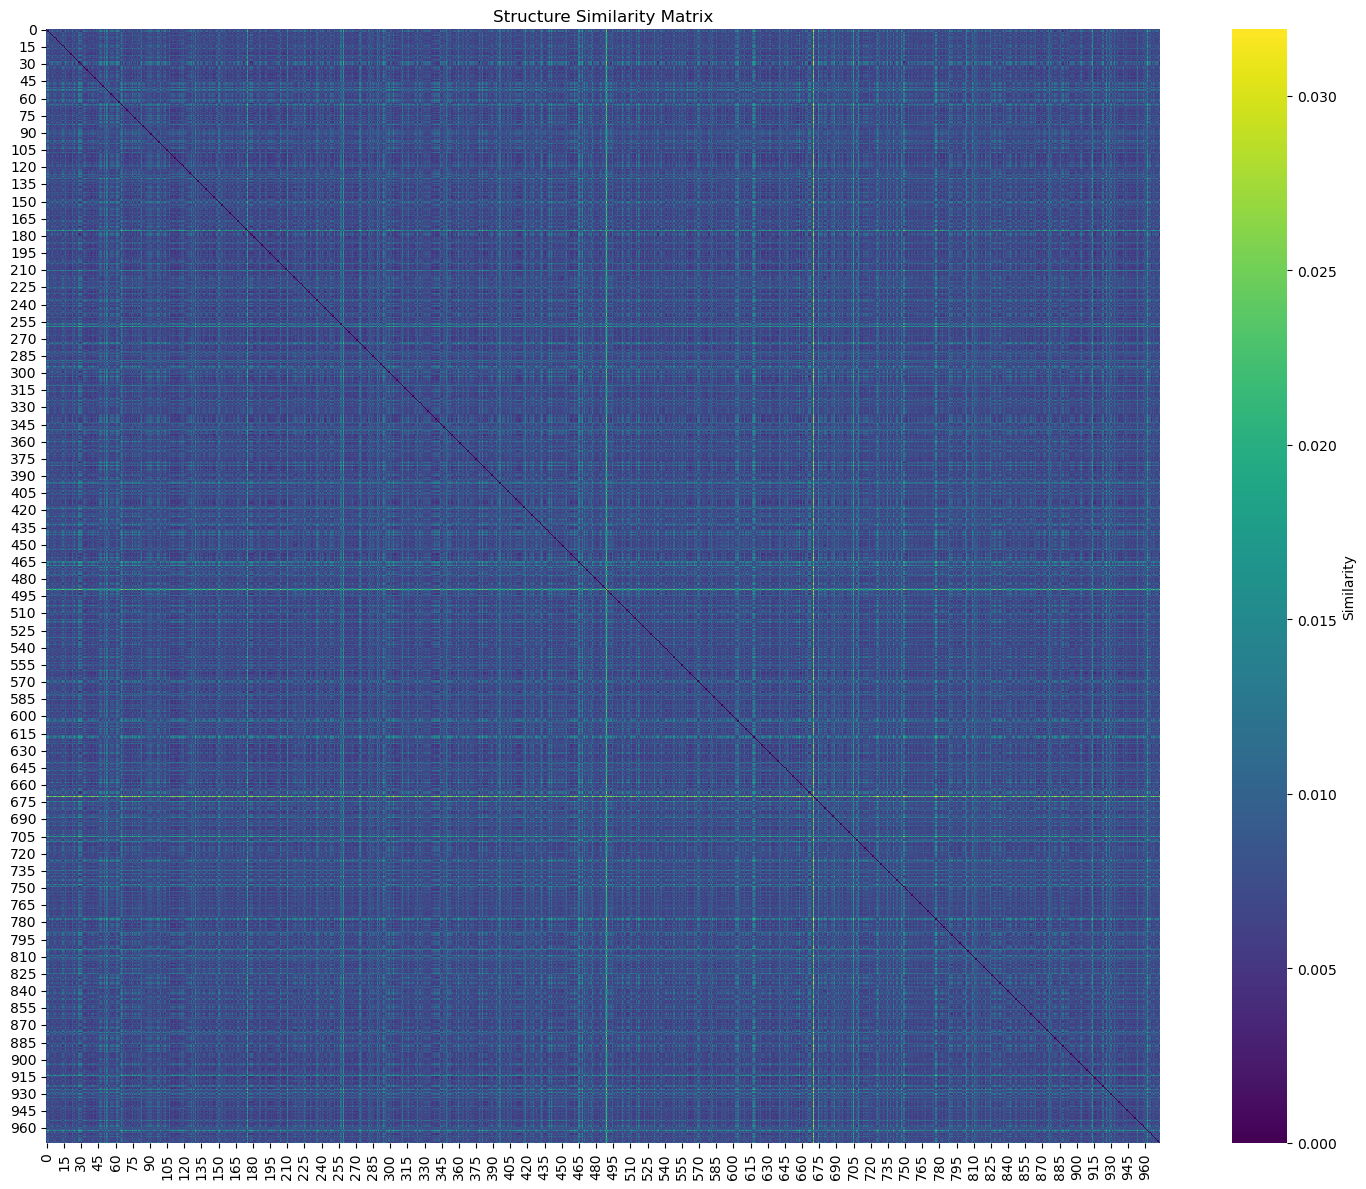

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(file_path, figsize=(15, 12), cmap='viridis', title='Structure Similarity Matrix'):
    """
    Plot a similarity matrix from a .npy file.
    
    Parameters:
    -----------
    file_path : str
        Path to the .npy file containing the similarity matrix
    figsize : tuple, optional
        Size of the figure (width, height)
    cmap : str, optional
        Colormap for the heatmap
    title : str, optional
        Title of the plot
    """
    # Load the similarity matrix
    similarity_matrix = np.load(file_path)
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(similarity_matrix, 
                cmap=cmap, 
                square=True,  # Ensures square cells
                cbar_kws={'label': 'Similarity'})
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage
plot_similarity_matrix('similarity_matrix973.npy')

# Additional visualization options
def plot_clustered_similarity_matrix(file_path, figsize=(15, 12), cmap='viridis', title='Clustered Structure Similarity Matrix'):
    """
    Plot a clustered similarity matrix from a .npy file.
    
    Parameters are the same as plot_similarity_matrix
    """
    # Load the similarity matrix
    similarity_matrix = np.load(file_path)
    
    # Create clustered heatmap
    plt.figure(figsize=figsize)
    
    # Create clustered heatmap
    sns.clustermap(similarity_matrix, 
                   cmap=cmap, 
                   square=True,
                   cbar_kws={'label': 'Similarity'})
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage
# plot_clustered_similarity_matrix('similarity_matrix.npy')

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import networkx as nx

def diversity_clustering(similarity_matrix_path: str, n: int = 50):
    """
    Uses K-means clustering with MDS to find n diverse structures.
    
    Parameters:
    -----------
    similarity_matrix_path : str
        Path to the .npy file containing the similarity matrix
    n : int, default=50
        Number of diverse structures to find
        
    Returns:
    --------
    List of indices representing diverse structures
    """
    # Load the similarity matrix
    distance_matrix = np.load(similarity_matrix_path)
    n_structures = distance_matrix.shape[0]
    
    # Apply MDS to convert distances to Euclidean coordinates
    # This is crucial for mathematically sound clustering
    mds = MDS(n_components=min(3, n_structures-1), 
              dissimilarity='precomputed', 
              random_state=42,
              normalized_stress='auto')
    points = mds.fit_transform(distance_matrix)
    
    # Apply K-means to the MDS coordinates
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(points)
    
    # Get the structure closest to each cluster center
    selected = []
    for i in range(n):
        cluster_points = np.where(kmeans.labels_ == i)[0]
        
        if len(cluster_points) == 0:
            continue
            
        # Find point closest to the cluster center
        distances_to_center = np.linalg.norm(
            points[cluster_points] - kmeans.cluster_centers_[i], axis=1
        )
        closest_point_idx = cluster_points[np.argmin(distances_to_center)]
        selected.append(closest_point_idx)
    
    return selected


def max_min_diversity(similarity_matrix_path: str, n: int = 50):
    """
    Select diverse structures using a greedy max-min approach.
    
    Parameters:
    -----------
    similarity_matrix_path : str
        Path to the .npy file containing the similarity matrix
    n : int, default=50
        Number of diverse structures to find
        
    Returns:
    --------
    List of indices representing diverse structures
    """
    # Load the similarity matrix
    distance_matrix = np.load(similarity_matrix_path)
    n_structures = distance_matrix.shape[0]
    
    # Start with the structure that has highest average distance to all others
    avg_distances = np.mean(distance_matrix, axis=1)
    selected = [np.argmax(avg_distances)]
    
    # Greedily add structures that are maximally distant from already selected ones
    while len(selected) < n:
        # For each candidate structure, find minimum distance to any selected structure
        candidates = list(set(range(n_structures)) - set(selected))
        
        # For each candidate, find its minimum distance to any selected structure
        min_distances = []
        for candidate in candidates:
            dist_to_selected = [distance_matrix[candidate, s] for s in selected]
            min_distances.append(min(dist_to_selected))
        
        # Choose the structure with the maximum minimum distance
        max_idx = np.argmax(min_distances)
        selected.append(candidates[max_idx])
    
    return selected


def parallel_faster_pam(similarity_matrix_path: str, n: int = 50):
    """
    Implements ParallelFasterPAM from the project codebase for finding diverse structures.
    
    Parameters:
    -----------
    similarity_matrix_path : str
        Path to the .npy file containing the similarity matrix
    n : int, default=50
        Number of diverse structures to find
        
    Returns:
    --------
    List of indices representing diverse structures (medoids)
    """
    # Load the similarity matrix
    distance_matrix = np.load(similarity_matrix_path)
    n_structures = distance_matrix.shape[0]
    
    # Create a dictionary mapping indices to dummy "structures"
    # This is needed to fit the ParallelFasterPAM interface
    structure_dict = {i: i for i in range(n_structures)}
    
    # Define a distance function that uses the precomputed matrix
    def distance_function(i, j, **kwargs):
        return distance_matrix[i, j]
    
    # Create the ParallelFasterPAM instance
    class ParallelFasterPAM:
        """Simplified implementation of ParallelFasterPAM for medoid selection"""
        
        def __init__(self, n_clusters=50):
            self.n_clusters = n_clusters
            self.distance_cache = {}
            self.medoids = None
            self.labels = None
            
        def _get_distance(self, i, j, **kwargs):
            """Get distance between objects i and j with caching"""
            if i == j:
                return 0.0
            
            # Ensure consistent order for caching
            if i > j:
                i, j = j, i
                
            # Check cache or compute distance
            if (i, j) not in self.distance_cache:
                self.distance_cache[(i, j)] = distance_function(i, j)
                
            return self.distance_cache[(i, j)]
            
        def _build_initialization(self):
            """Initialize medoids using BUILD algorithm"""
            # Start with a random first medoid
            medoids = [np.random.randint(0, n_structures)]
            
            # Add remaining medoids one by one
            while len(medoids) < self.n_clusters:
                best_decrease = float('-inf')
                best_idx = -1
                
                # Find the point that minimizes the sum of distances
                for i in range(n_structures):
                    if i in medoids:
                        continue
                        
                    # Calculate decrease in objective if we add this point as a medoid
                    decrease = 0
                    for j in range(n_structures):
                        if j in medoids or j == i:
                            continue
                            
                        # Current closest medoid distance
                        min_dist_current = min(self._get_distance(j, m) for m in medoids)
                        
                        # Distance to candidate new medoid
                        dist_to_candidate = self._get_distance(j, i)
                        
                        # Calculate potential decrease in objective
                        decrease += max(0, min_dist_current - dist_to_candidate)
                        
                    if decrease > best_decrease:
                        best_decrease = decrease
                        best_idx = i
                        
                # Add best candidate to medoids
                medoids.append(best_idx)
                
            return medoids
            
        def _assign_points(self):
            """Assign each point to nearest medoid"""
            labels = np.full(n_structures, -1, dtype=int)
            distances = np.zeros(n_structures, dtype=float)
            
            for i in range(n_structures):
                min_dist = float('inf')
                min_idx = -1
                
                for idx, m in enumerate(self.medoids):
                    dist = self._get_distance(i, m)
                    if dist < min_dist:
                        min_dist = dist
                        min_idx = idx
                        
                labels[i] = min_idx
                distances[i] = min_dist
                
            return labels, distances
            
        def fit(self):
            """Fit the clustering model"""
            # Initialize medoids
            self.medoids = self._build_initialization()
            
            # Make final assignment
            self.labels, _ = self._assign_points()
            
            return self
            
    # Instantiate and fit the model
    pam = ParallelFasterPAM(n_clusters=n)
    pam.fit()
    
    # Return the selected medoids
    return pam.medoids

In [ ]:
sim_matrix_path = 'similarity_matrix973.npy'
# selected_indices_dc = diversity_clustering(sim_matrix_path, n=2)
selected_indices_mm = max_min_diversity(sim_matrix_path, n=100)
# selected_indices_pf = parallel_faster_pam(sim_matrix_path, n=2)
# print("Selected indices for diverse structures:", selected_indices_dc)
print("Pre-transformation Selected indices for max-min diversity:", selected_indices_mm)
# print("Selected indices for ParallelFasterPAM:", selected_indices_pf)
max(selected_indices_mm)

Pre-transformation Selected indices for max-min diversity: [670, 926, 316, 705, 236, 364, 175, 396, 409, 783, 488, 275, 531, 555, 210, 423, 904, 961, 886, 154, 647, 777, 962, 489, 400, 393, 511, 761, 494, 52, 660, 618, 959, 61, 743, 604, 65, 257, 119, 622, 465, 678, 936, 473, 556, 160, 914, 503, 259, 804]


962

In [44]:
def extract_numbers_from_structure_ids(manager, index_list):
    # Get all structure IDs
    all_structure_ids = manager.get_structure_ids()
    sorted_ids = sorted(all_structure_ids)
    
    results = []
    
    for i in index_list:
        if i <= 0 or i > len(sorted_ids):
            print(f"Warning: Index {i} is out of range")
            continue
            
        # Get the structure ID at position i-1 (since we're using 1-indexed values in display)
        sid = sorted_ids[i-1]
        
        # Extract the number after "24_" and before "_iteration"
        try:
            # Split by underscore and get the component after "24"
            parts = sid.split('_')
            if len(parts) >= 3 and parts[0] == "SiO2" and parts[1] == "24":
                number = int(parts[2])
                results.append((i, sid, number))
            else:
                print(f"Warning: Unexpected format for {sid}")
                results.append((i, sid, None))
        except Exception as e:
            print(f"Error processing {sid}: {e}")
            results.append((i, sid, None))
    
    return results

# Example usage
selected_indices_mm = max_min_diversity(sim_matrix_path, n=200)
extracted_data = extract_numbers_from_structure_ids(manager, selected_indices_mm)
low_list = [tup[2] for tup in extracted_data]
print(low_list)
# # Print results
# print("Index | Structure ID | Extracted Number")
# print("-" * 45)
# for idx, sid, number in extracted_data:
#     print(f"{idx:5d} | {sid:20s} | {number if number is not None else 'N/A'}")

# # If you just want the array of numbers
# extracted_numbers = [number for _, _, number in extracted_data if number is not None]
# print("\nExtracted numbers:", extracted_numbers)

[718, 957, 391, 74, 316, 436, 260, 466, 479, 823, 550, 352, 590, 611, 293, 491, 937, 98, 919, 240, 698, 818, 990, 551, 46, 463, 571, 802, 556, 149, 709, 670, 988, 157, 786, 657, 160, 336, 209, 674, 52, 725, 967, 537, 612, 246, 946, 564, 338, 843, 748, 435, 518, 264, 963, 271, 886, 596, 182, 183, 139, 508, 329, 298, 862, 577, 829, 44, 775, 49, 66, 853, 492, 906, 434, 18, 366, 277, 721, 683, 420, 890, 655, 402, 239, 504, 372, 422, 676, 519, 224, 455, 825, 659, 73, 545, 387, 184, 194, 181, 866, 644, 84, 806, 371, 176, 119, 868, 158, 499, 753, 359, 779, 5, 850, 241, 835, 989, 147, 762, 272, 541, 237, 992, 378, 208, 700, 749, 764, 154, 144, 532, 860, 746, 799, 425, 554, 486, 954, 282, 647, 472, 487, 816, 900, 531, 448, 976, 536, 362, 426, 733, 707, 981, 213, 713, 368, 370, 847, 879, 878, 215, 828, 143, 858, 716, 190, 80, 769, 101, 177, 872, 47, 242, 759, 474, 691, 589, 737, 212, 439, 307, 563, 222, 991, 465, 309, 327, 305, 999, 851, 315, 780, 399, 760, 127, 507, 917, 489, 844]


In [1]:
# Import the module
import similarity_visualizer as SimilarityVisualizer

# Load the similarity matrix
matrix_file = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/retry/similarity_matrix973.npy"
sim_matrix = SimilarityVisualizer.load_similarity_matrix(matrix_file)

# Set output directory for visualizations
output_dir = "./visualization_results"
import os
os.makedirs(output_dir, exist_ok=True)

# Plot similarity distribution and get statistics
stats = SimilarityVisualizer.plot_similarity_distribution(sim_matrix, output_dir)
print("Similarity statistics:", stats)

# Generate a heatmap (downsamples automatically if matrix is large)
SimilarityVisualizer.plot_similarity_heatmap(sim_matrix, output_dir, max_size=100)

# Create t-SNE visualization 
SimilarityVisualizer.plot_reduced_dimensions(sim_matrix, output_dir, method='tsne', perplexity=30)

# Create MDS visualization
SimilarityVisualizer.plot_reduced_dimensions(sim_matrix, output_dir, method='mds')

# Find the most similar structure pairs
most_similar = SimilarityVisualizer.find_most_similar_pairs(sim_matrix, top_n=20)
for i, (idx1, idx2, sim) in enumerate(most_similar):
    print(f"{i+1}. Structures {idx1} and {idx2}: Similarity = {sim:.6f}")

Loading similarity matrix from /Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/retry/similarity_matrix973.npy...
Loaded matrix with shape: (973, 973)
Saved similarity distribution to ./visualization_results/similarity_distribution.png
Similarity statistics: {'min': 0.0022016033478707378, 'max': 0.031910263290543424, 'mean': 0.008053205390077055, 'median': 0.007494667300507718, 'std': 0.002450833788589281}
Matrix too large, sampled 100x100 subset for heatmap
Saved similarity heatmap to ./visualization_results/similarity_heatmap.png
Applying TSNE dimensionality reduction...
Saved TSNE visualization to ./visualization_results/tsne_visualization.png
Applying MDS dimensionality reduction...


/Users/raphaelzstone/anaconda3/envs/moleng/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Saved MDS visualization to ./visualization_results/mds_visualization.png
1. Structures 28 and 378: Similarity = 0.002202
2. Structures 172 and 534: Similarity = 0.002316
3. Structures 172 and 893: Similarity = 0.002320
4. Structures 172 and 178: Similarity = 0.002374
5. Structures 179 and 661: Similarity = 0.002420
6. Structures 534 and 661: Similarity = 0.002439
7. Structures 378 and 749: Similarity = 0.002459
8. Structures 172 and 661: Similarity = 0.002501
9. Structures 661 and 893: Similarity = 0.002514
10. Structures 133 and 436: Similarity = 0.002542
11. Structures 172 and 578: Similarity = 0.002556
12. Structures 178 and 661: Similarity = 0.002561
13. Structures 461 and 740: Similarity = 0.002574
14. Structures 578 and 893: Similarity = 0.002577
15. Structures 178 and 534: Similarity = 0.002584
16. Structures 351 and 661: Similarity = 0.002593
17. Structures 28 and 749: Similarity = 0.002626
18. Structures 28 and 178: Similarity = 0.002631
19. Structures 133 and 661: Similarity 

Extracted energies from 973 files


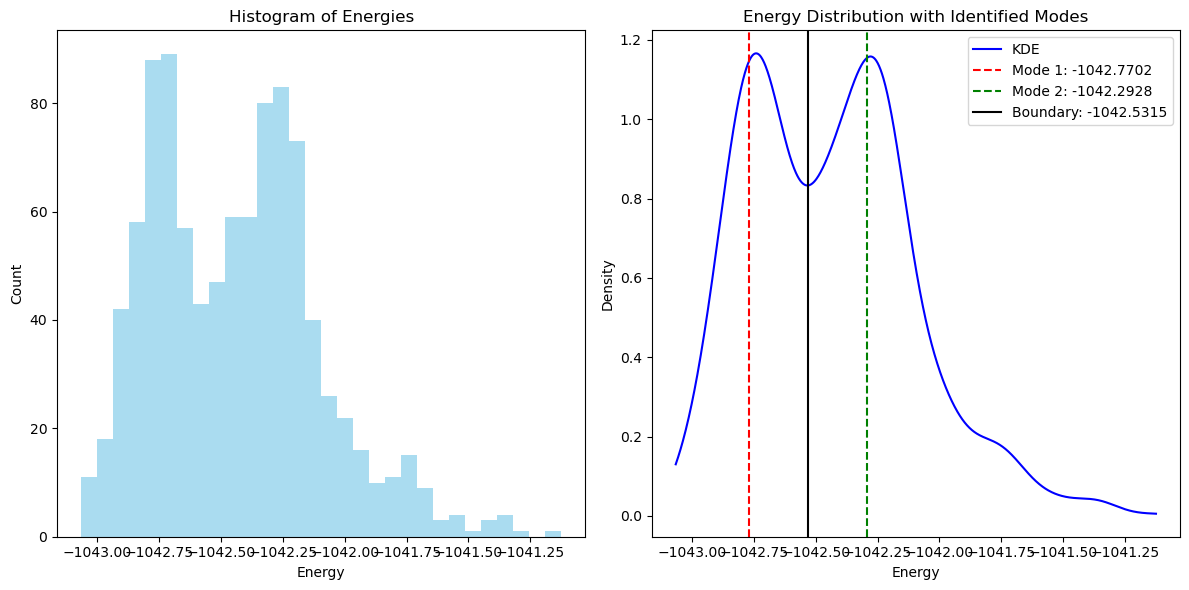

Low energy structures: 415
High energy structures: 558

Low Energy Group:
Total structures: 415
Energy range: -1043.0659 to -1042.5353

High Energy Group:
Total structures: 558
Energy range: -1042.5301 to -1041.1249


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture
from pymatgen.core.structure import Structure

def extract_energies_from_poscar(directory_path):
    """Extract energies from the first line of each POSCAR file"""
    energies = {}
    
    for filename in os.listdir(directory_path):
        if filename.lower().startswith('poscar') or filename.lower().endswith('.vasp'):
            full_path = os.path.join(directory_path, filename)
            
            try:
                # Read only the first line to get the energy
                with open(full_path, 'r') as f:
                    first_line = f.readline().strip()
                
                # Try to extract an energy value from the comment line
                # Looking for patterns like "energy = -123.45" or just "-123.45"
                energy = None
                if "energy" in first_line.lower():
                    parts = first_line.split("=")
                    if len(parts) > 1:
                        try:
                            energy = float(parts[1].strip().split()[0])
                        except:
                            pass
                else:
                    # Try to find any float in the line
                    import re
                    matches = re.findall(r'-?\d+\.\d+', first_line)
                    if matches:
                        try:
                            energy = float(matches[0])
                        except:
                            pass
                
                if energy is not None:
                    energies[filename] = energy
            
            except Exception as e:
                print(f"Error reading energy from {filename}: {e}")
    
    print(f"Extracted energies from {len(energies)} files")
    return energies

def plot_energy_distribution(energies):
    """Plot the distribution of energies and identify the two modes"""
    energy_values = list(energies.values())
    
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    hist, bins, _ = plt.hist(energy_values, bins=30, alpha=0.7, color='skyblue')
    plt.xlabel('Energy')
    plt.ylabel('Count')
    plt.title('Histogram of Energies')
    
    # Density plot
    plt.subplot(1, 2, 2)
    
    # Calculate kernel density estimate
    density = gaussian_kde(energy_values)
    x = np.linspace(min(energy_values), max(energy_values), 1000)
    plt.plot(x, density(x), 'b-', label='KDE')
    
    # Fit a Gaussian Mixture Model to find the two modes
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(np.array(energy_values).reshape(-1, 1))
    
    # Get the means of the two components
    means = gmm.means_.flatten()
    mode1, mode2 = min(means), max(means)
    
    # Find the boundary between the two modes
    boundary = (mode1 + mode2) / 2
    
    # Plot the modes and boundary
    plt.axvline(mode1, color='r', linestyle='--', label=f'Mode 1: {mode1:.4f}')
    plt.axvline(mode2, color='g', linestyle='--', label=f'Mode 2: {mode2:.4f}')
    plt.axvline(boundary, color='k', linestyle='-', label=f'Boundary: {boundary:.4f}')
    
    plt.xlabel('Energy')
    plt.ylabel('Density')
    plt.title('Energy Distribution with Identified Modes')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return mode1, mode2, boundary

def classify_structures_by_energy(energies, boundary):
    """Classify structures into low and high energy groups based on the boundary"""
    low_energy = {}
    high_energy = {}
    
    for filename, energy in energies.items():
        if energy < boundary:
            low_energy[filename] = energy
        else:
            high_energy[filename] = energy
    
    print(f"Low energy structures: {len(low_energy)}")
    print(f"High energy structures: {len(high_energy)}")
    
    return low_energy, high_energy

def load_structures_by_energy_group(directory_path, energy_group):
    """Load structures that belong to a specific energy group"""
    structures = {}
    
    for filename in energy_group.keys():
        full_path = os.path.join(directory_path, filename)
        
        try:
            structure = Structure.from_file(full_path)
            structures[filename] = structure
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    
    return structures

# Example usage:
directory_path = '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/'

# Extract energies from POSCAR files
energies = extract_energies_from_poscar(directory_path)

# Plot energy distribution and get modes and boundary
mode1, mode2, boundary = plot_energy_distribution(energies)

# Classify structures into low and high energy groups
low_energy, high_energy = classify_structures_by_energy(energies, boundary)

# Load structures from each energy group
low_energy_structures = load_structures_by_energy_group(directory_path, low_energy)
high_energy_structures = load_structures_by_energy_group(directory_path, high_energy)

# Create StructureManager instances for each group
low_energy_manager = StructureManager()
low_energy_manager.add_structures_from_list([
    {'unique_id': filename, 'structure': structure} 
    for filename, structure in low_energy_structures.items()
])

high_energy_manager = StructureManager()
high_energy_manager.add_structures_from_list([
    {'unique_id': filename, 'structure': structure} 
    for filename, structure in high_energy_structures.items()
])

# Print summary
print("\nLow Energy Group:")
print(f"Total structures: {len(low_energy_manager.get_structure_ids())}")
print(f"Energy range: {min(low_energy.values()):.4f} to {max(low_energy.values()):.4f}")

print("\nHigh Energy Group:")
print(f"Total structures: {len(high_energy_manager.get_structure_ids())}")
print(f"Energy range: {min(high_energy.values()):.4f} to {max(high_energy.values()):.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# First, extract energies and separate into high/low energy groups
# (Use the code from my previous response to get low_energy_manager and high_energy_manager)

# Function to calculate and visualize similarities for a structure group
def analyze_structure_group(group_manager, group_name):
    # Get all IDs from this group
    group_ids = group_manager.get_structure_ids()
    group_size = len(group_ids)
    
    print(f"\nAnalyzing {group_name} group with {group_size} structures...")
    
    # Calculate similarities for this group
    analyzer = SimilarityAnalyzer(
        structure_manager=group_manager, 
        calculator_type='LIBFP'
    )
    similarities = analyzer.calculate_all_similarities(parallel=False)
    
    # Create a square similarity matrix
    similarity_matrix = np.zeros((group_size, group_size))
    structure_id_to_index = {id: idx for idx, id in enumerate(group_ids)}
    
    for (id1, id2), similarity in similarities.items():
        i = structure_id_to_index[id1]
        j = structure_id_to_index[id2]
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity
    
    # Save the matrix for further analysis
    np.save(f'{group_name}_similarity_matrix.npy', similarity_matrix)
    
    # Create a heatmap visualization (optional)
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap='viridis')
    plt.title(f'Structure Similarity Matrix - {group_name} Energy Group')
    plt.savefig(f'{group_name}_similarity_heatmap.png', dpi=300)
    plt.close()
    
    return similarity_matrix

# Run analysis for both groups
low_energy_matrix = analyze_structure_group(low_energy_manager, 'low_energy')
high_energy_matrix = analyze_structure_group(high_energy_manager, 'high_energy')

# Optional: Basic statistical comparison
print("\nStatistical comparison of similarity matrices:")
print(f"Low energy group - Mean similarity: {np.mean(low_energy_matrix):.4f}, "
      f"Std: {np.std(low_energy_matrix):.4f}, "
      f"Min: {np.min(low_energy_matrix):.4f}, "
      f"Max: {np.max(low_energy_matrix):.4f}")

print(f"High energy group - Mean similarity: {np.mean(high_energy_matrix):.4f}, "
      f"Std: {np.std(high_energy_matrix):.4f}, "
      f"Min: {np.min(high_energy_matrix):.4f}, "
      f"Max: {np.max(high_energy_matrix):.4f}")

In [2]:
# Define paths and create output directory
output_dir = 'similarity_visuals_combined'
os.makedirs(output_dir, exist_ok=True)

# Load similarity matrices
low_sim_file = 'low_energy_similarity_matrix.npy'  # Adjust path as needed
high_sim_file = 'high_energy_similarity_matrix.npy'  # Adjust path as needed

low_sim_matrix = SimilarityVisualizer.load_similarity_matrix(low_sim_file)
high_sim_matrix = SimilarityVisualizer.load_similarity_matrix(high_sim_file)

# Plot combined similarity distribution
SimilarityVisualizer.plot_combined_similarity_distribution(low_sim_matrix, high_sim_matrix, output_dir)

# Plot combined dimensionality reduction visualizations
# t-SNE
SimilarityVisualizer.plot_combined_reduced_dimensions(
    low_sim_matrix, high_sim_matrix, output_dir, 
    method='tsne', perplexity=30, random_state=42
)

# MDS
SimilarityVisualizer.plot_combined_reduced_dimensions(
    low_sim_matrix, high_sim_matrix, output_dir, 
    method='mds', random_state=42
)

print("All visualizations complete!")

Loading similarity matrix from low_energy_similarity_matrix.npy...
Loaded matrix with shape: (415, 415)
Loading similarity matrix from high_energy_similarity_matrix.npy...
Loaded matrix with shape: (558, 558)
Saved combined similarity distribution to similarity_visuals_combined/combined_similarity_distribution.png
Applying TSNE dimensionality reduction for both matrices...
Saved independently transformed TSNE visualization to similarity_visuals_combined/combined_tsne_independent.png
Matrices have different dimensions: low=415, high=558
Using joint transformation on combined data...
Saved jointly transformed TSNE visualization to similarity_visuals_combined/combined_tsne_joint.png
Applying MDS dimensionality reduction for both matrices...


/Users/raphaelzstone/anaconda3/envs/moleng/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/raphaelzstone/anaconda3/envs/moleng/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Saved independently transformed MDS visualization to similarity_visuals_combined/combined_mds_independent.png
Matrices have different dimensions: low=415, high=558
Using joint transformation on combined data...


/Users/raphaelzstone/anaconda3/envs/moleng/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ValueError: array must be 2-dimensional and square. shape = (830, 415)